# Laboratory Session 6
Alessandro Fella 2024285

## Exercise 1

In [1]:
n_tot<-12
n.sample <- 10000
delta.p <- 10/n.sample
p <- seq(0, 10, length.out=n.sample+1) 

dt<-seq(0,10,0.001)

# priors
prior_1<-dunif(p, min=0, max=1)
prior_2<-1/sqrt(p)
# posteriors
alpha_p_1<-n_tot+1
alpha_p_2<-n_tot+0.5
n<-5
post_1<-dgamma(dt, shape=alpha_p_1, rate=n) 
post_2<-dgamma(dt , shape=alpha_p_2, rate=n) 

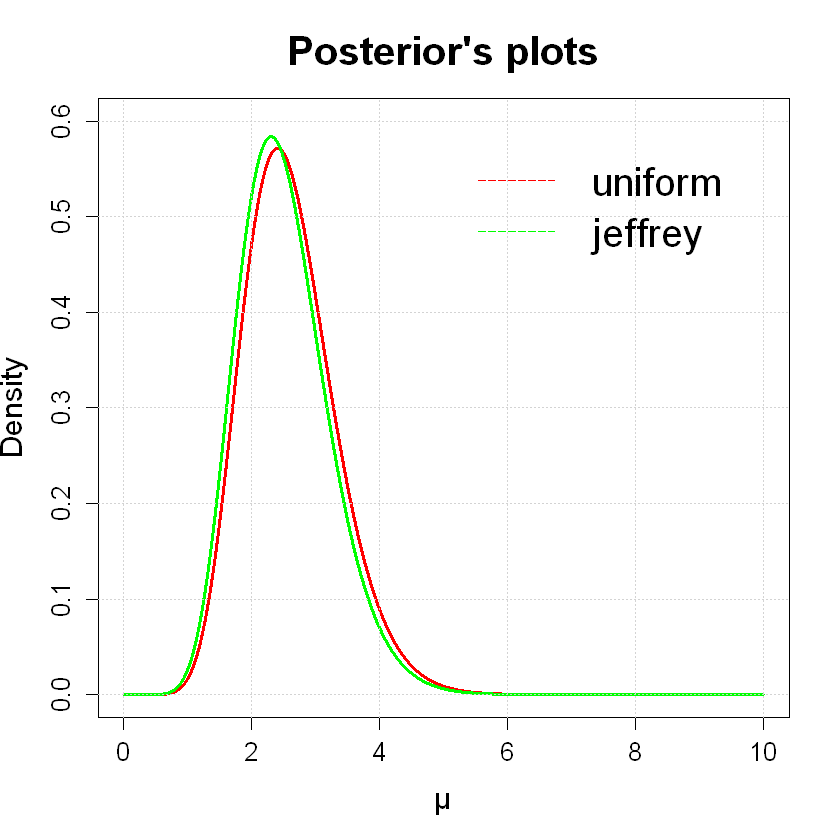

In [2]:
plot(dt, post_1, col='red', type='l',
     main = "Posterior's plots", lty=1, lwd = 3, xlab="\u03bc",ylim=c(0,0.6), 
     ylab='Density',cex.main=2,cex.axis=1.3,cex.lab=1.5)
lines(dt, post_2, col='green', type='l',
     lty=1, lwd = 3, xlab="p", ylim=c(0,0.6),
     ylab='Density')

legend("topright", inset=0.05,legend=c("uniform","jeffrey"),
       col=c("red", "green"), lty=5:5, cex=2,
       box.lty=0)
grid()


In [3]:
mean_1_n <- delta.p*sum(p*post_1)
var_1_n <-  delta.p*sum((p**2)*post_1) - mean_1_n**2
median_1_n <- function(p,delta.p){
                area <- 0
                median <- 0
                for(i in (1:length(p))){
                    area <- area + delta.p*sum(post_1[i])
                    if(area>=1/2){
                        median <- p[i]
                        return(median)
                        }
                    }  
                }

median_1_n <- round(median_1_n(p,delta.p), digits=1)


cat("Uniform's case (analytical):","\n")
mean_1<-alpha_p_1/n
variance_1<- alpha_p_1/n**2
cat("Mean=", mean_1,"Variance=",variance_1,"\n")
cat("Uniform's case (numerical):","\n")
cat("Mean=", mean_1_n,"Median=",median_1_n,"Variance=",var_1_n,"\n")


Uniform's case (analytical): 
Mean= 2.6 Variance= 0.52 
Uniform's case (numerical): 
Mean= 2.6 Median= 2.5 Variance= 0.52 


In [4]:
mean_2_n <- delta.p*sum(p*post_2)
var_2_n  <-  delta.p*sum((p**2)*post_2) - mean_2_n**2
median_2_n <- function(p,delta.p){
                area <- 0
                median <- 0
                for(i in (1:length(p))){
                    area <- area + delta.p*sum(post_2[i])
                    if(area>=1/2){
                        median <- p[i]
                        return(median)
                        }
                    }  
                }

median_2_n<- round(median_2_n(p,delta.p), digits=1)


cat("Jeffrey case (analytical):","\n")
mean_2<-alpha_p_2/n
variance_2<-alpha_p_2/n**2
cat("Mean=", mean_2,"Variance=",variance_2,"\n")
cat("Jeffrey case (numerical):","\n")
cat("Mean=", mean_2_n,"Median=", median_2_n,"Variance=",var_2_n,"\n")


Jeffrey case (analytical): 
Mean= 2.5 Variance= 0.5 
Jeffrey case (numerical): 
Mean= 2.5 Median= 2.4 Variance= 0.5 


Credibility interval for uniform Prior: x1= 1.387639 x2= 4.20092 
Credibility interval for jeffrey Prior: x1= 1.315632 x2= 4.072907 


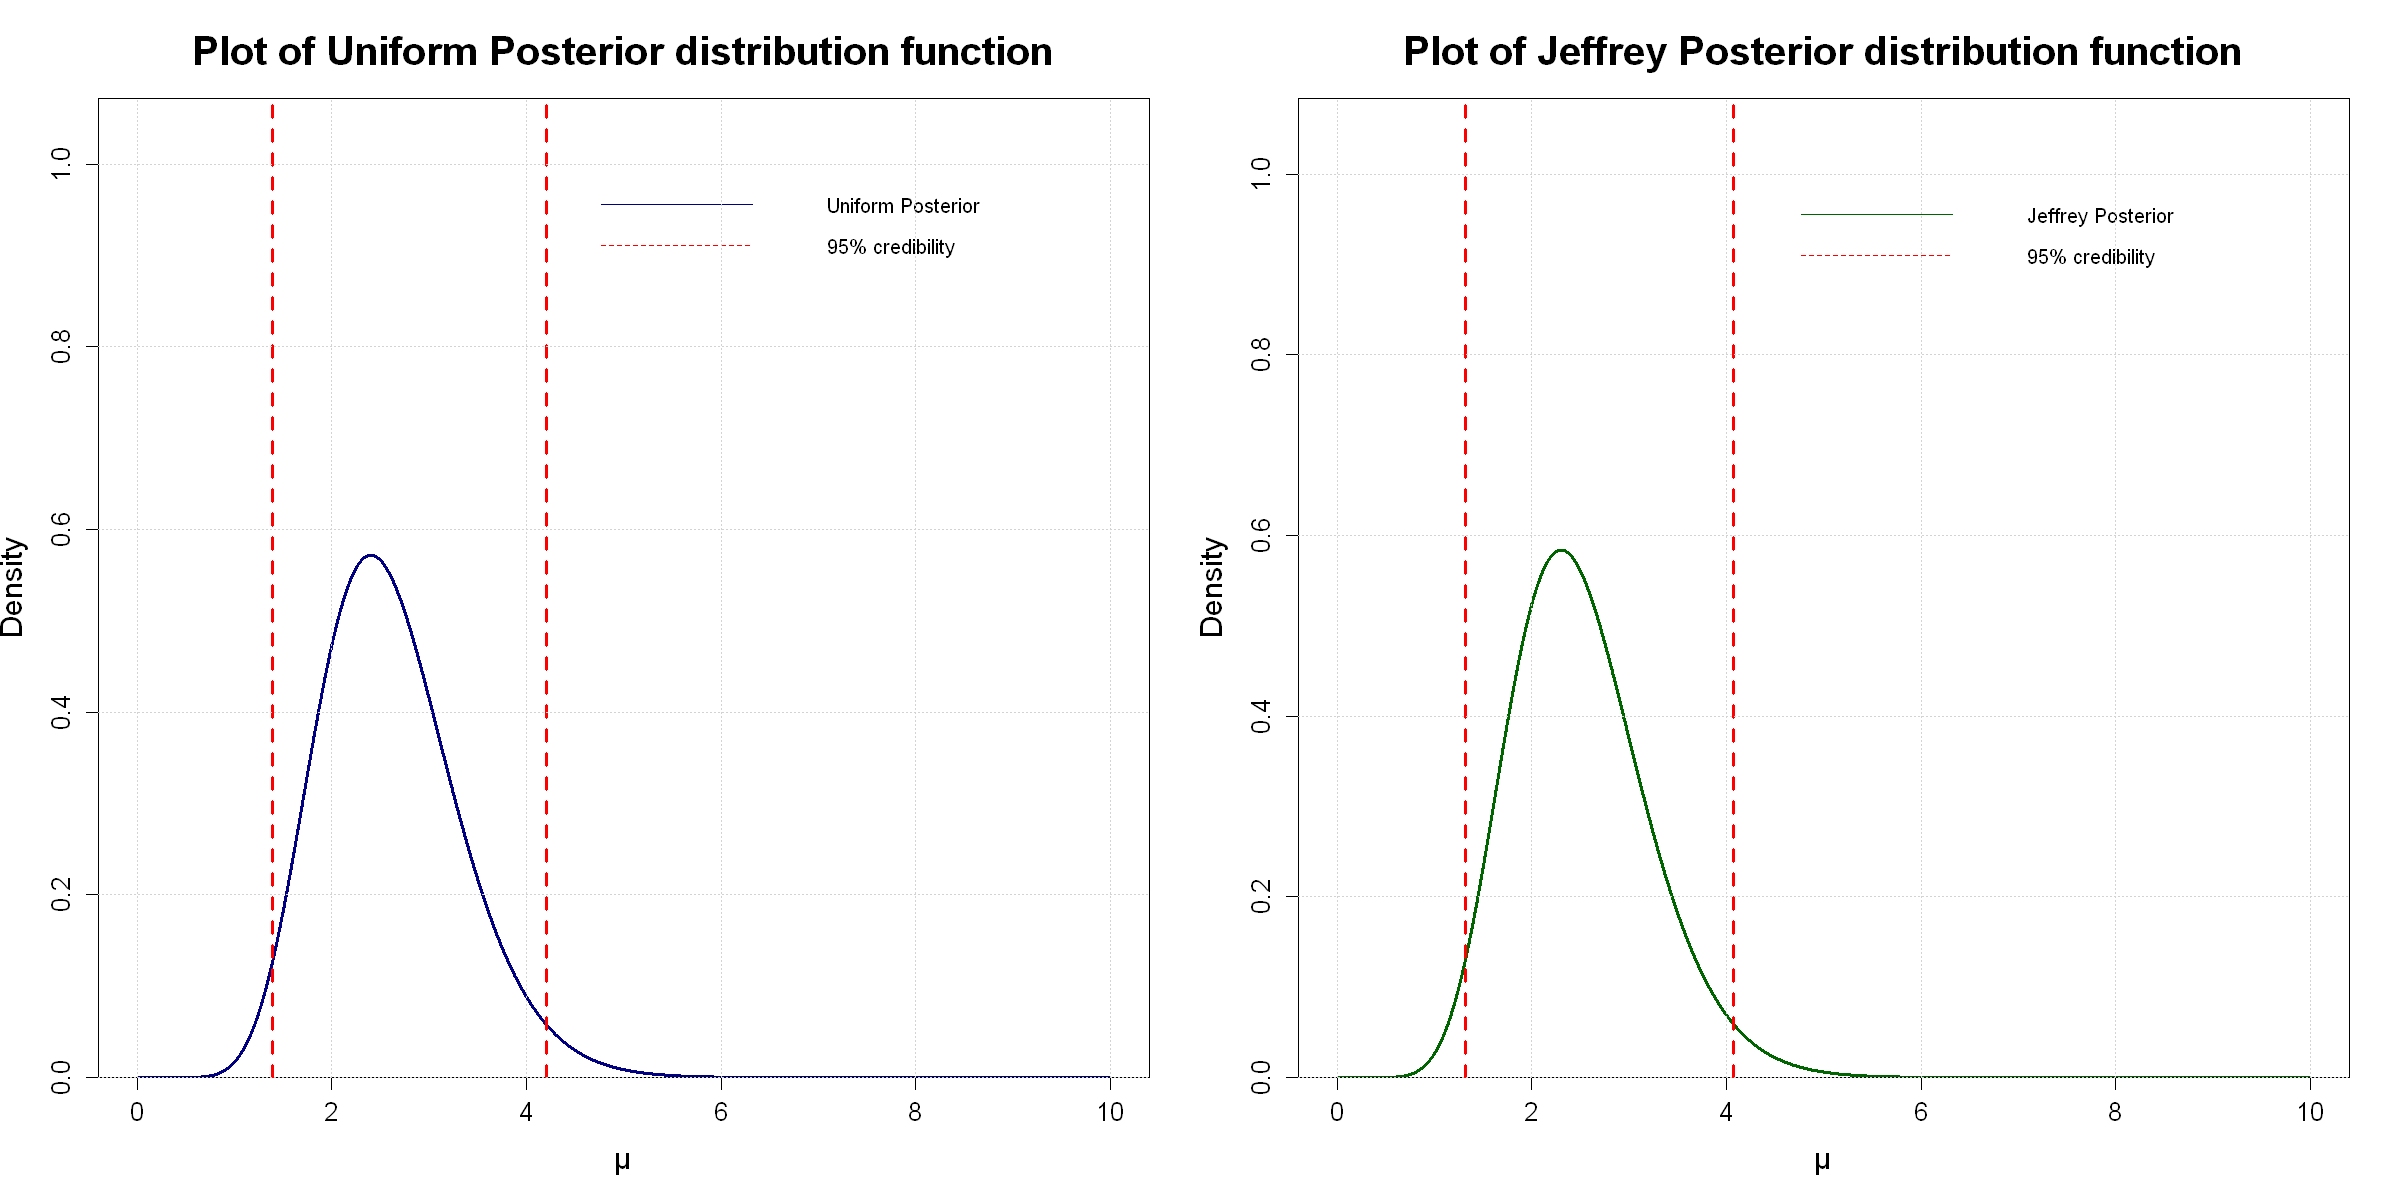

In [5]:
# CONFIDENCE LEVEL:
n.sample <- 10000
delta.p <- 10/n.sample
p <- seq(0, 10, length.out=n.sample) 


conflvl = 0.95
area_1 <- round(delta.p*cumsum(post_1), digits=3)
area_2 <- round(delta.p*cumsum(post_2), digits=3)


conflvl_func <- function(p,values,conflvl) {
            x1<-0
            x2<-0
            for(i in 1:(length(values)-1)){
                conflvl_sx <- ((1-conflvl)/2 )          
                conflvl_dx <- (conflvl+(1-conflvl)/2)    
                if ( (values[i+1]>= conflvl_sx) & (values[i] <= conflvl_sx)) {
                    x1<-(p[i]+p[i+1])/2
                }
                if ( (values[i+1]>= conflvl_dx) & (values[i] <= conflvl_dx)) {
                    x2<-(p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

conf_1 <- conflvl_func(p,area_1,conflvl)
conf_2 <- conflvl_func(p,area_2,conflvl)

cat("Credibility interval for uniform Prior: x1=", conf_1[1],"x2=", conf_1[2],'\n')
cat("Credibility interval for jeffrey Prior: x1=", conf_2[1],"x2=", conf_2[2],'\n')


# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Uniform Posterior
plot(dt, post_1, xaxs='r', yaxs='i', col='navy',xlab="\u03bc" ,type='l', ylim=c(0,max(post_1)+0.5),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, 
     ylab='Density',cex.axis=1.3,cex.lab=1.5,cex.main=2)
legend(4,1, inset=0.05,legend=c("Uniform Posterior","95% credibility "), col=c("navy","red"), lty=1:2, cex=1,box.lty=0, bty = "n")
abline(v=conf_1[1], lty=2,col='red',lwd = 3)
abline(v=conf_1[2], lty=2,col='red',lwd = 3)

grid()


# Jeffrey's Posterior
plot(dt, post_2, xaxs='r', yaxs='i', col='darkgreen',xlab="\u03bc", type='l', ylim=c(0,max(post_2)+0.5),
     main = "Plot of Jeffrey Posterior distribution function", lty=1, lwd = 3, 
     ylab='Density',cex.axis=1.3,cex.lab=1.5,cex.main=2)
legend(4,1, inset=0.05,legend=c("Jeffrey Posterior","95% credibility"), col=c("darkgreen","red"), lty=1:2, cex=1,box.lty=0,bty = "n")

abline(v=conf_2[1], lty=2,col='red',lwd = 3)
abline(v=conf_2[2], lty=2,col='red',lwd = 3)
grid()

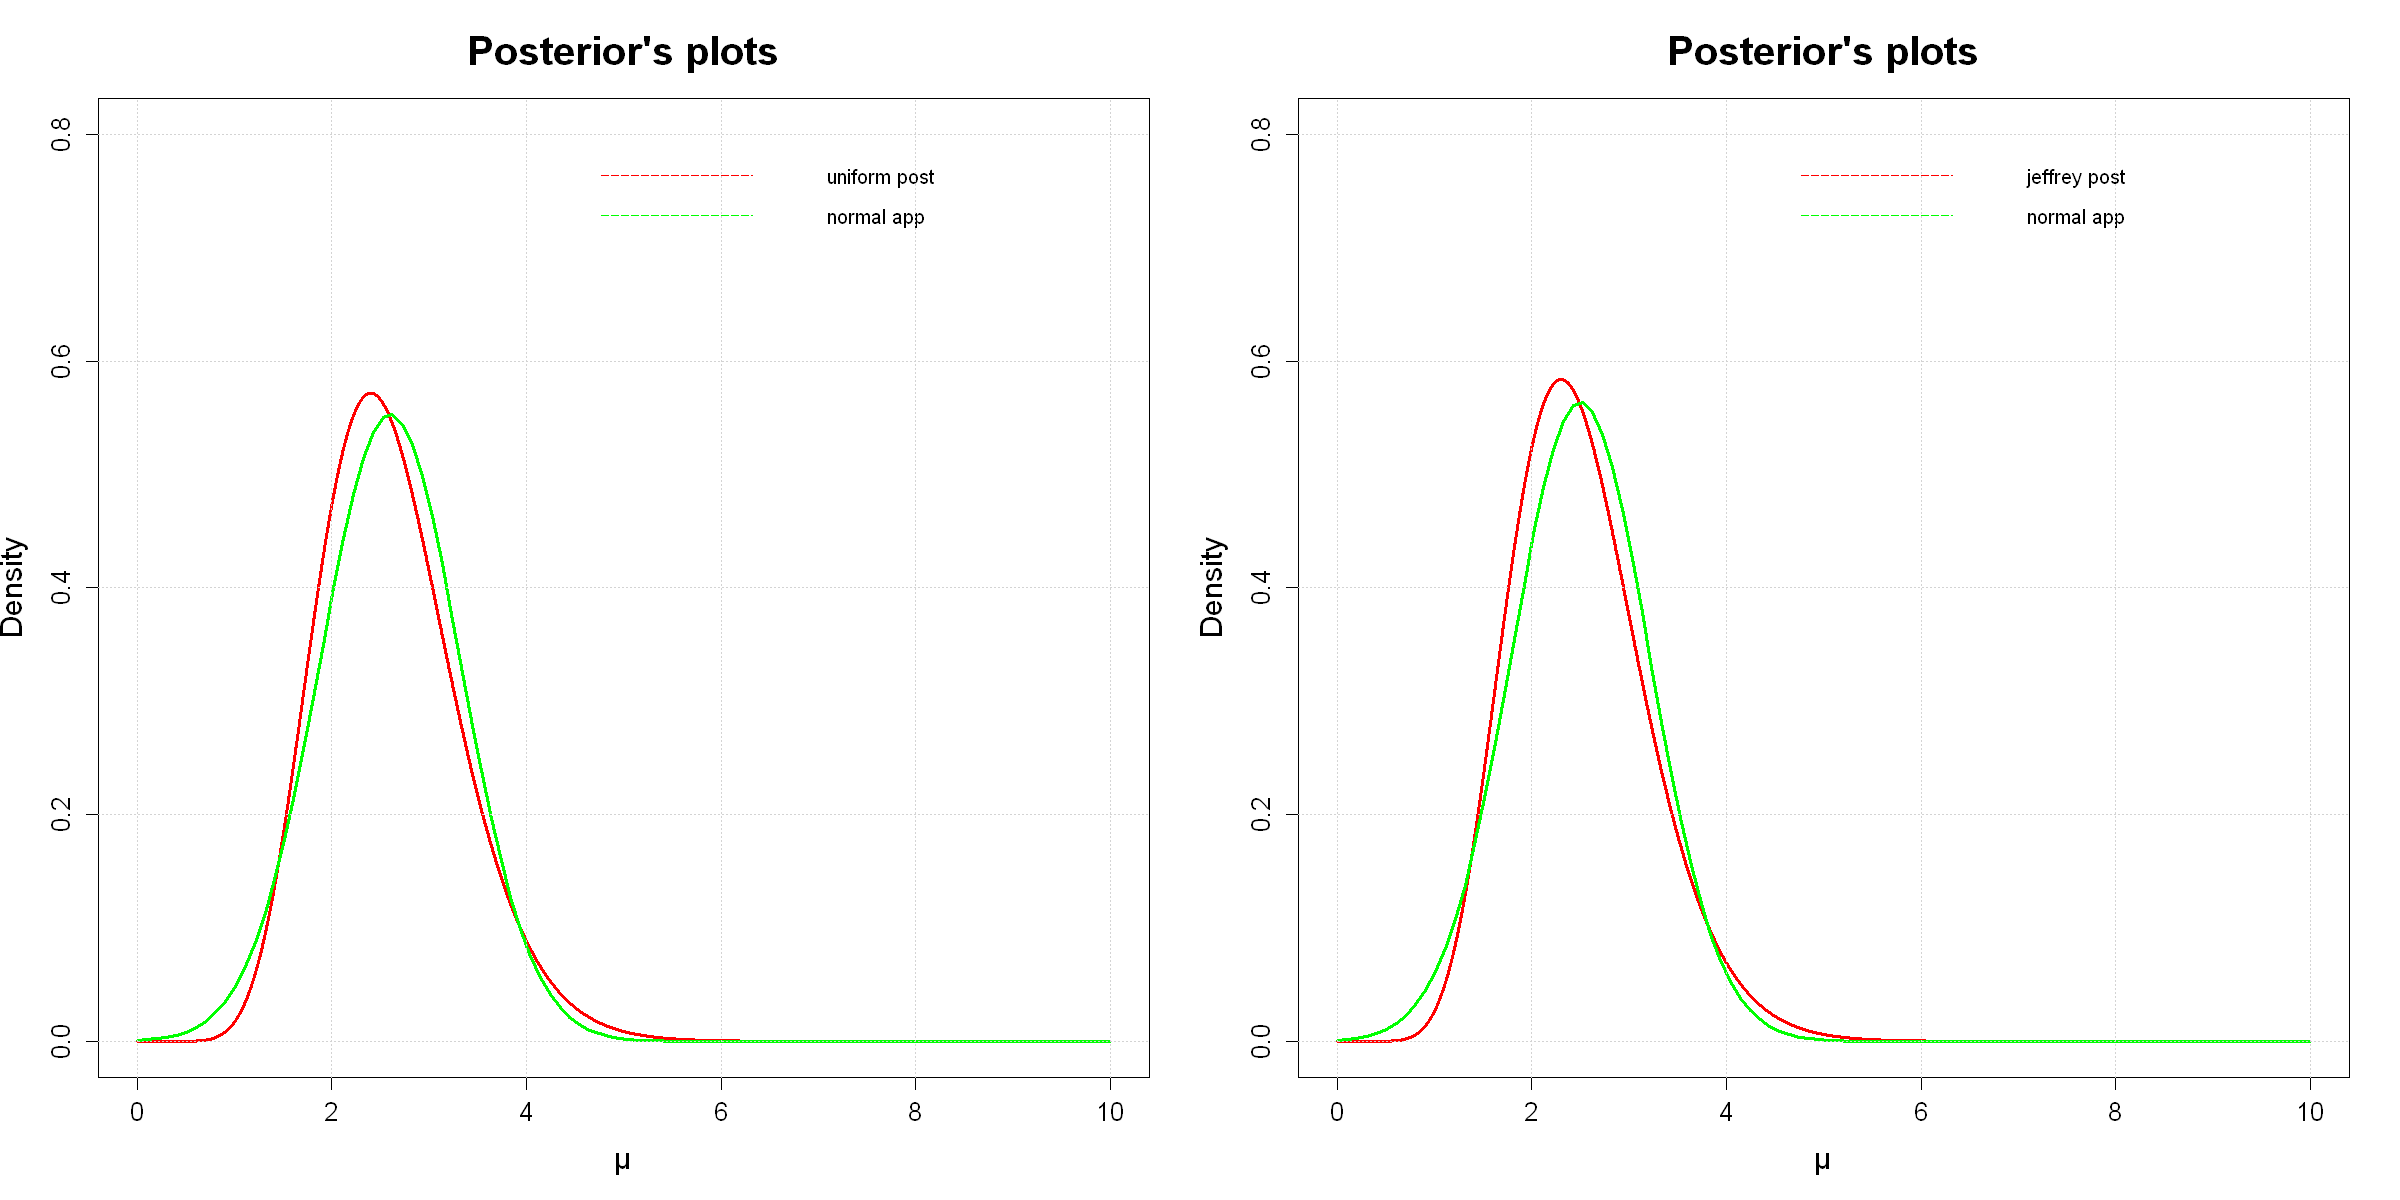

In [6]:
#  Compare the result with that obtained using a normal approximation 
# for the posterior distribution, with the same mean and standard deviation
x <- seq(0, 10, length.out=100) 
post_app_1<- dnorm(x, 2.6, 0.52**(0.5))
post_app_2<- dnorm(x, 2.5, 0.5**(0.5))

par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

plot(dt, post_1, col='red', type='l',
     main = "Posterior's plots", lty=1, lwd = 3, xlab="\u03bc",ylim=c(0,0.8), 
     ylab='Density',cex.main=2,cex.axis=1.3,cex.lab=1.5)
lines(x,post_app_1, col='green', type='l',
     lty=1, lwd = 3, xlab="p", ylim=c(0,2),
     ylab='Density')

legend(4,0.8, inset=0.05,legend=c("uniform post","normal app"),
       col=c("red", "green"), lty=5:5, cex=1,
       box.lty=0,bty = "n")
grid()

plot(dt, post_2, col='red', type='l',
     main = "Posterior's plots", lty=1, lwd = 3, xlab="\u03bc",ylim=c(0,0.8), 
     ylab='Density',cex.main=2,cex.axis=1.3,cex.lab=1.5)
lines(x,post_app_2, col='green', type='l',
     lty=1, lwd = 3, xlab="p", ylim=c(0,2),
     ylab='Density')

legend(4,0.8, inset=0.05,legend=c("jeffrey post","normal app"),
       col=c("red", "green"), lty=5:5, cex=1,
       box.lty=0, bty = "n")
grid()

Credibility interval for uniform Prior: x1= 1.387639 x2= 4.20092 
Credibility interval for jeffrey Prior: x1= 1.315632 x2= 4.072907 
Credibility interval for the 1st (Uniform) normal approximation: x1= 1.194619 x2= 4.021902 
Credibility interval for the 2nd (Jeffrey) normal approximation: x1= 1.121612 x2= 3.894889 


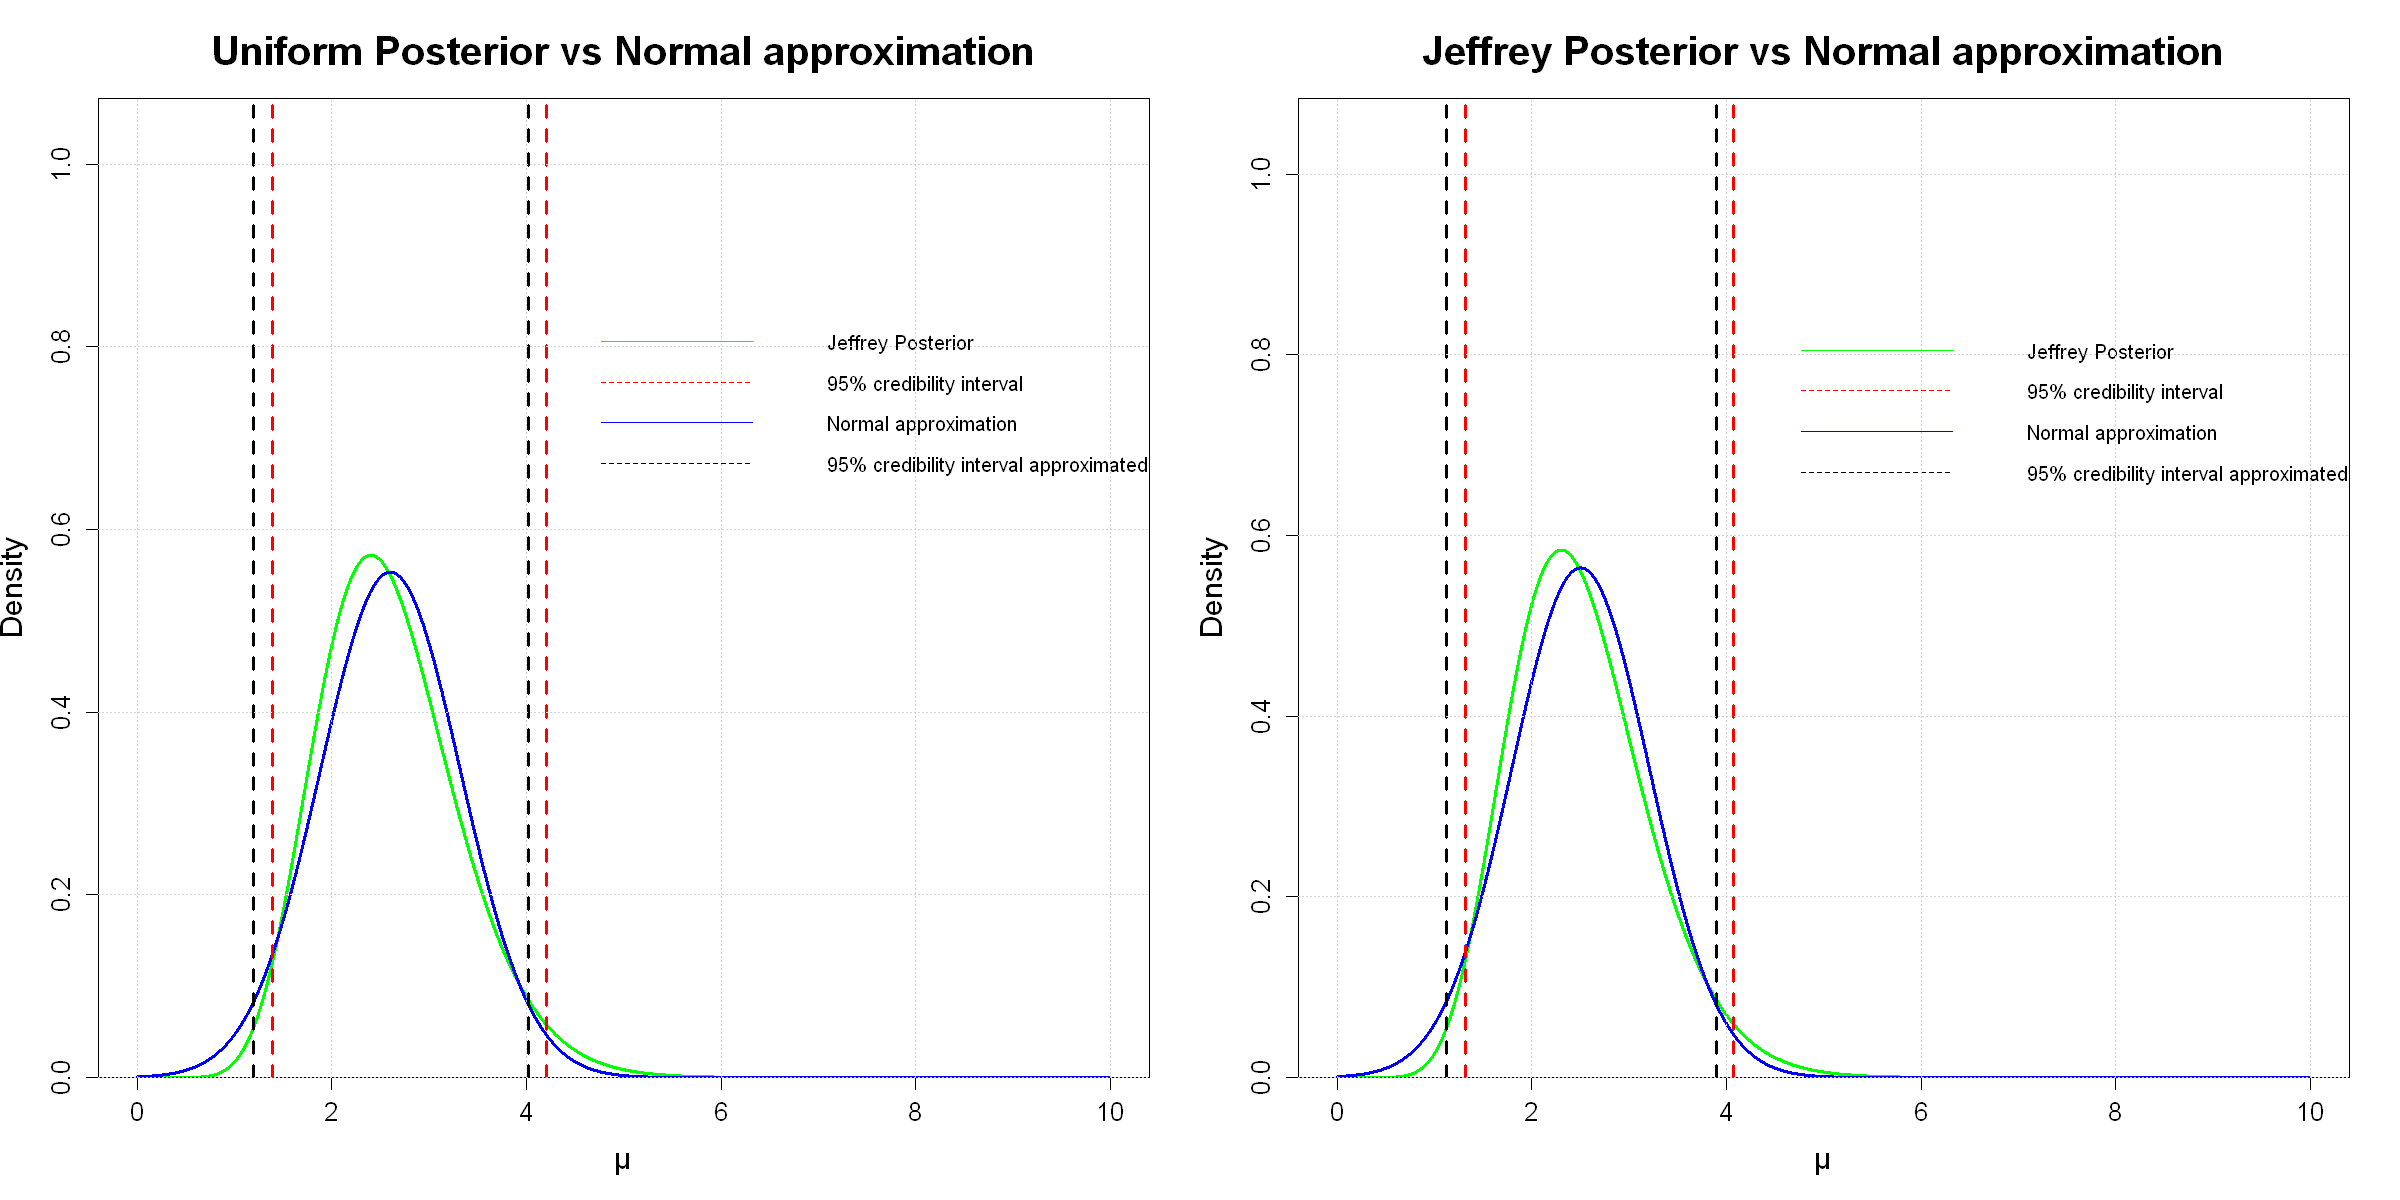

In [7]:
# CONFIDENCE LEVEL:
n.sample <- 10000
delta.p <- 10/n.sample
p <- seq(0, 10, length.out=n.sample) 
post_app_1<- dnorm(p, 2.6, 0.52**(0.5))
post_app_2<- dnorm(p, 2.5, 0.5**(0.5))

conflvl = 0.95
area_1 <- round(delta.p*cumsum(post_1), digits=3)
area_2 <- round(delta.p*cumsum(post_2), digits=3)
area_app_1 <- round(delta.p*cumsum(post_app_1), digits=3)
area_app_2 <- round(delta.p*cumsum(post_app_2), digits=3)

conflvl_func <- function(p,values,conflvl) {
            x1<-0
            x2<-0
            for(i in 1:(length(values)-1)){
                conflvl_sx <- ((1-conflvl)/2 )          
                conflvl_dx <- (conflvl+(1-conflvl)/2)    
                if ( (values[i+1]>= conflvl_sx) & (values[i] <= conflvl_sx)) {
                    x1<-(p[i]+p[i+1])/2
                }
                if ( (values[i+1]>= conflvl_dx) & (values[i] <= conflvl_dx)) {
                    x2<-(p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

conf_1 <- conflvl_func(p,area_1,conflvl)
conf_2 <- conflvl_func(p,area_2,conflvl)
app_1<-conflvl_func(p,area_app_1,conflvl)
app_2<-conflvl_func(p,area_app_2,conflvl)
cat("Credibility interval for uniform Prior: x1=", conf_1[1],"x2=", conf_1[2],'\n')
cat("Credibility interval for jeffrey Prior: x1=", conf_2[1],"x2=", conf_2[2],'\n')
cat("Credibility interval for the 1st (Uniform) normal approximation: x1=", app_1[1],"x2=", app_1[2],'\n')
cat("Credibility interval for the 2nd (Jeffrey) normal approximation: x1=", app_2[1],"x2=", app_2[2],'\n')


# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Uniform Posterior
plot(dt, post_1, xaxs='r', yaxs='i', col='green',xlab="\u03bc" ,type='l', ylim=c(0,max(post_1)+0.5),
     main = "Uniform Posterior vs Normal approximation", lty=1, lwd = 3, 
     ylab='Density',cex.axis=1.3,cex.lab=1.5,cex.main=2)
lines(p,post_app_1, col='blue', type='l',
     lty=1, lwd = 3, xlab="p", ylim=c(0,2),
     ylab='Density')
legend(4,0.85, legend=c("Jeffrey Posterior","95% credibility interval","Normal approximation","95% credibility interval approximated"), col=c("green","red","blue","black"), lty=1:2, cex=1,box.lty=0,bty = "n")

abline(v=conf_1[1], lty=2,col='red',lwd = 3)
abline(v=conf_1[2], lty=2,col='red',lwd = 3)
abline(v=app_1[1], lty=2,col='black',lwd = 3)
abline(v=app_1[2], lty=2,col='black',lwd = 3)
grid()


# Jeffrey's Posterior
plot(dt, post_2, xaxs='r', yaxs='i', col='green',xlab="\u03bc", type='l', ylim=c(0,max(post_2)+0.5),
     main = "Jeffrey Posterior vs Normal approximation", lty=1, lwd = 3, 
     ylab='Density',cex.axis=1.3,cex.lab=1.5,cex.main=2)
lines(p,post_app_2, col='blue', type='l',
     lty=1, lwd = 3, xlab="p", ylim=c(0,2),
     ylab='Density')
legend(4,0.85, legend=c("Jeffrey Posterior","95% credibility interval","Normal approximation","95% credibility interval approximated"), col=c("green","red","blue","black"), lty=1:2, cex=1,box.lty=0,bty = "n")

abline(v=conf_2[1], lty=2,col='red',lwd = 3)
abline(v=conf_2[2], lty=2,col='red',lwd = 3)
abline(v=app_2[1], lty=2,col='black',lwd = 3)
abline(v=app_2[2], lty=2,col='black',lwd = 3)
grid()

## Exercise 2

In [1]:
Nsamp<-1000 #x values
a.true<-20
b.true<-50

#Starting from a uniform dist for theta values we get the set of x.k values:
generate.data <- function(N,alpha,beta){
                    theta.k <- runif(N,-pi/2,pi/2)
                    x.k <- alpha + beta*tan(theta.k)
                    return(x.k)
                 }
# dataset
x.k <- generate.data(Nsamp,a.true,b.true)


In [2]:
log.post.func <- function(alpha,beta,data){
  logL <- 0.0
  for(x in data){
      logL <- logL + log(beta/(pi*(beta^2+(x-alpha)^2))) 
  }
  return(logL)
}

# Grid search list for alpha and beta parameters
n.sample <- 300

x.min <- -50
x.max <- +50
h.x <- (x.max - x.min)/n.sample
alpha_values <- seq(from=x.min, by=h.x, length.out=n.sample+1)

y.min <- 0
y.max <- 100
h.y <- (y.max - y.min)/n.sample
beta_values <- seq(from=y.min, by=h.y, length.out=n.sample+1)

In [3]:
data <- x.k
    
f <- function(alpha,beta){ log.post.func(alpha,beta,data) }
log.grid.post.values <- outer(alpha_values, beta_values, Vectorize(f))#n.sample+1 x n.sample+1

# normalized posterior
log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) 
y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))
grid.values <- matrix(y.post,nrow=length(alpha_values), ncol=length(beta_values))

index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
max.alpha <- alpha_values[index[1]]
max.beta <- beta_values[index[2]]

cat("The true values initially assumed are:\n")
cat("alpha=",a.true,"\tbeta=",b.true,'\n')
cat("The most probable values for",length(data),"samples are:\n")
cat("alpha=",max.alpha,"\tbeta=",max.beta)


    


The true values initially assumed are:
alpha= 20 	beta= 50 
The most probable values for 1000 samples are:
alpha= 20 	beta= 50.33333

## Exercise 3

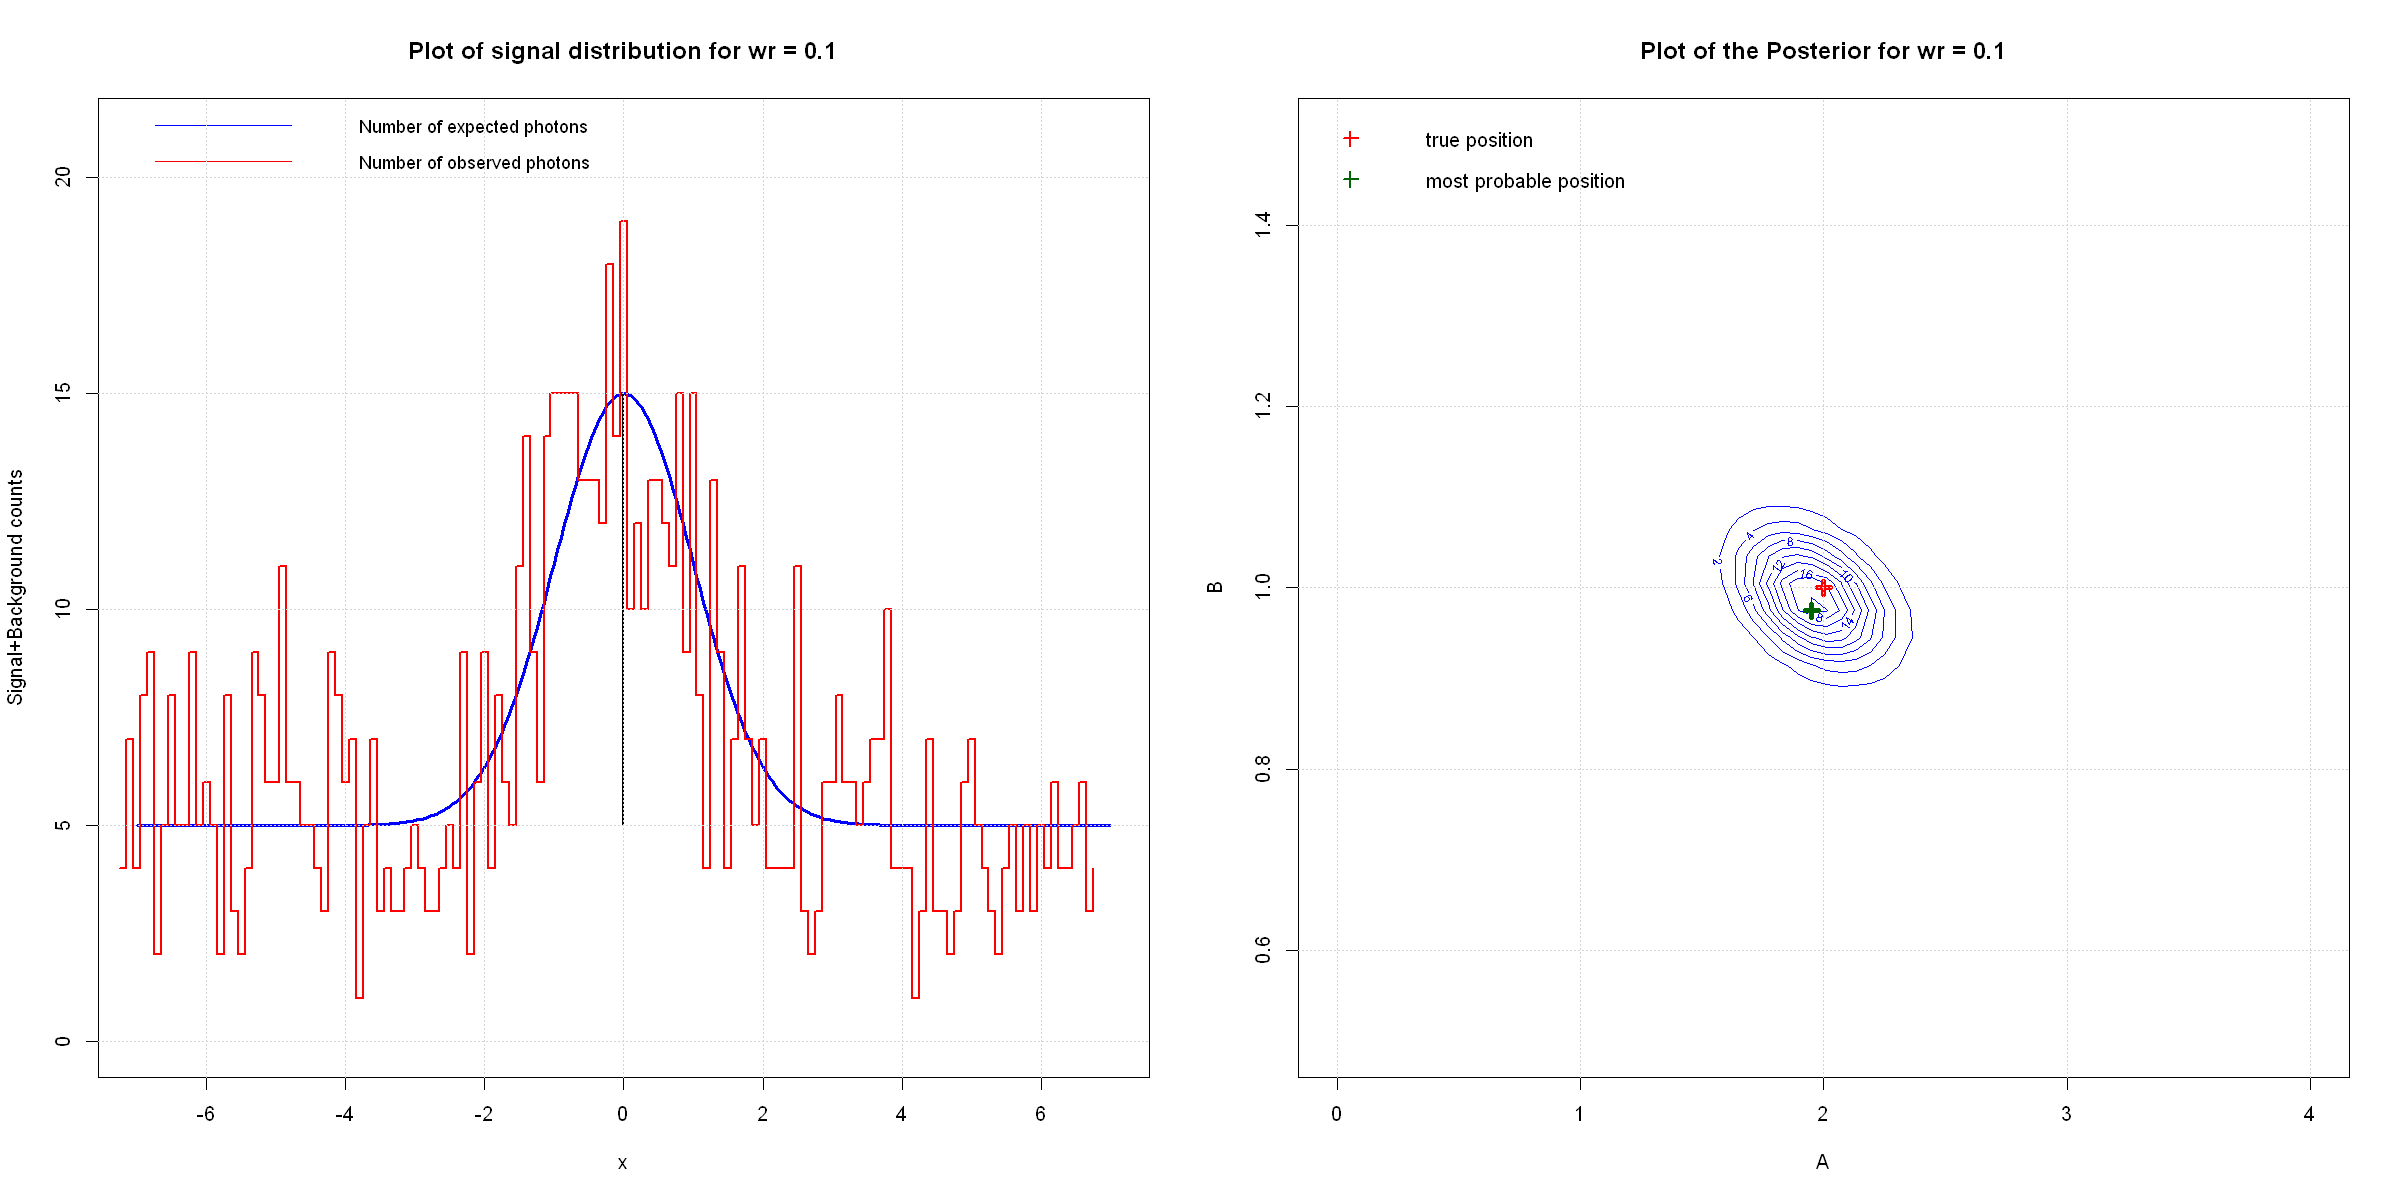

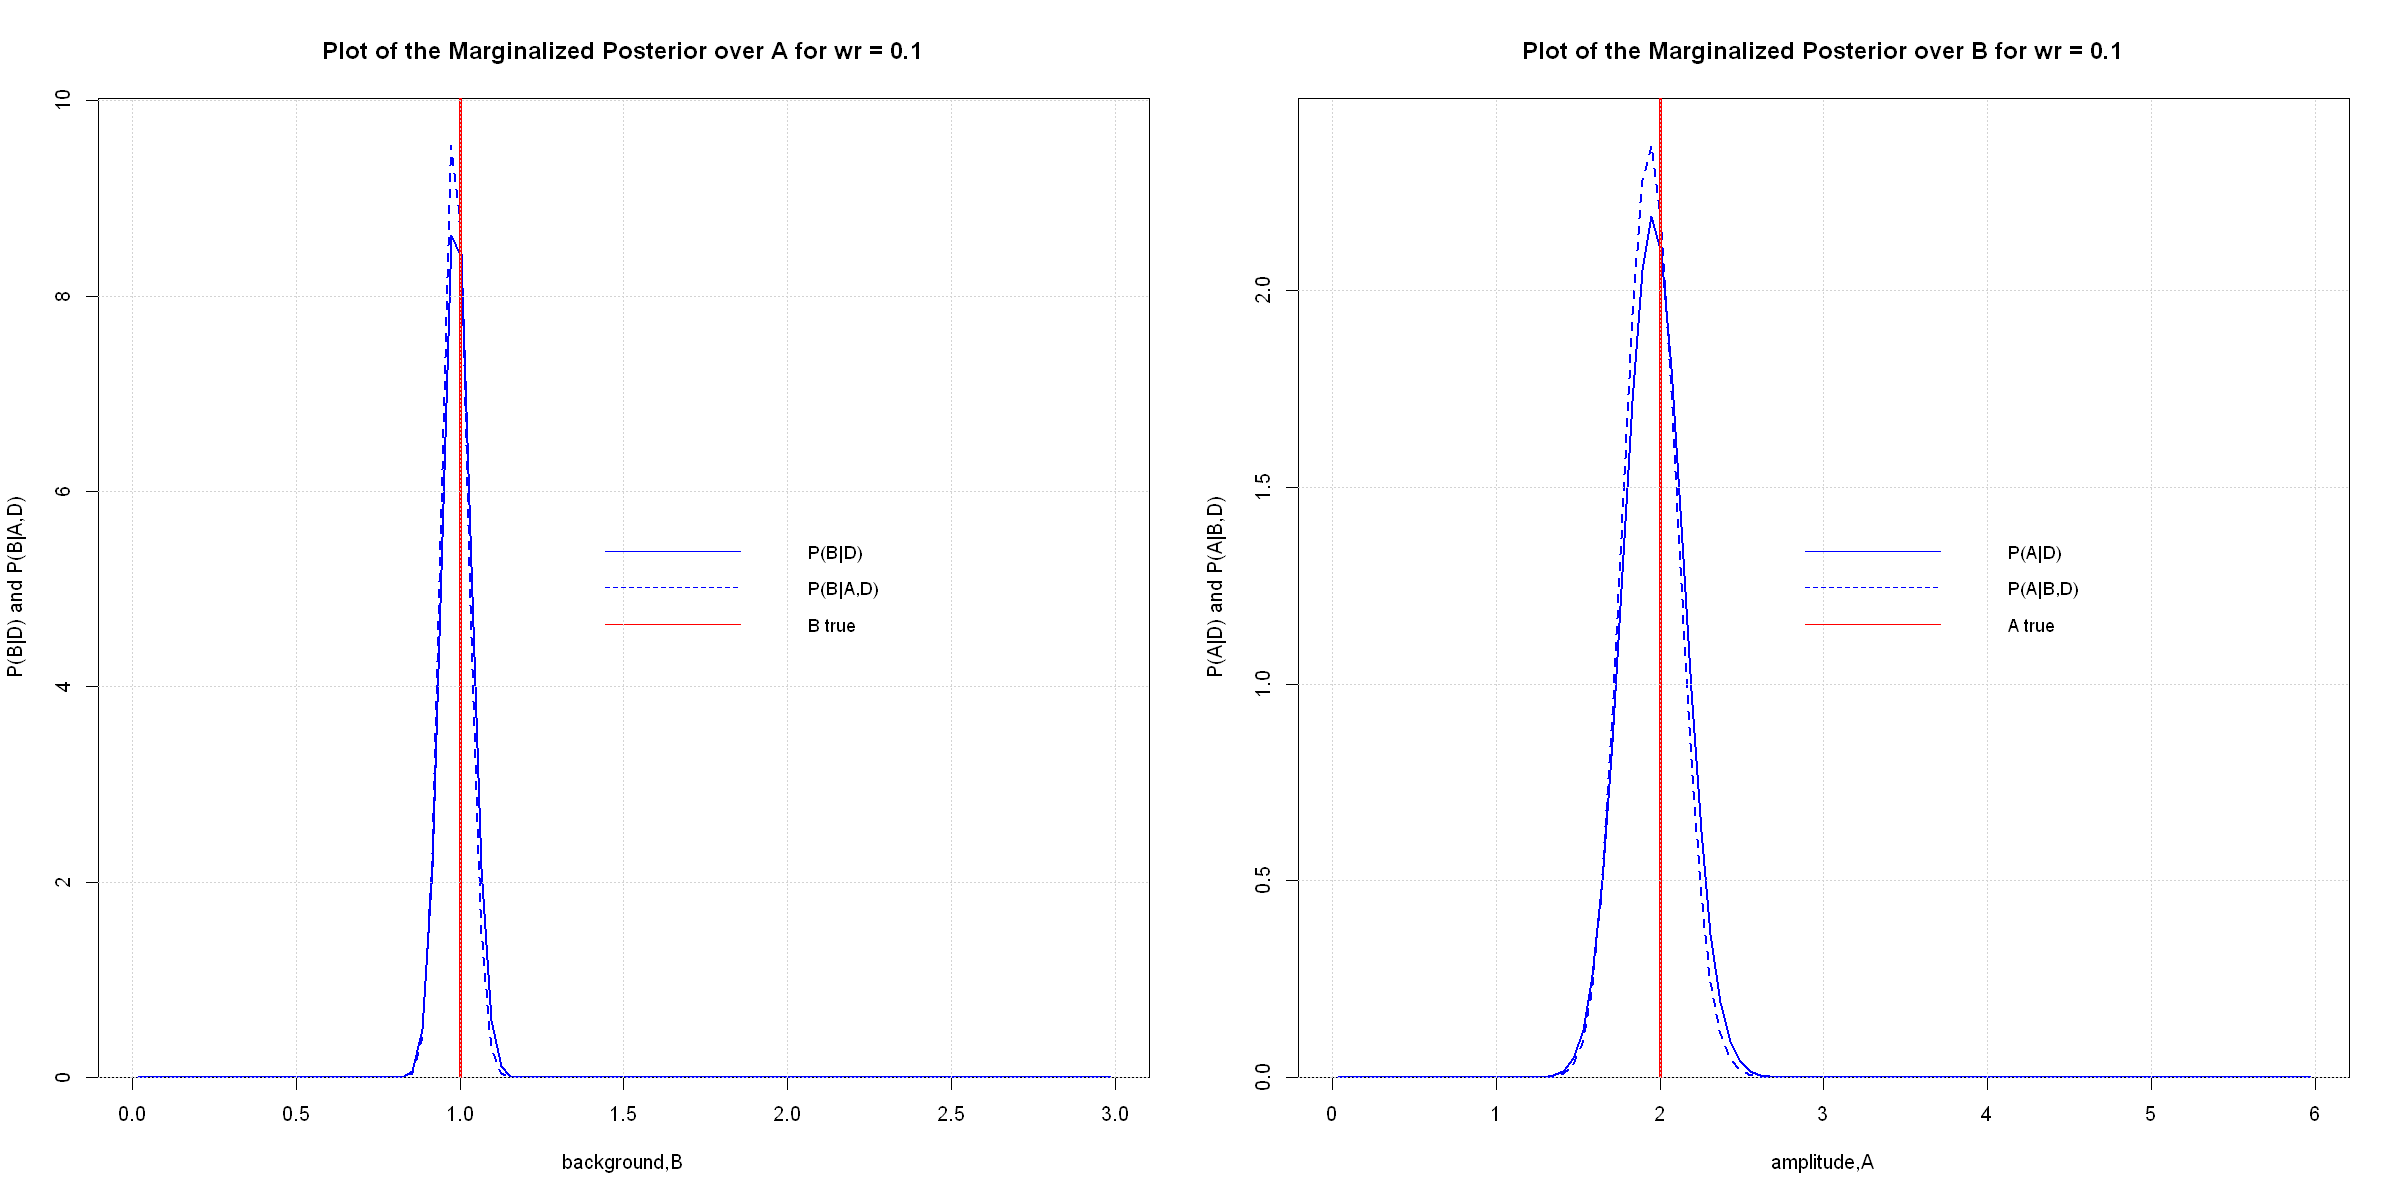

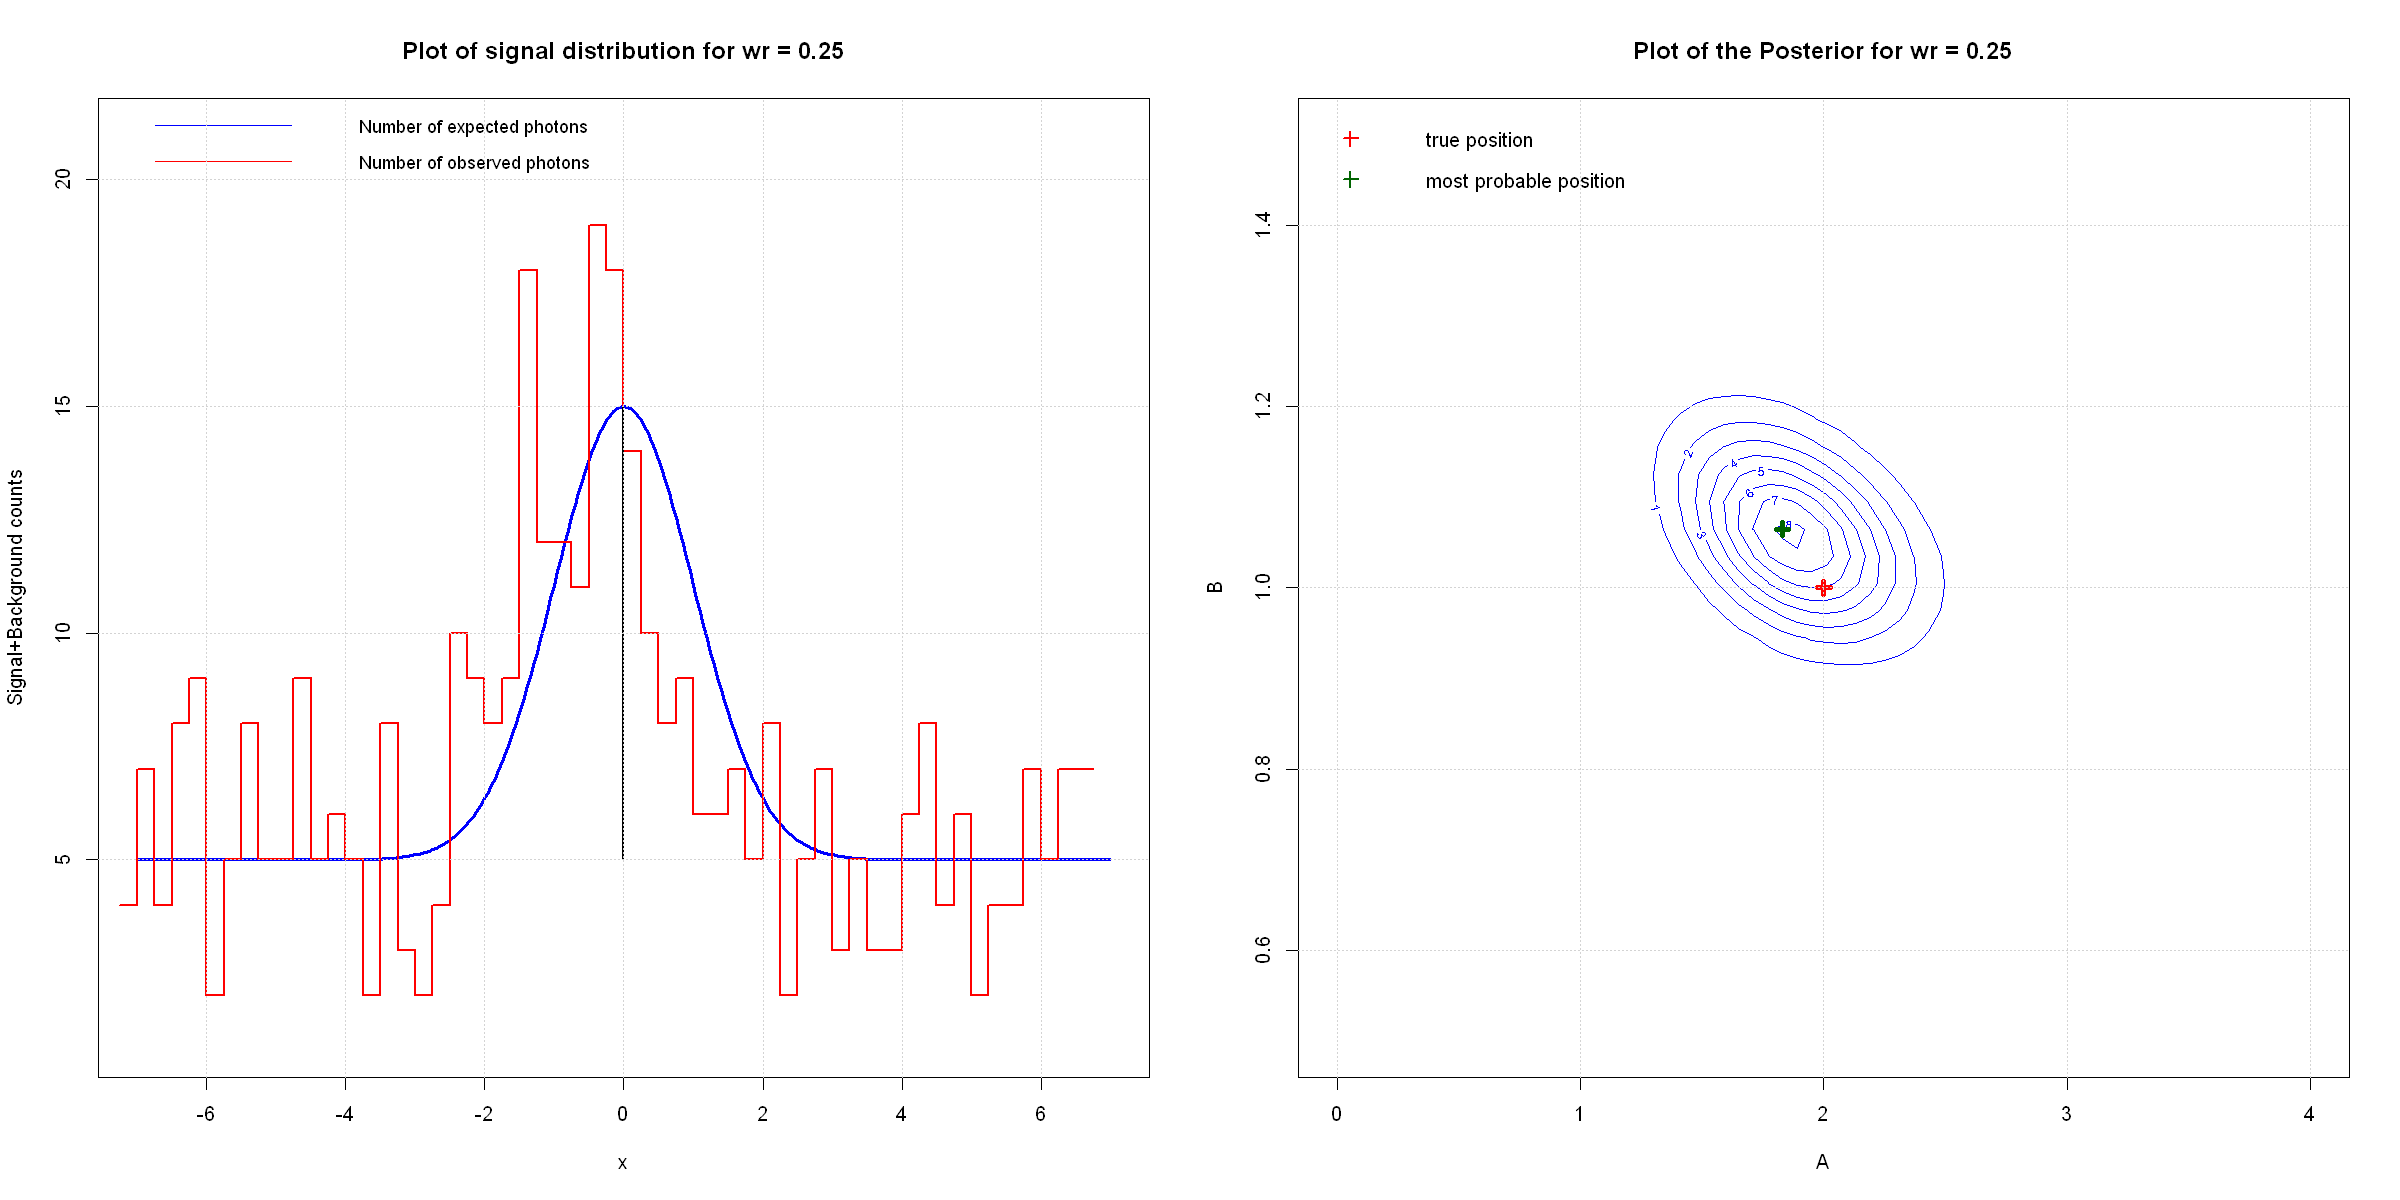

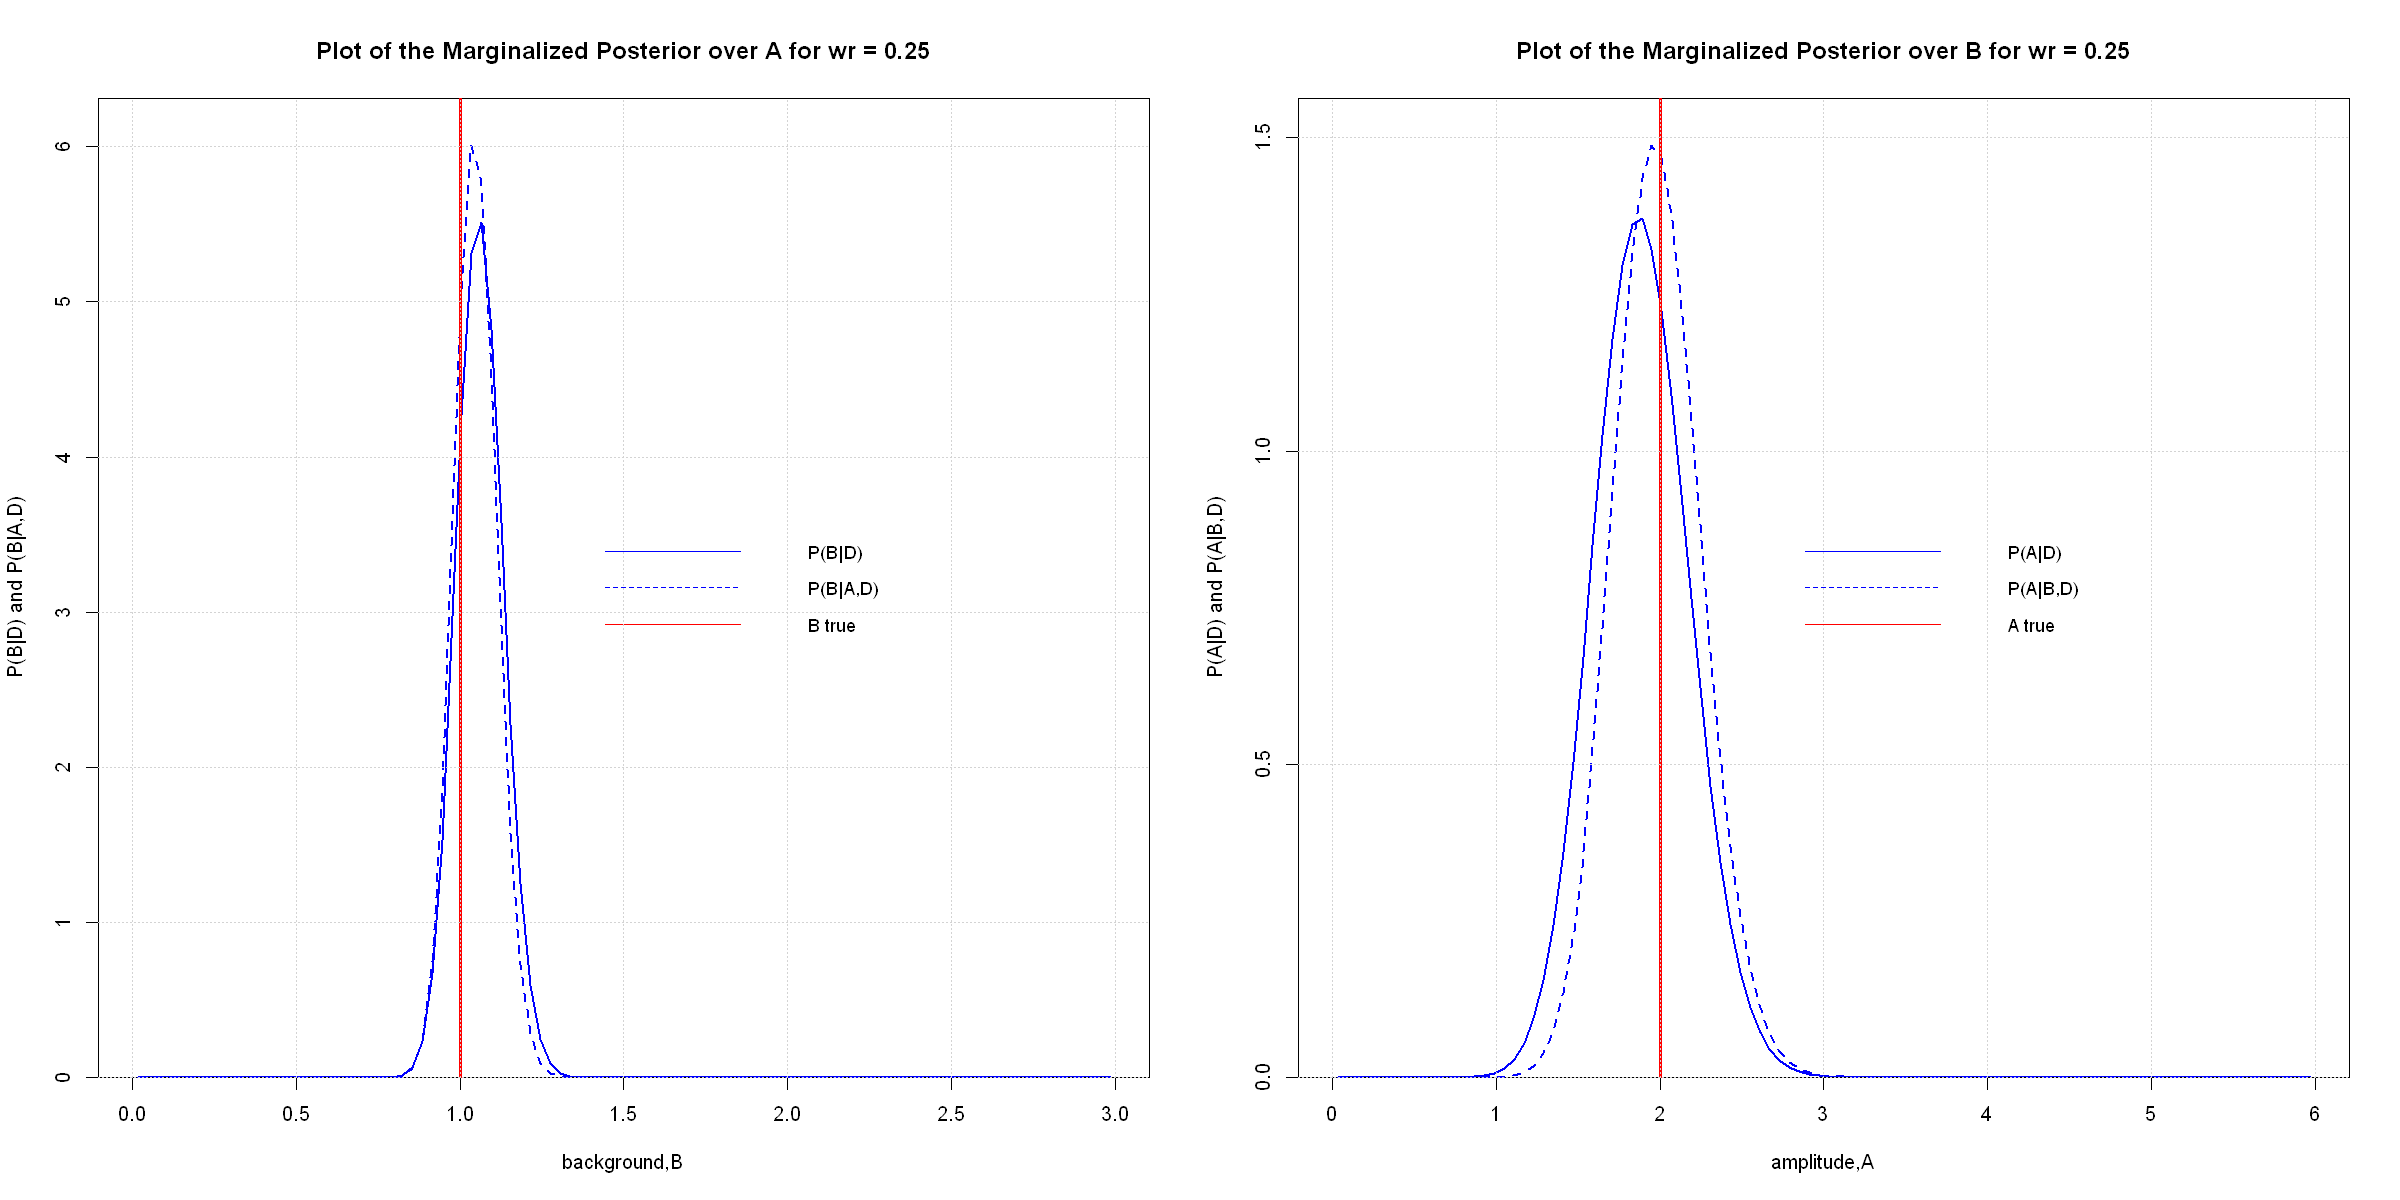

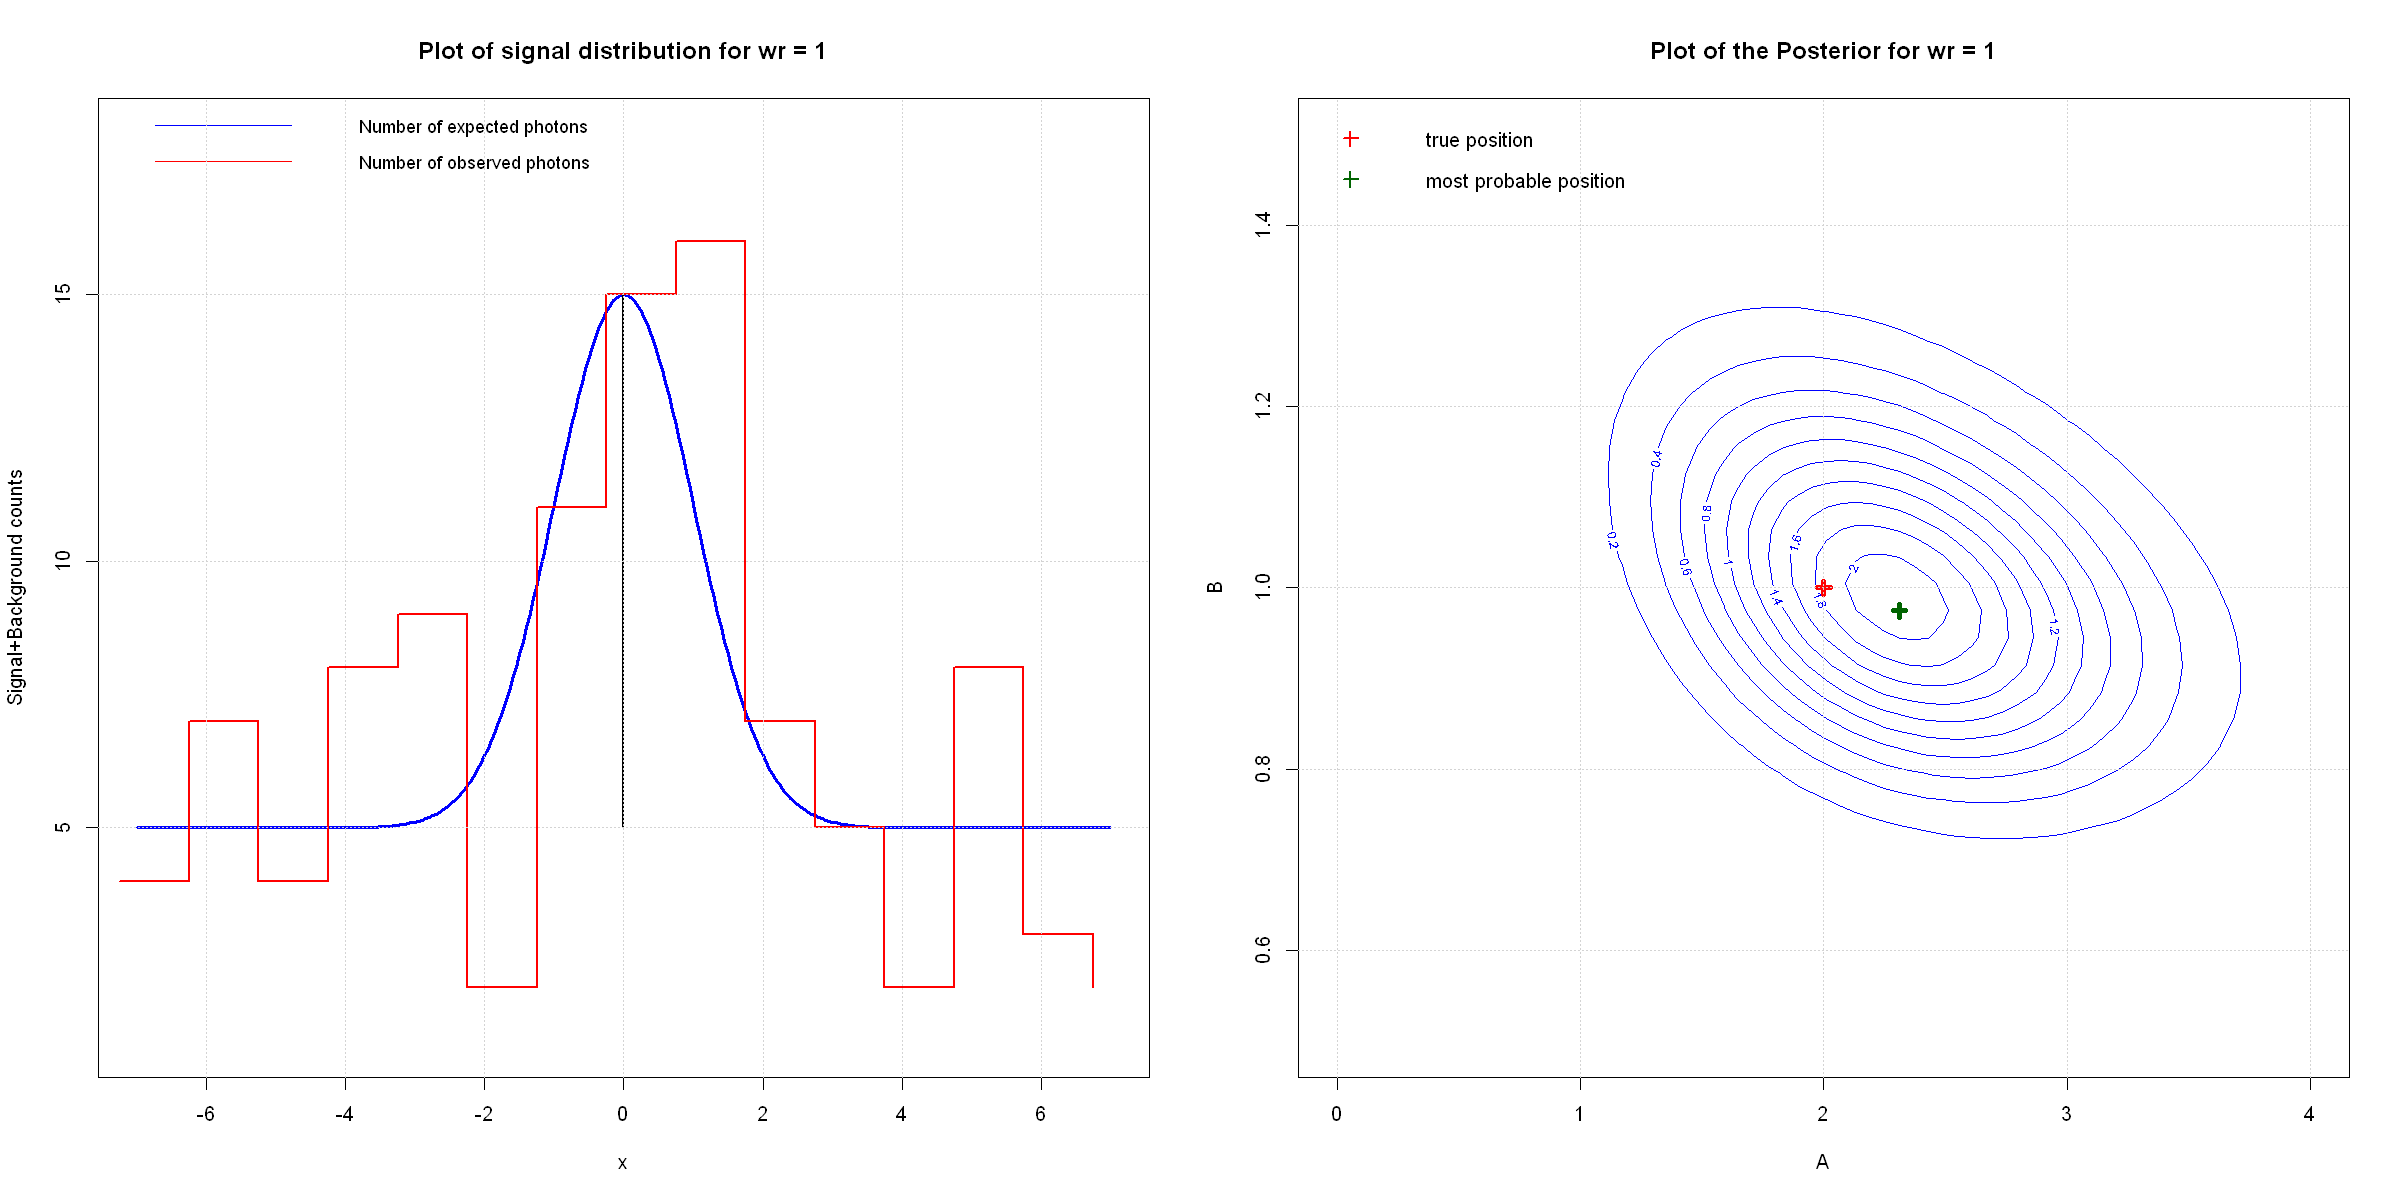

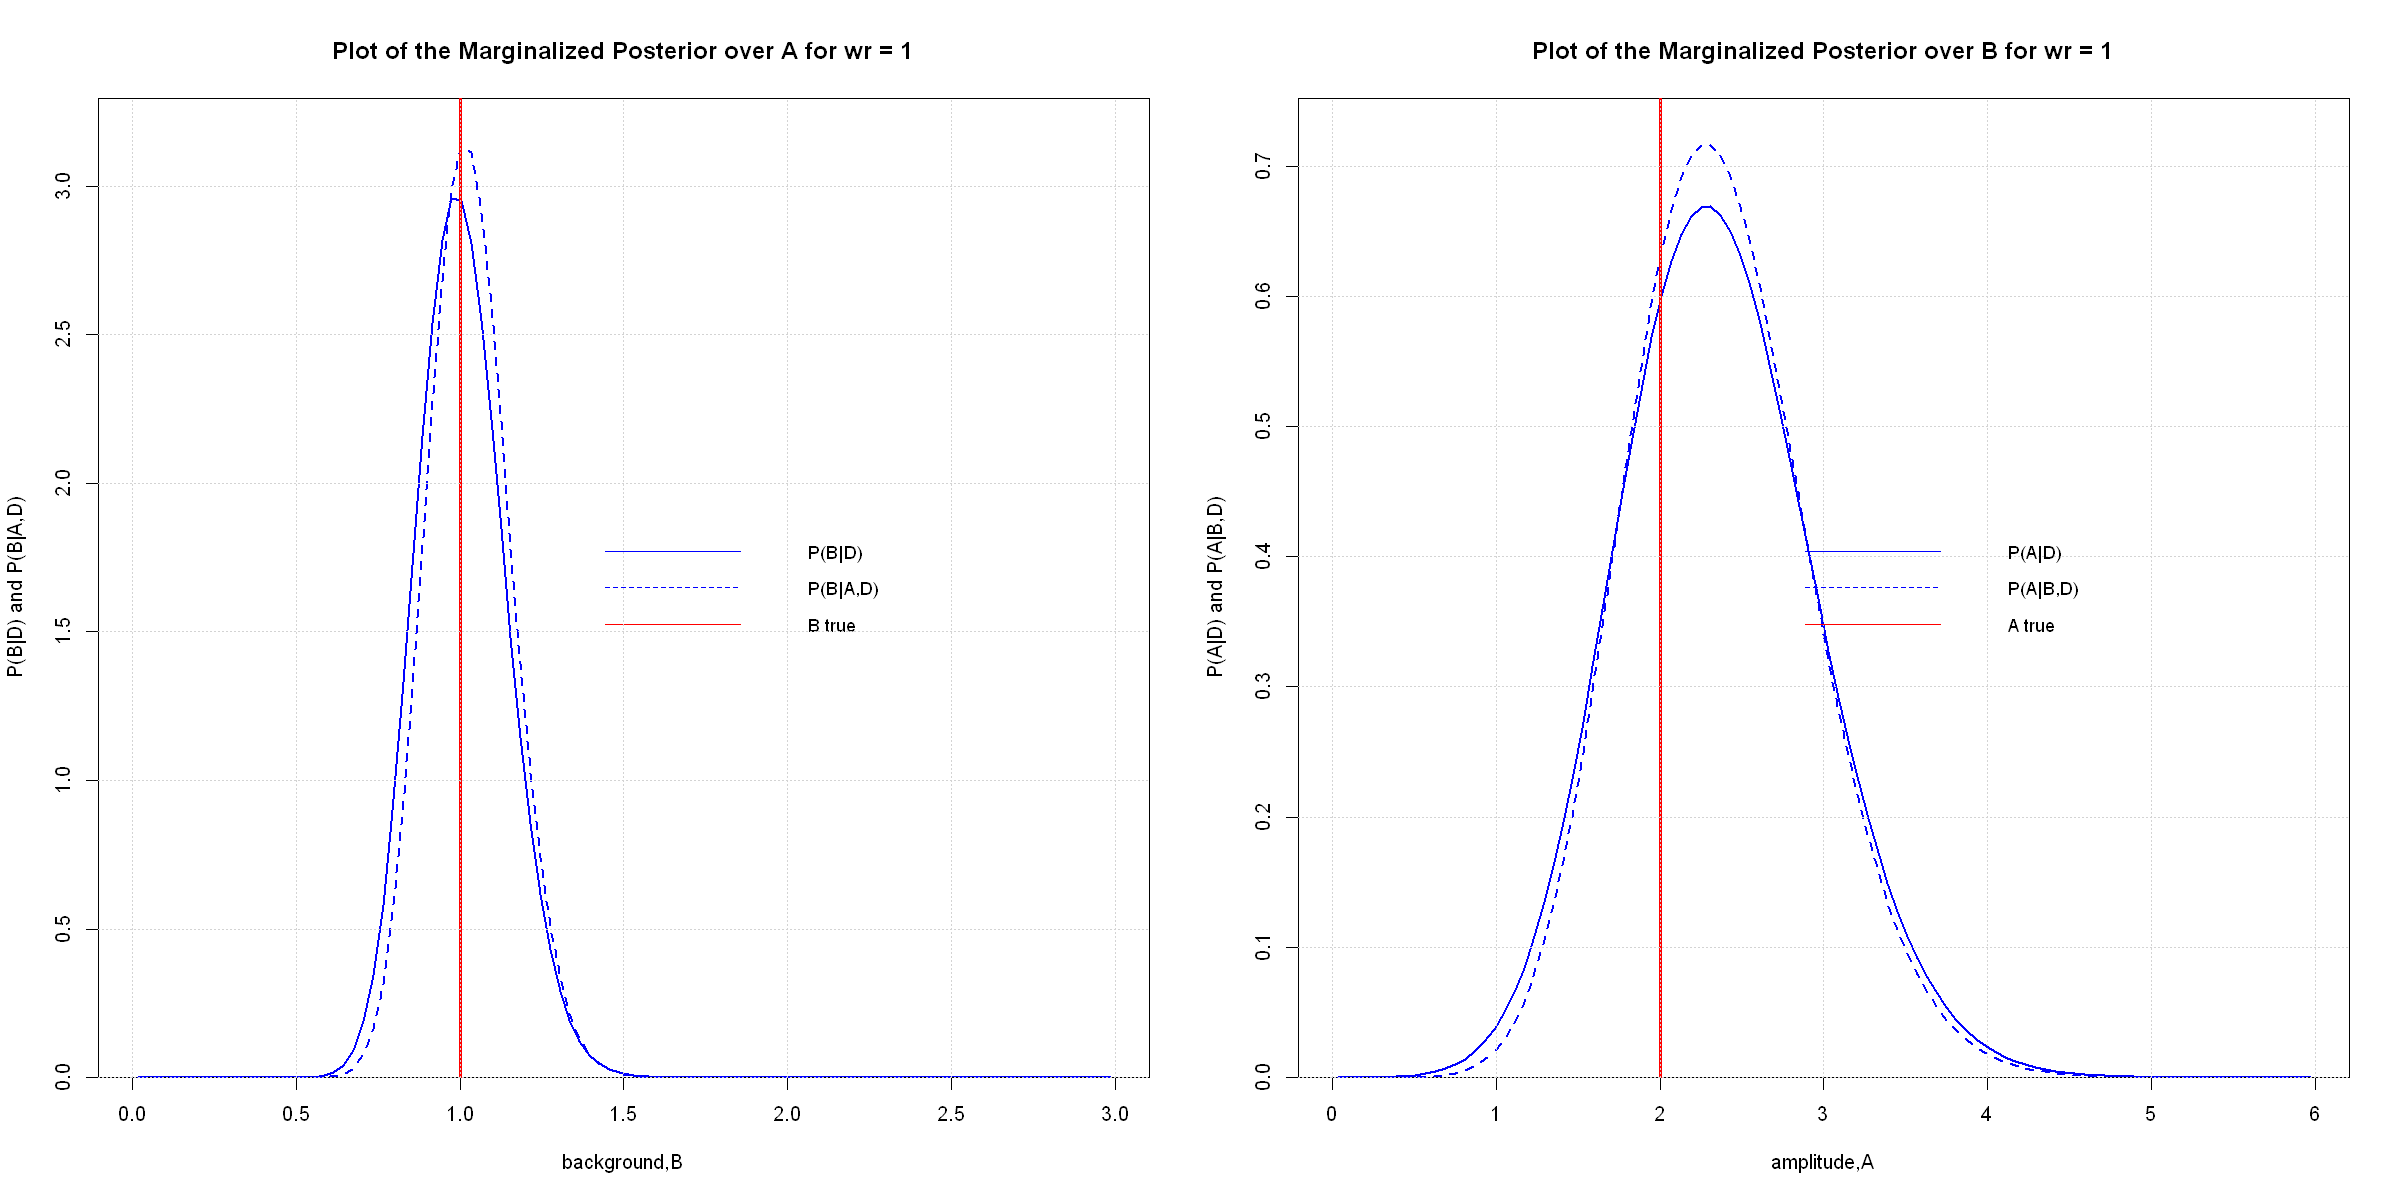

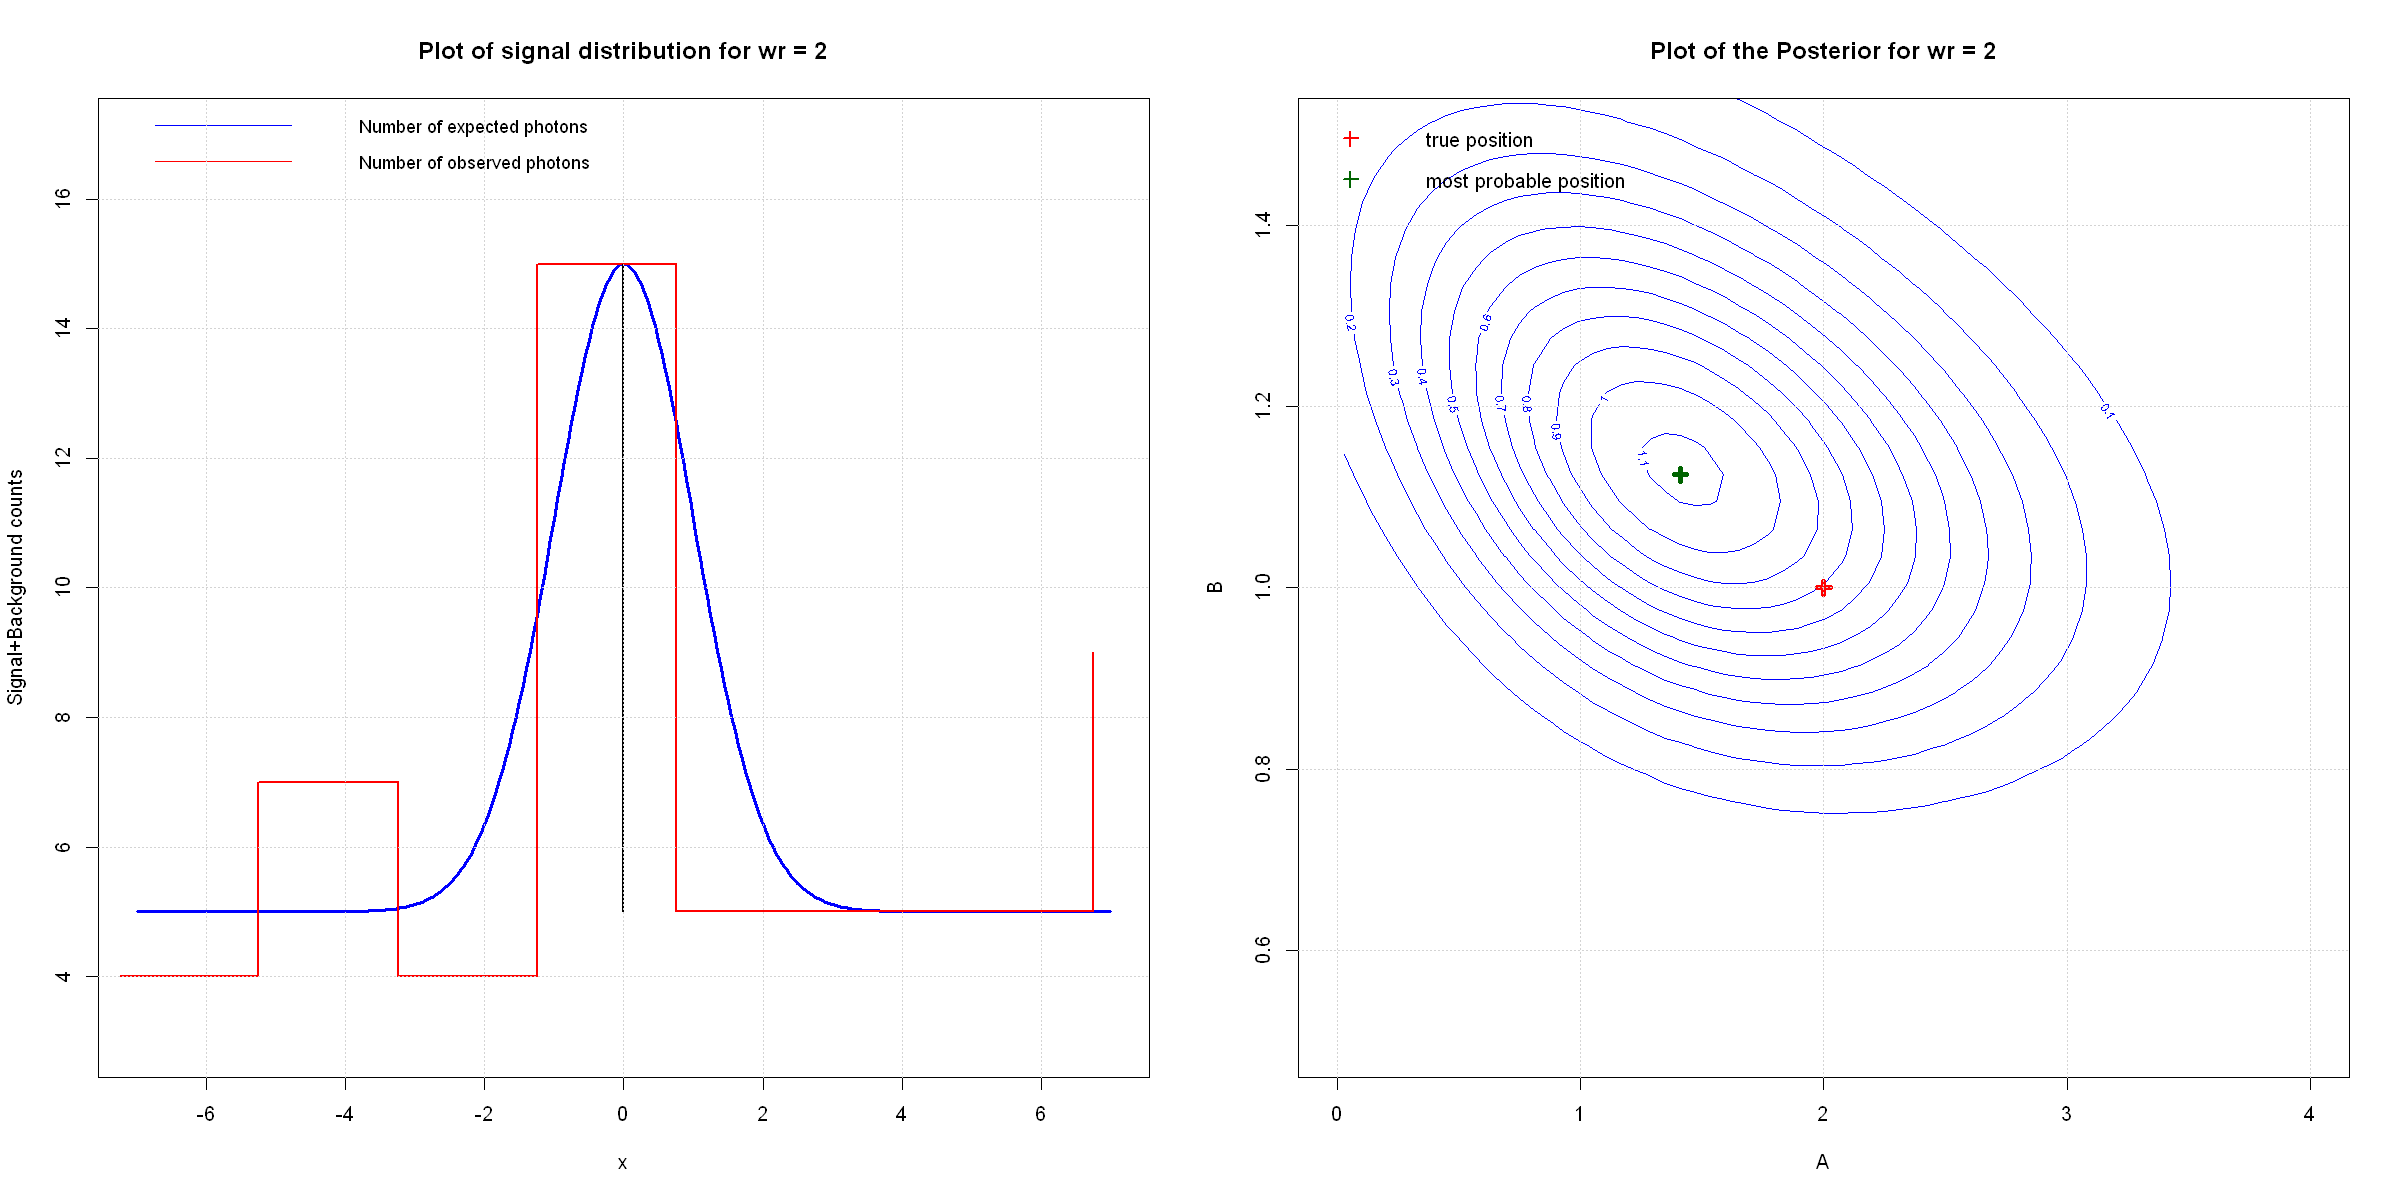

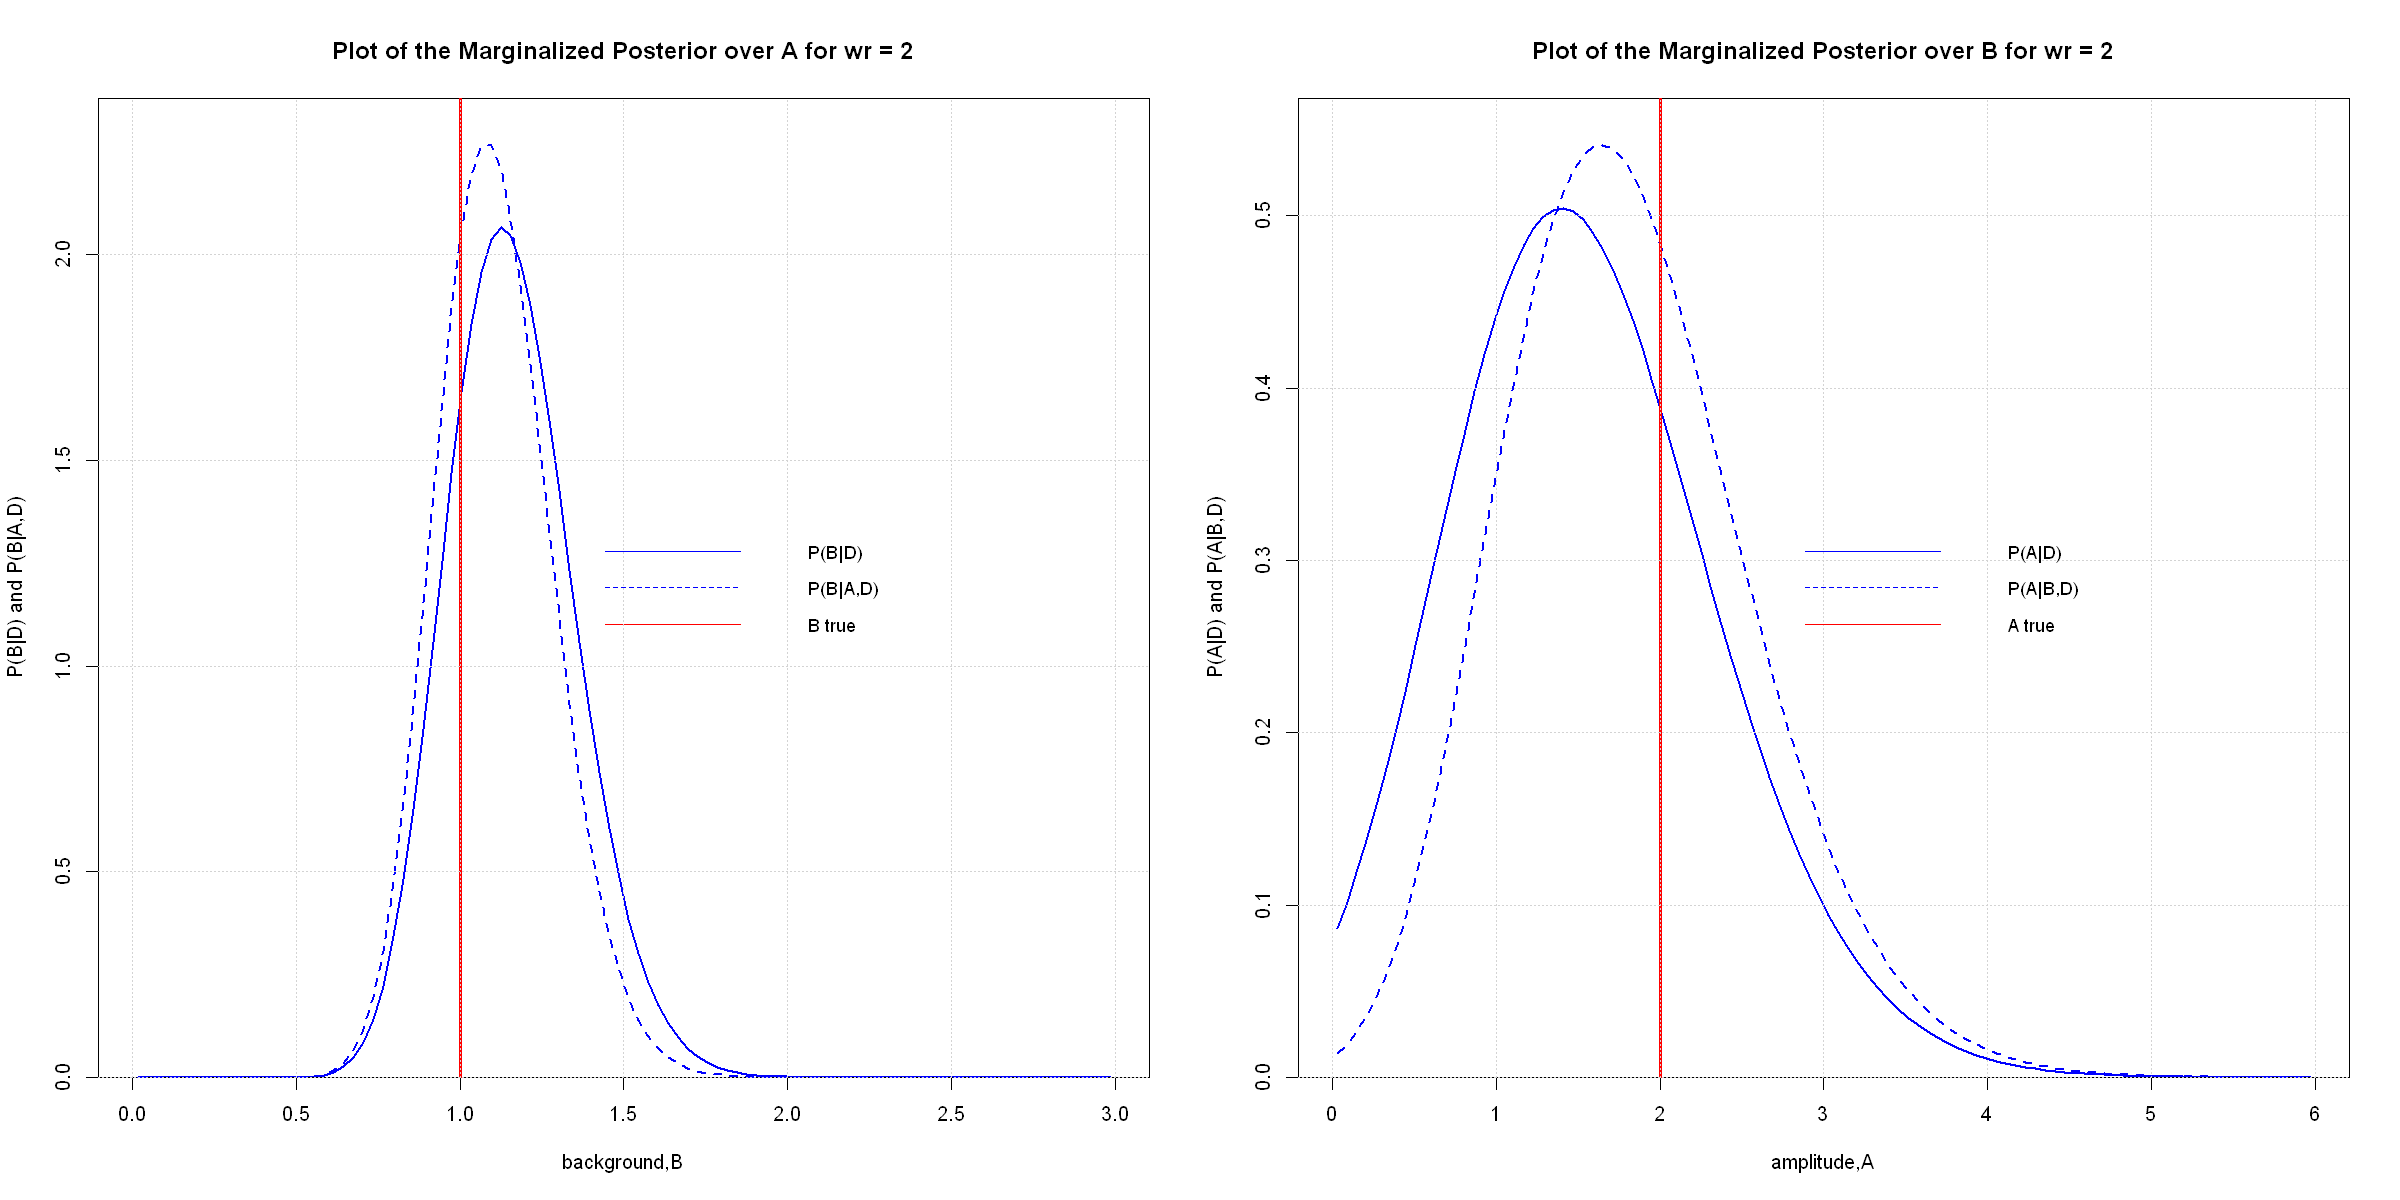

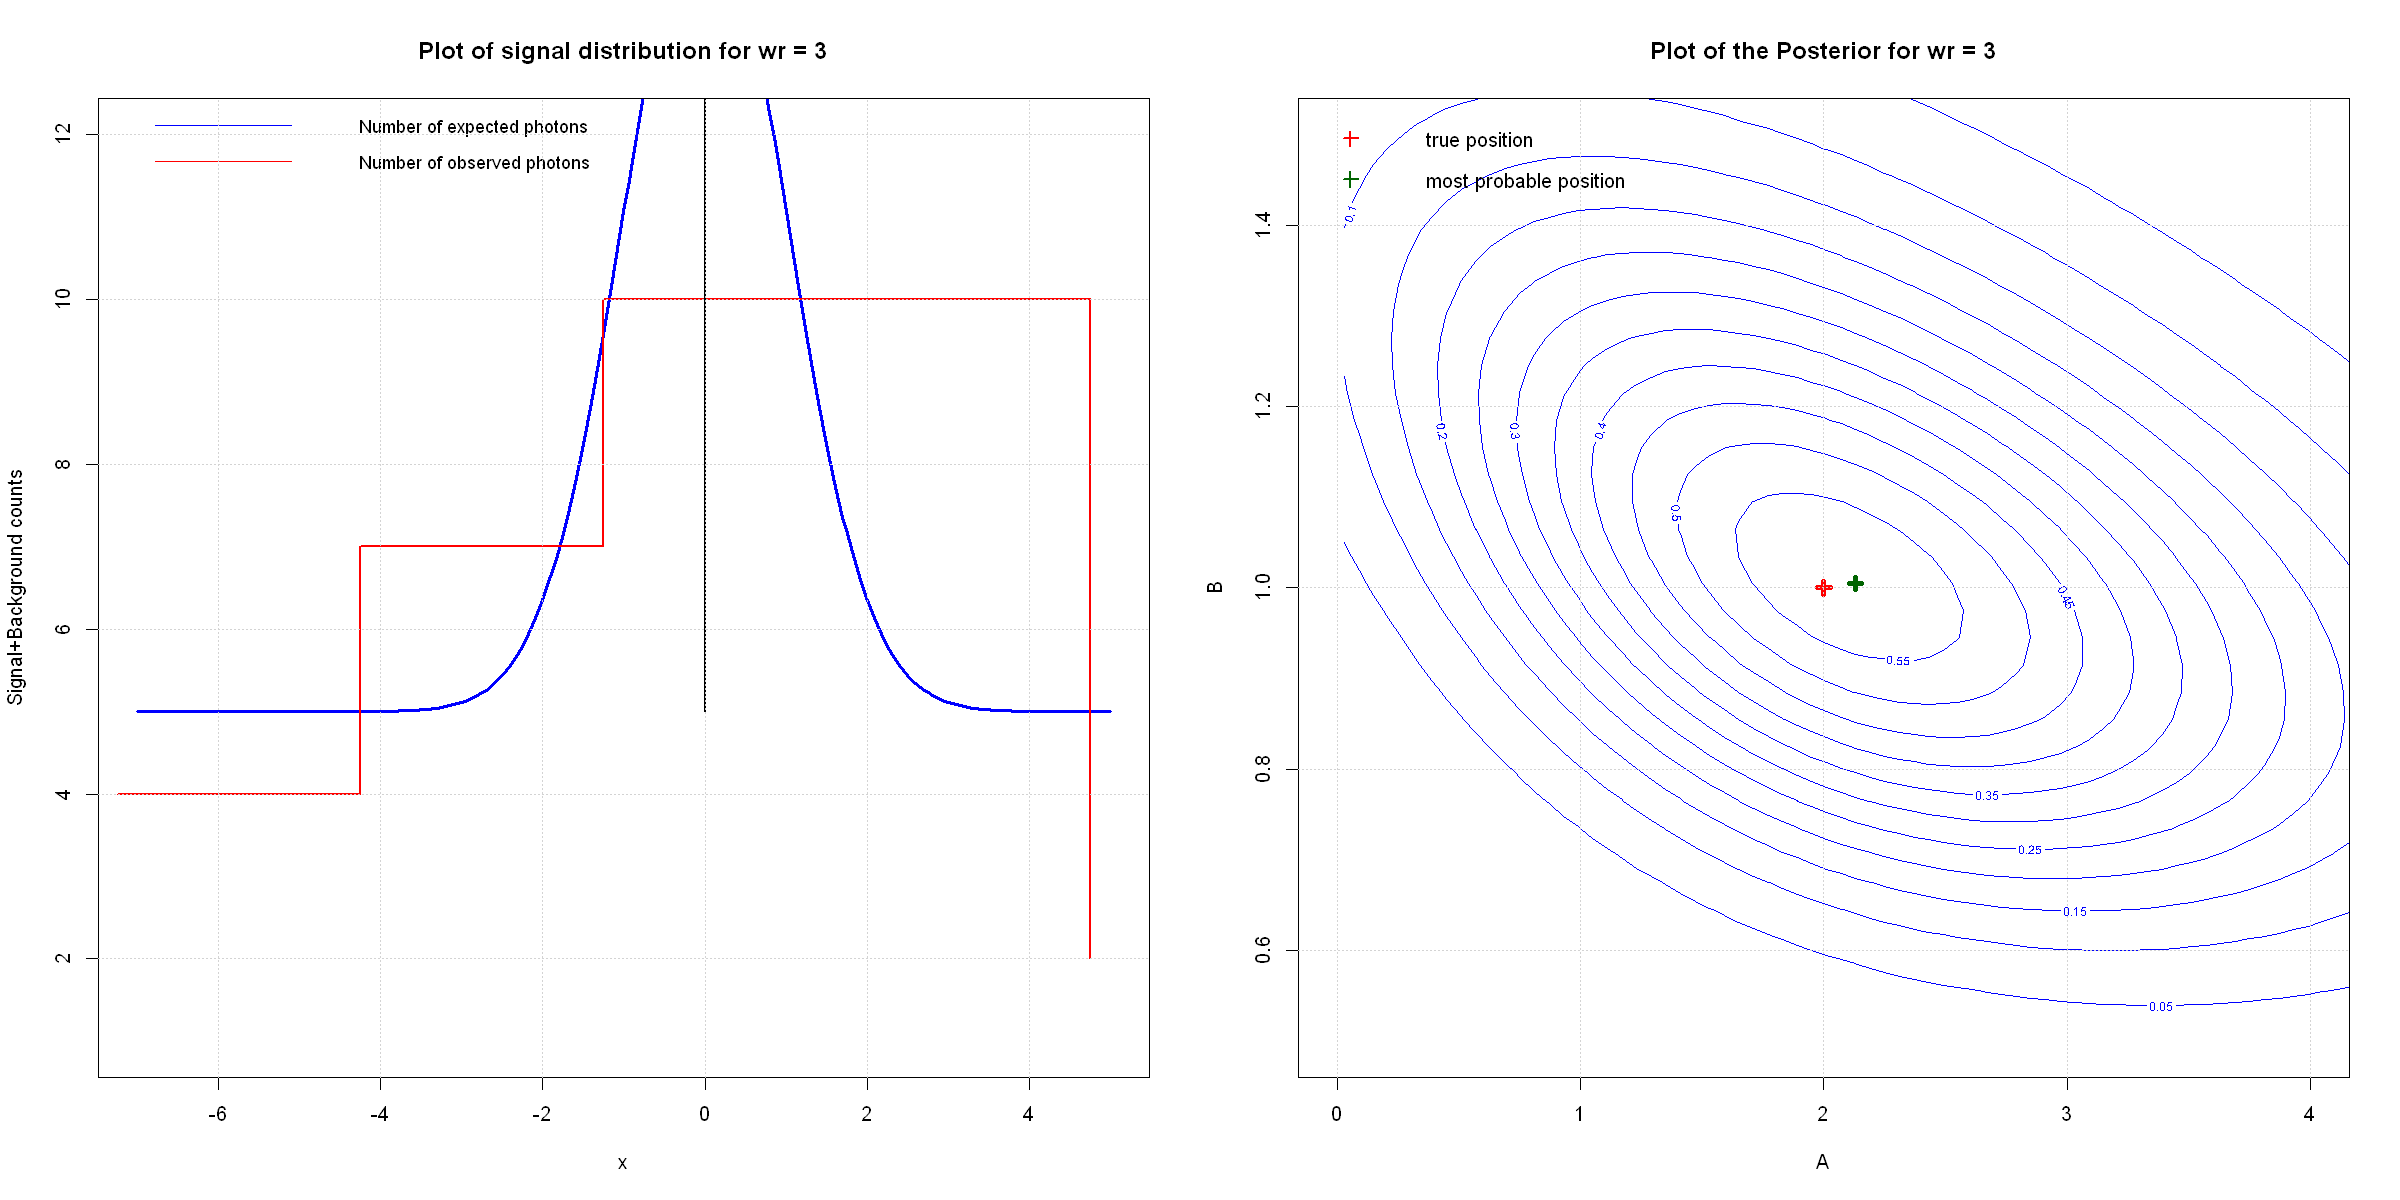

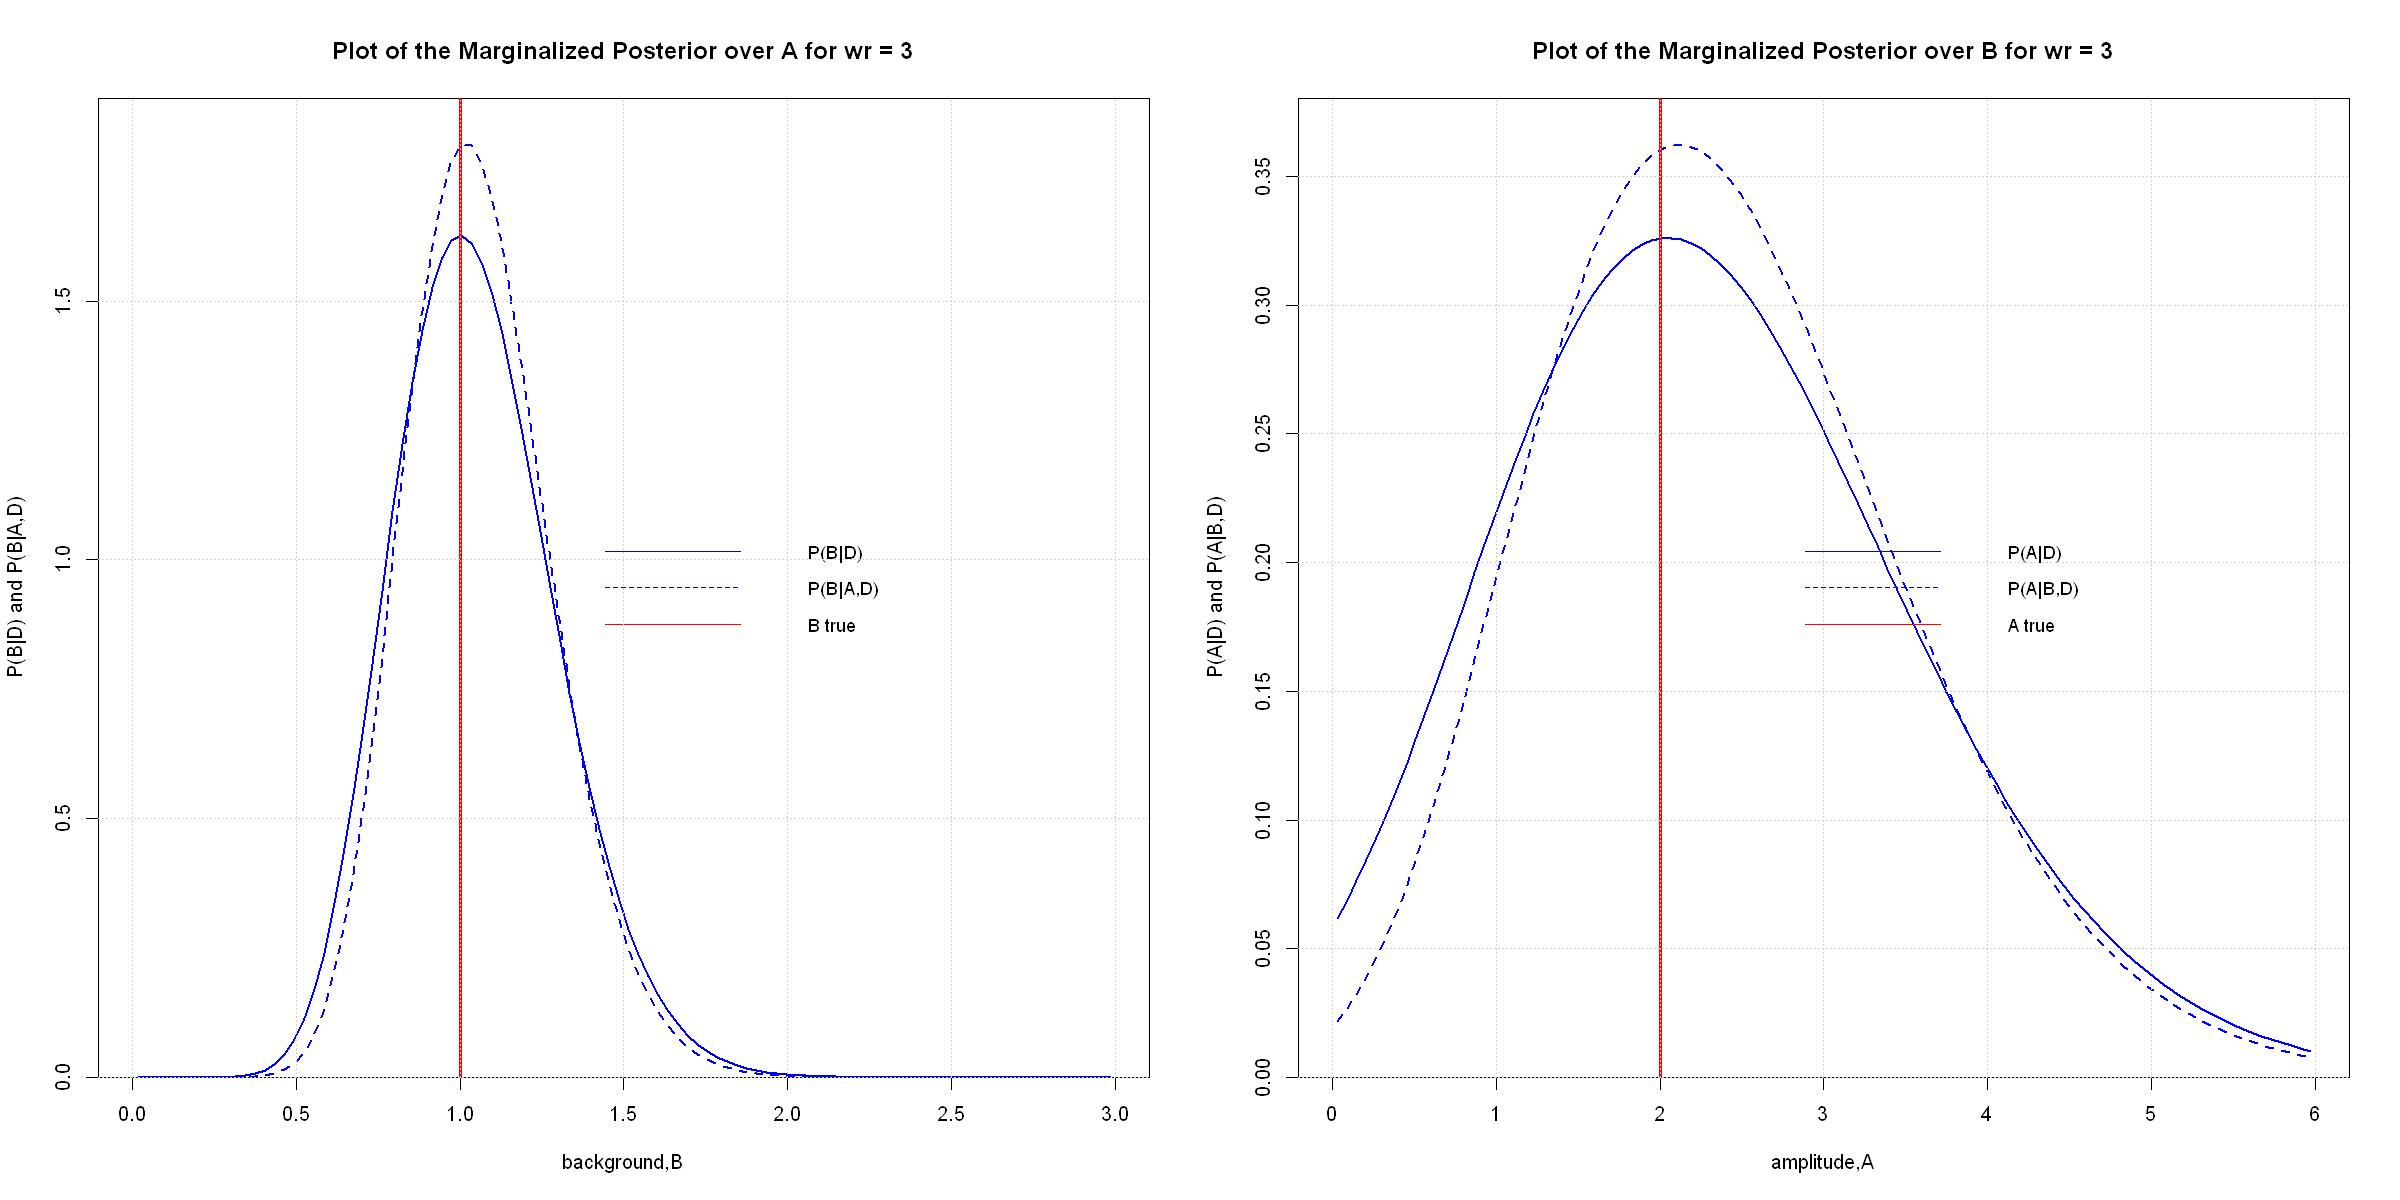

In [16]:
#(a) vary the sampling resolution of used to generate the data, keeping the same sampling range






# Generative model 
signal <- Vectorize( function(x, A, B, x0, w, t) { 
            dt * (A*exp(-(x-x0)^2/(2*w^2)) + B)
          } )


# Log posterior
log.post <- function(data, x, A, B, x0, w, dt) {
            if(A<0 || B <0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, A, B, x0, w, dt), log=TRUE))
            }

# Vary the resolution of w, by varying wr
wr.set <- c(0.1,0.25,1,2,3)

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Define list for most probable value obtained
A.list <- c(NULL)
B.list <- c(NULL)


for(wr in wr.set){

    # Define the model parameters
    A.true <- 2 # Signal amplitude 
    B.true <- 1 # Background amplitude 
    dt <- 5     # Exposure time 
    x0 <- 0     # Signal peak
    w <- 1      # Signal width
    
    
    #  data
    set.seed(123)
    xdat <- seq(from=-7*w, to=7*w, by=wr*w) # w values
    s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
    ddat <- rpois(length(s.true), s.true)
    
    
    # Plot the number of expected photons (not integer)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, dt) 
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
         type='l',lty=1, lwd=3, col='blue', ylim=c(min(ddat)-1,max(ddat)+2),
         main=paste("Plot of signal distribution for wr =",wr))
    # Plot the number of observed photons (integer) 
    xdat.off <- xdat - 0.25 # Remove offset in the plot
    lines(xdat.off, ddat, type='s',col='red', lwd=2)
    legend("topleft",inset=-0.01,c("Number of expected photons","Number of observed photons"), 
           col=c("blue","red"), lty=1, cex=0.9,box.lty=0,bty="n")       
    # Plot amplitude
    xp <- c(0,0)
    yp <- c(min(splot),max(splot))
    polygon(x = xp, y = yp, col = 'red',lwd=2)
    grid()
    
    
    # Sampling grid for computing Posterior
    alim <- c(0.0, 6.0)
    blim <- c(0, 3)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    A <- alim[1] + diff(alim)*uniGrid 
    B <- blim[1] + diff(blim)*uniGrid
    
    # Compute the Normalized Posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B)) 
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
    } }   
    # Normalize the Posterior
    z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
    # Plot Normalized 2D posterior as contours(a, b, exp(z))
    contour(A, B, z.norm, main=paste("Plot of the Posterior for wr =",wr),
            xlim=c(min(0,A.true),max(4,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="blue",
            nlevels=10)  
    
    # Plot of the true value of alpha and beta
    points(A.true, B.true, pch=3, col="red", lwd=4) 
    grid()
    
    # Plot the most probable values of the Posterior
    index <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- A[index[1]]
    max.B <- B[index[2]]
    points(max.A, max.B, pch=3, col="darkgreen", lwd=4) 


    legend("topright",c("true position","most probable position"), 
           col=c("red","darkgreen"), pch=3, pt.cex=1.2, pt.lwd=2,bty = "n") 
    
    # Append most probable values to the list A.list, B.list
    A.list <- c(A.list,max.A)
    B.list <- c(B.list,max.B)
    
    
    
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D) 
    # by summing over other parameter. Normalize by gridding.
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D) 
    # using true values of conditioned parameters.  
    # Vectorize(func, par) makes a vectorized function out of func in the parameter par.
    
    p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    # Plot the 1D marginalized posteriors
    # P(B|D) and P(B|A,D)
    plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='blue',
         ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
         type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over A for wr =",wr))
    lines(B, p_b_aD, lwd=2, lty=2, col='blue') 
    abline(v=B.true, col="red",lty=1,lwd=3)
    legend("right",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), 
           col=c("blue","blue","red"), lty=1:2, pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=0,bty = "n")
    grid()
    
    # P(A|D) and P(A|B,D)
    plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='blue',
         ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
         type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over B for wr =",wr))
    lines(A, p_a_bD, lwd=2, lty=2,col='blue') 
    abline(v=A.true, col="red",lty=1,lwd=3)
    grid()
    legend("right",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), 
           col=c("blue","blue","red"), lty=1:2, pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=0,bty = "n")
}

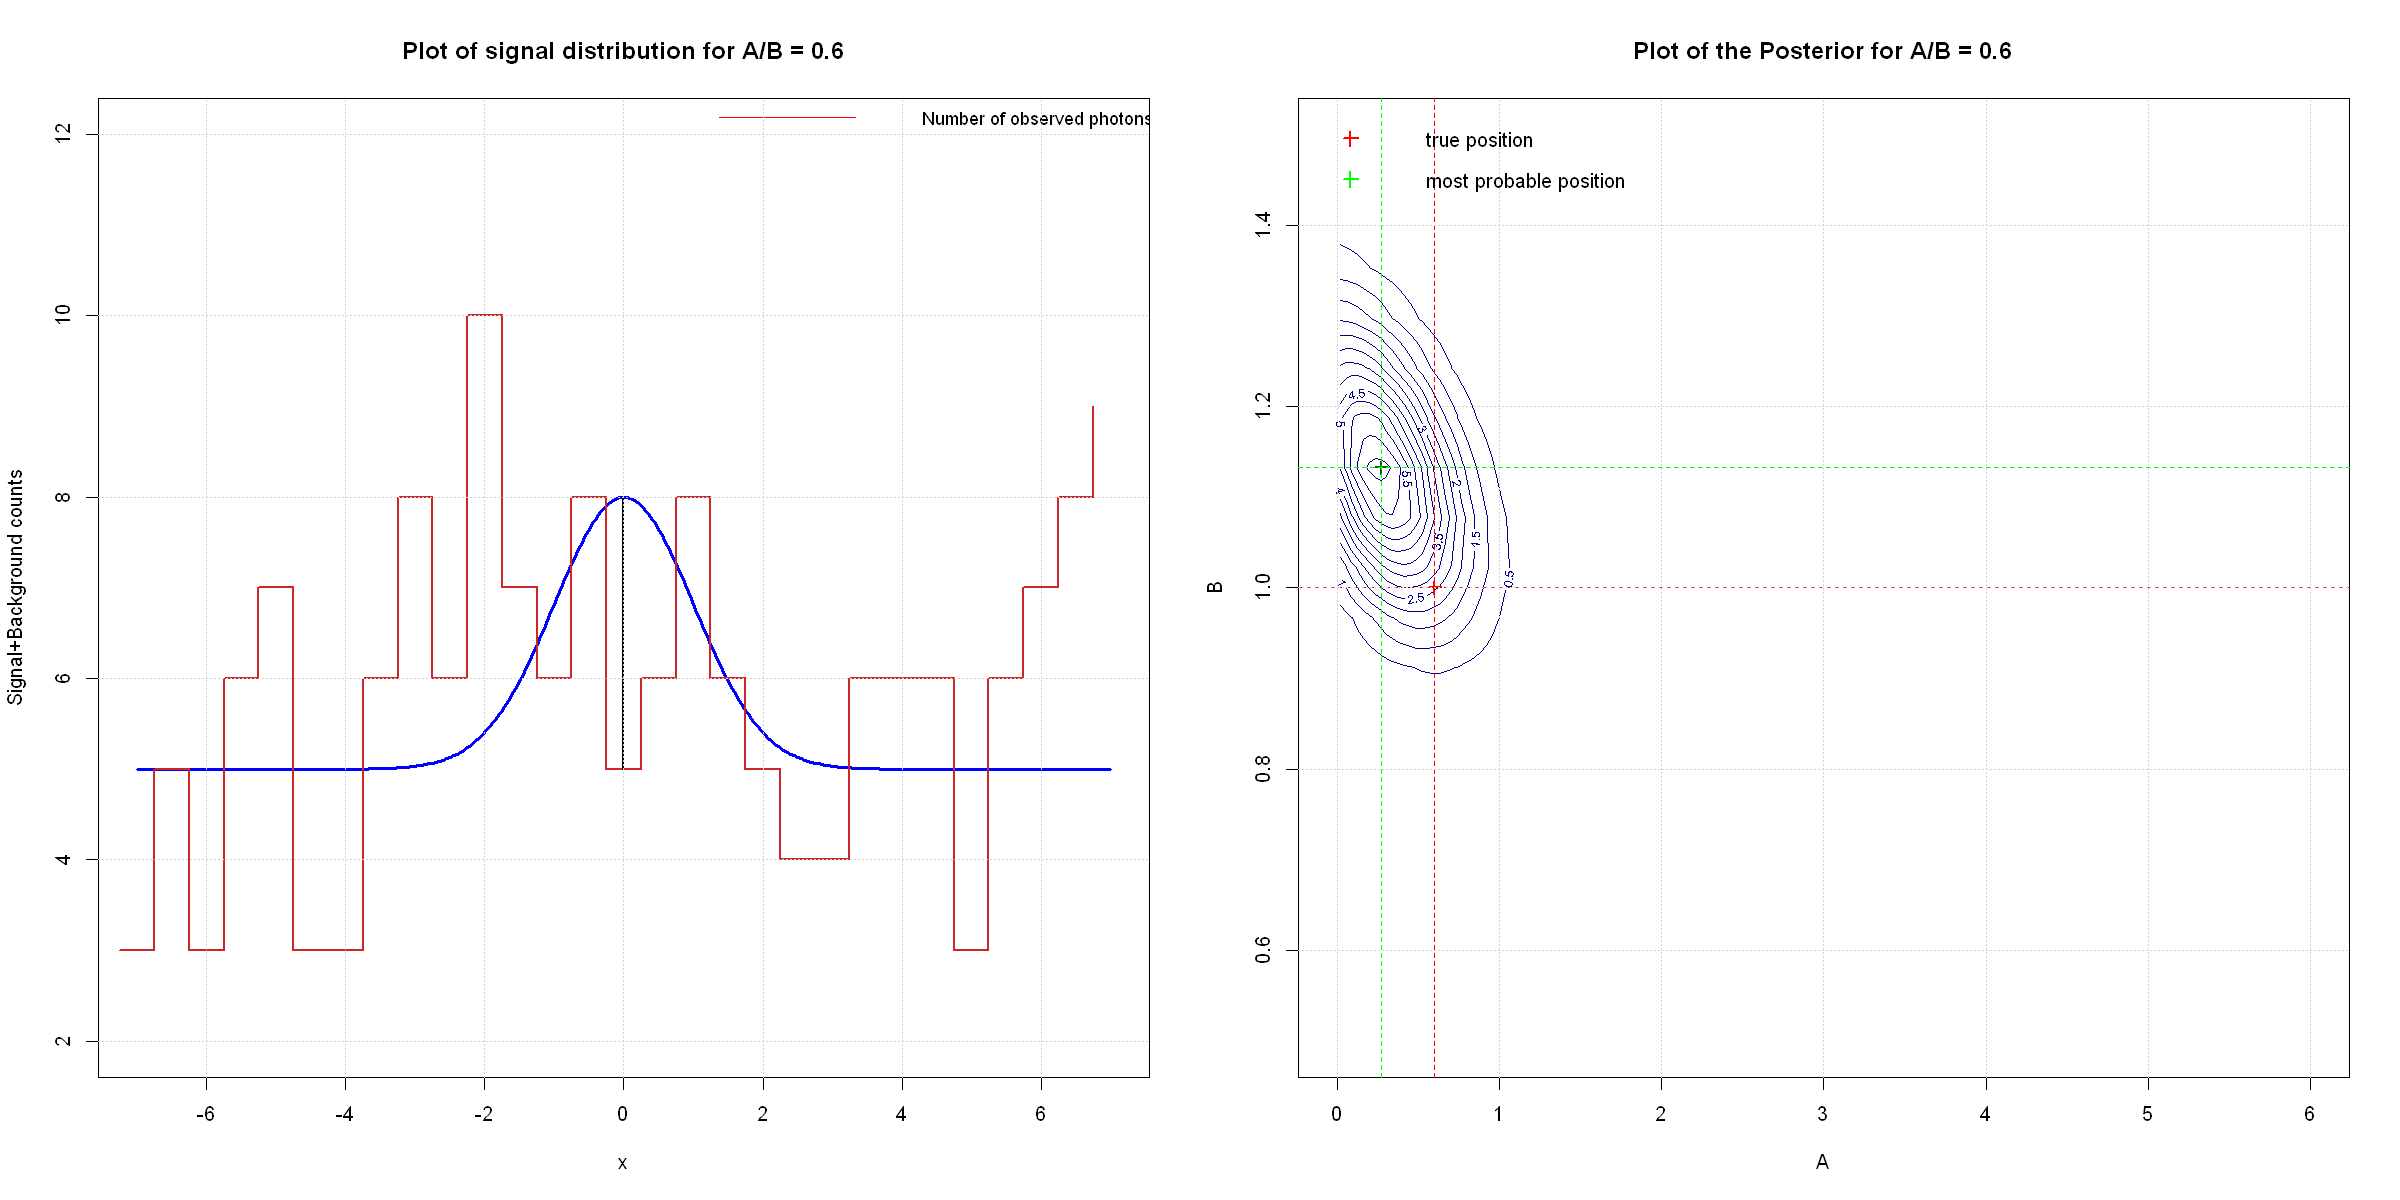

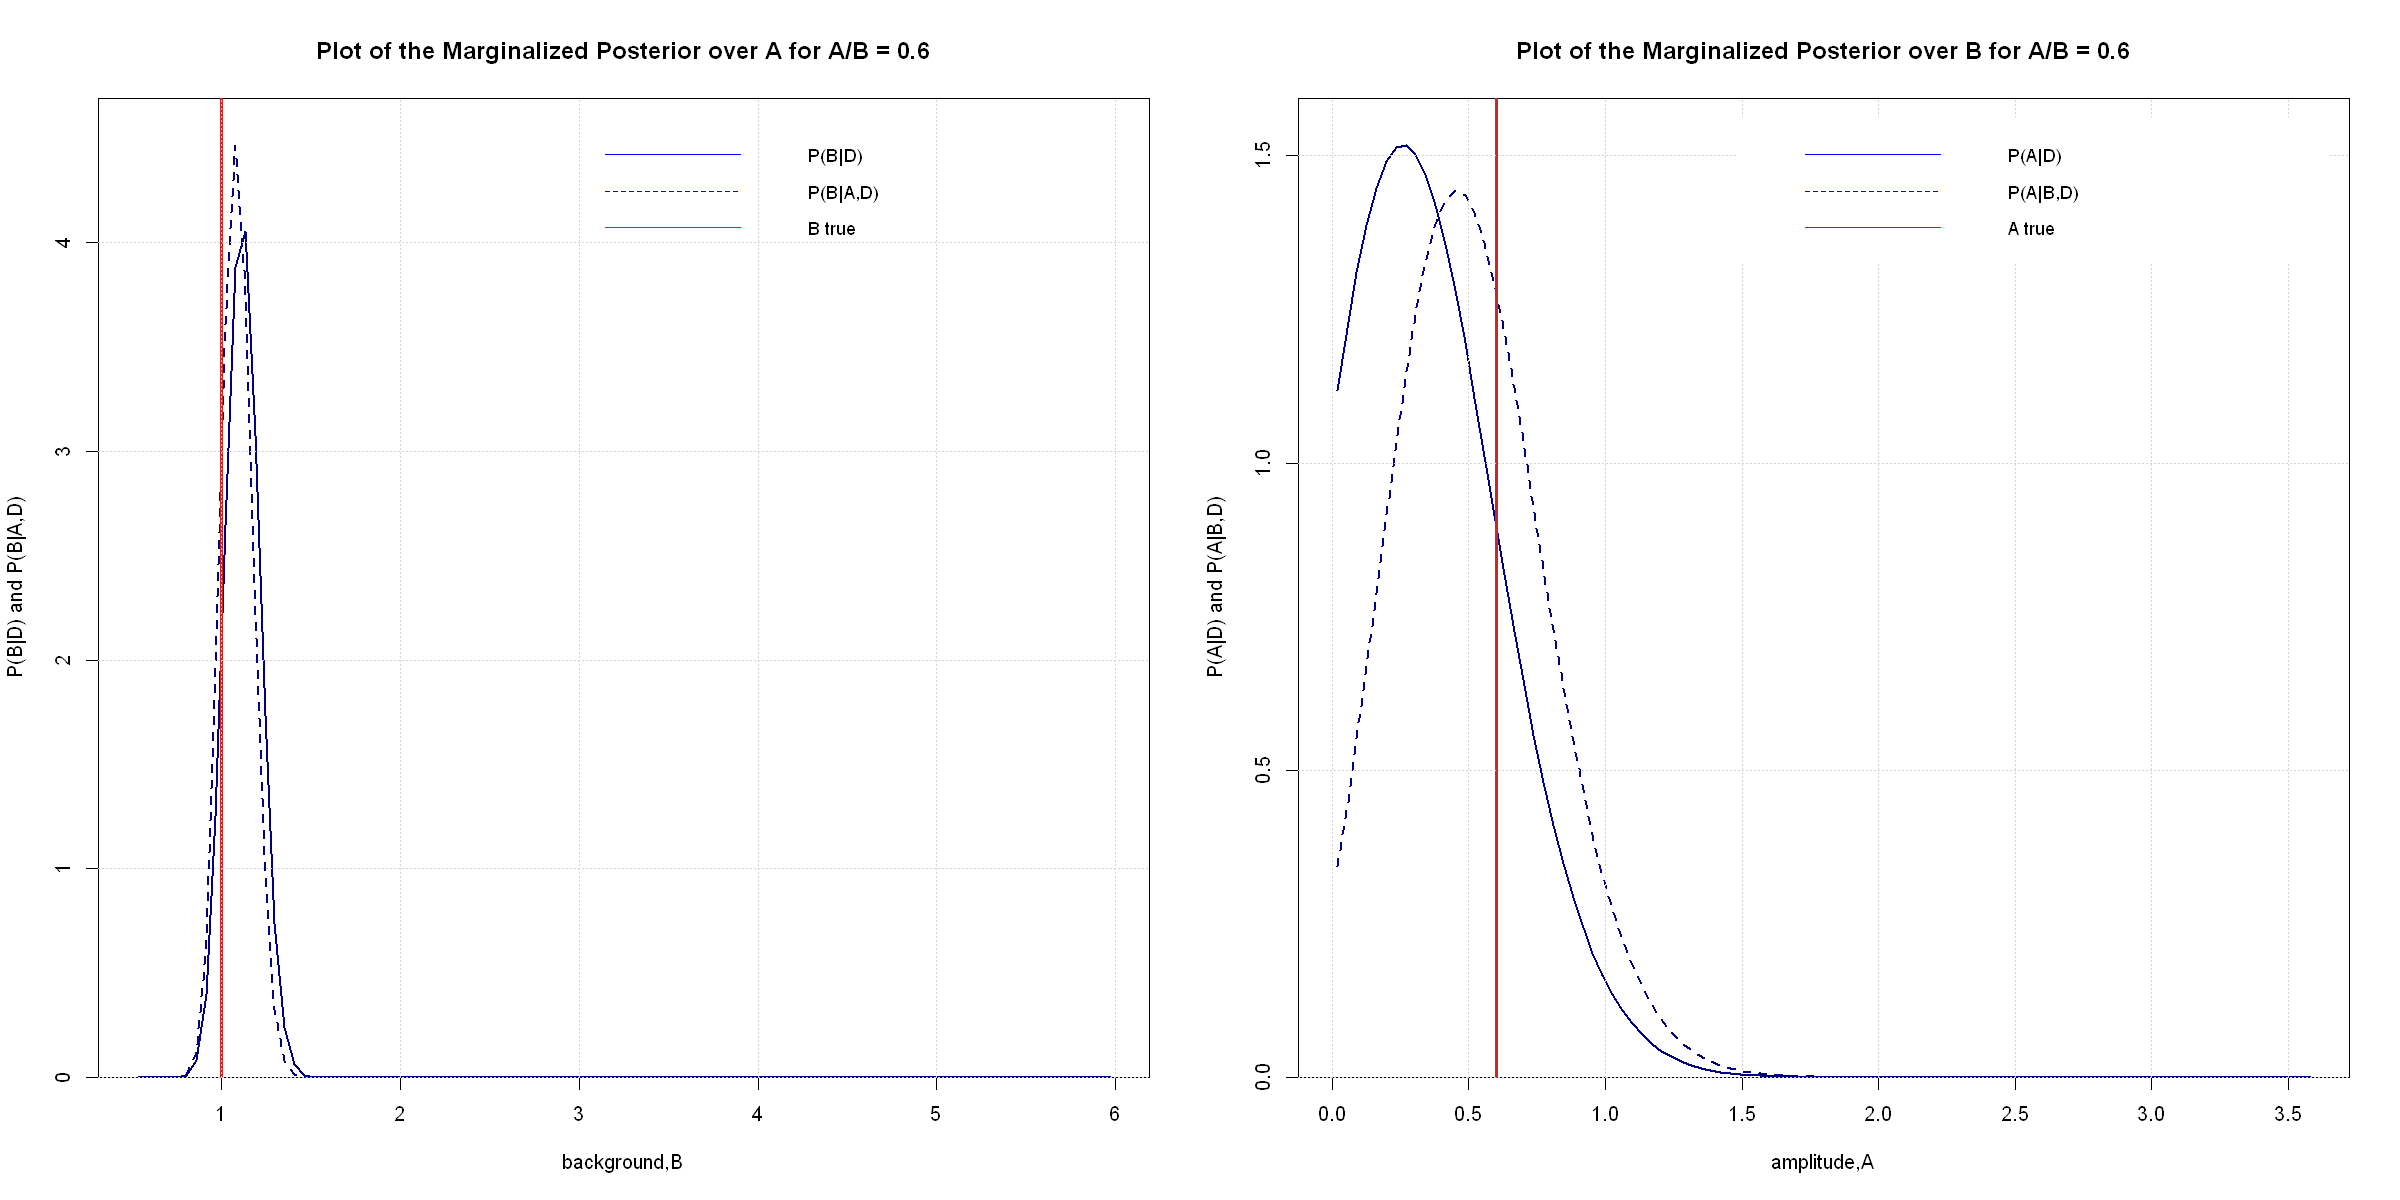

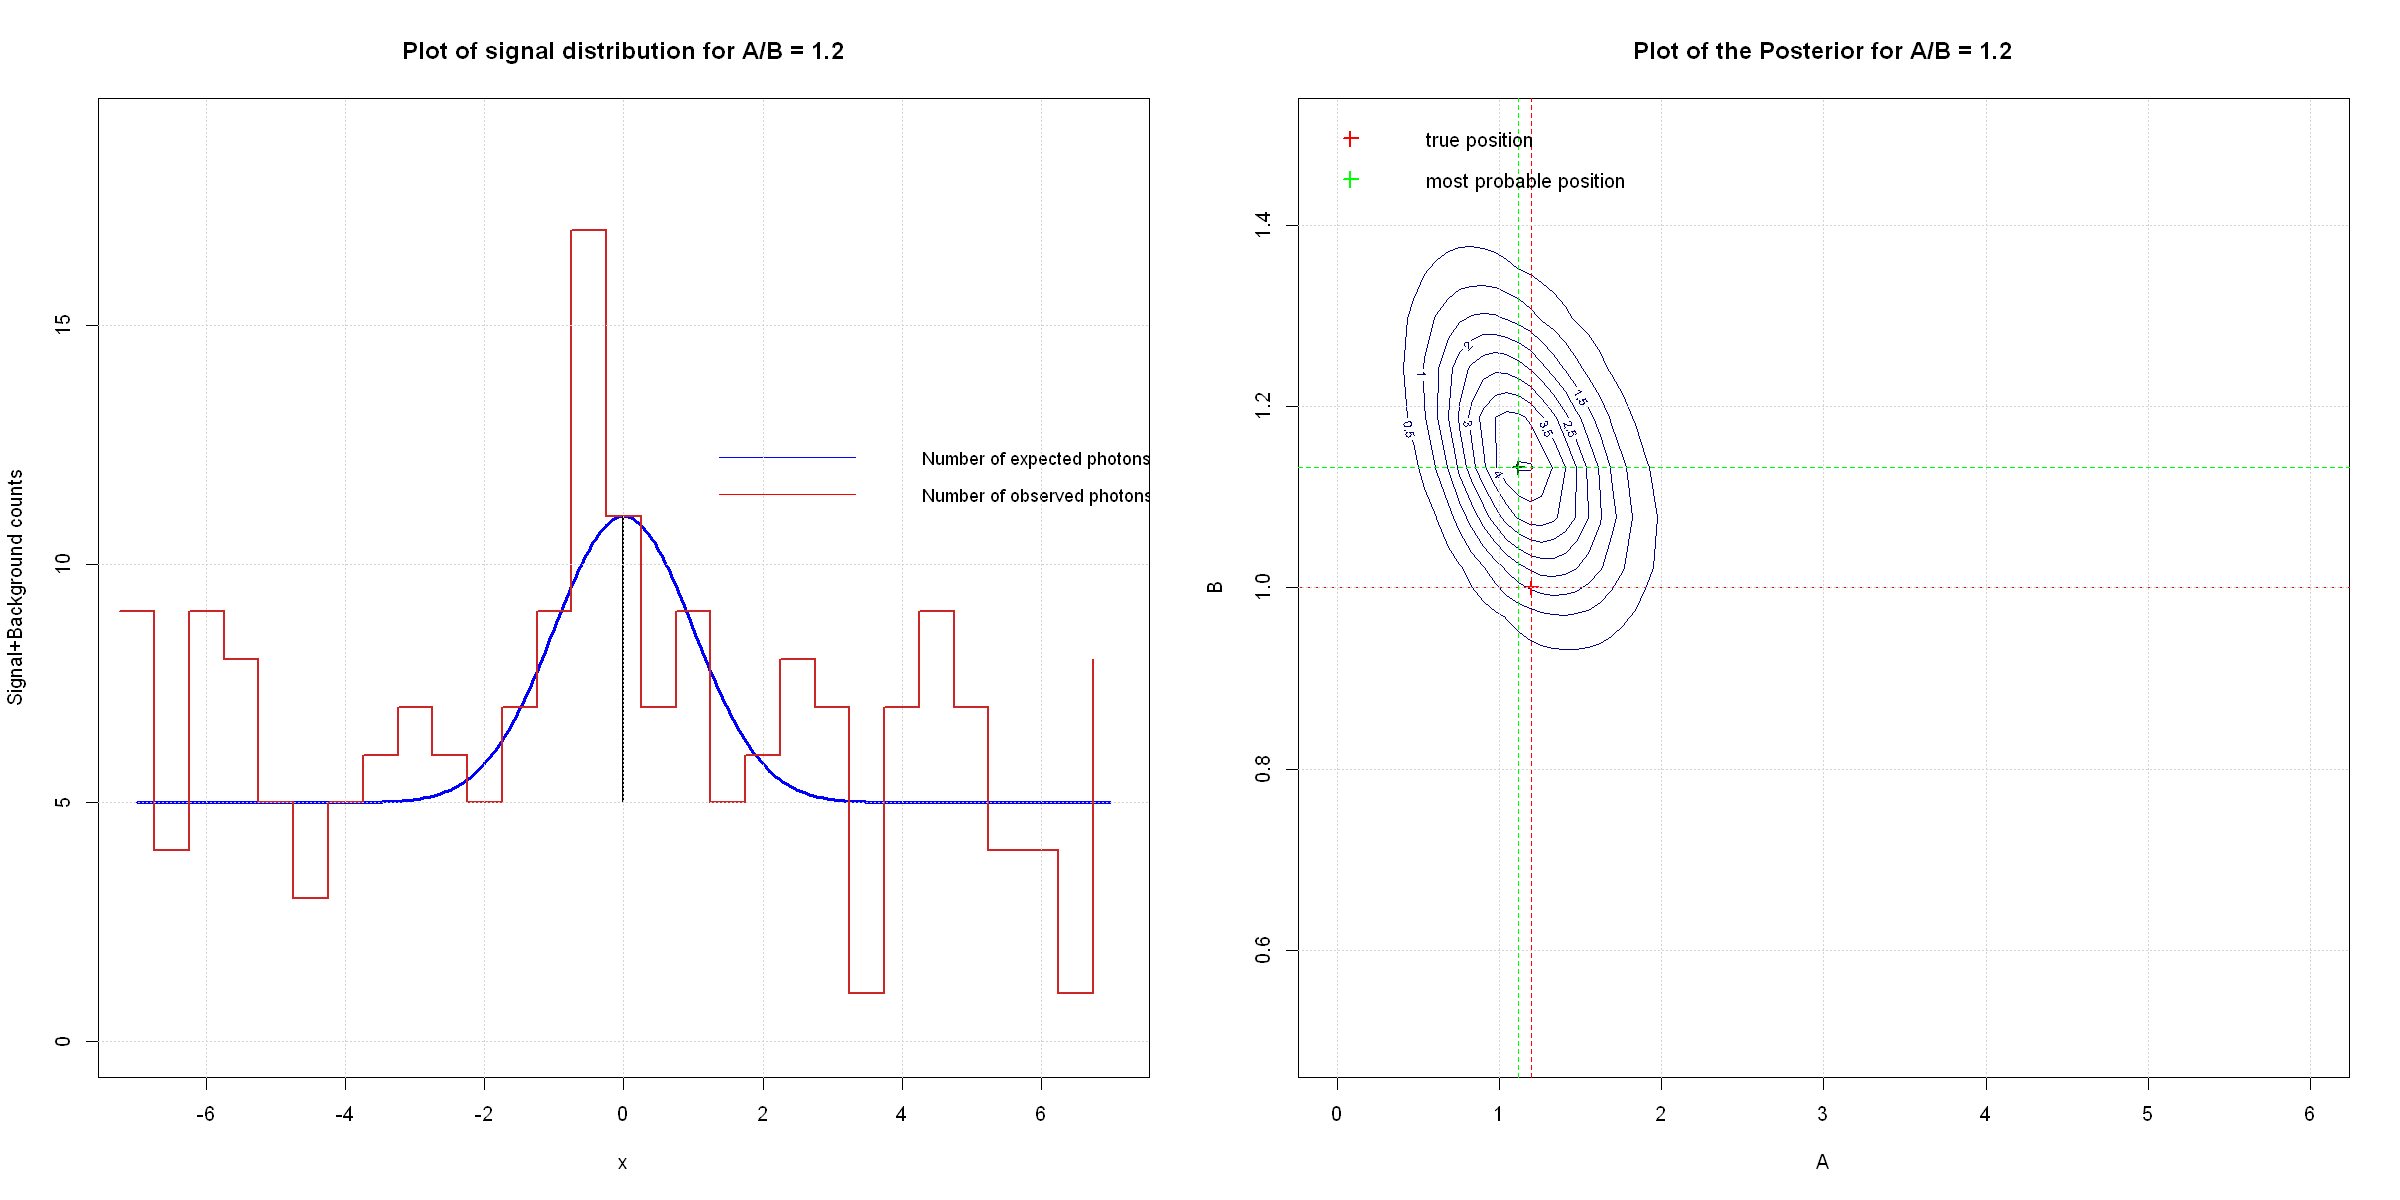

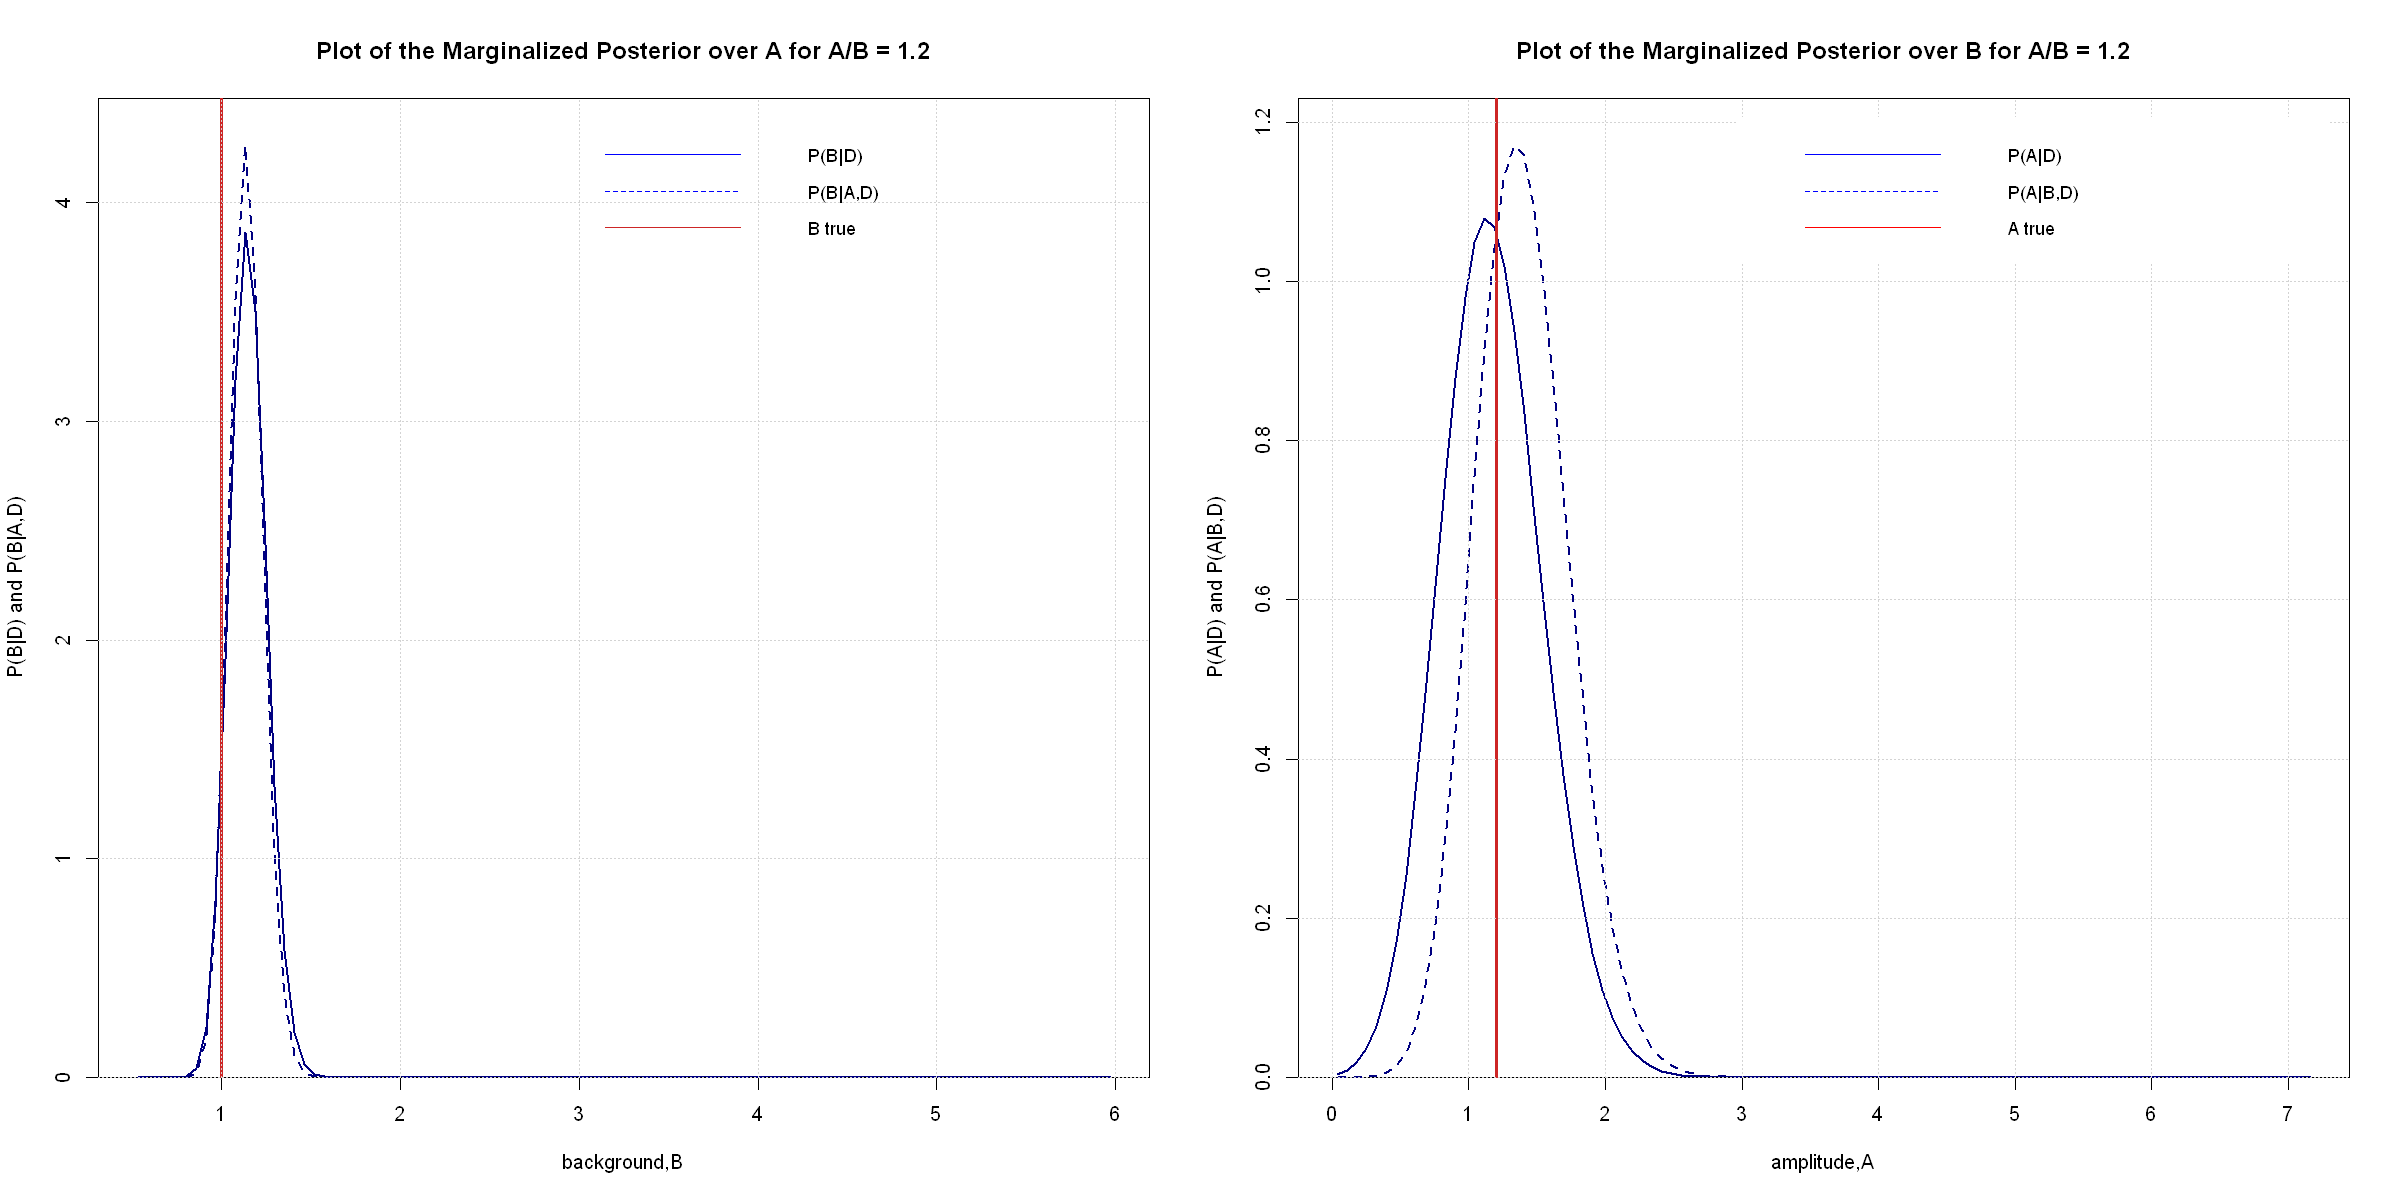

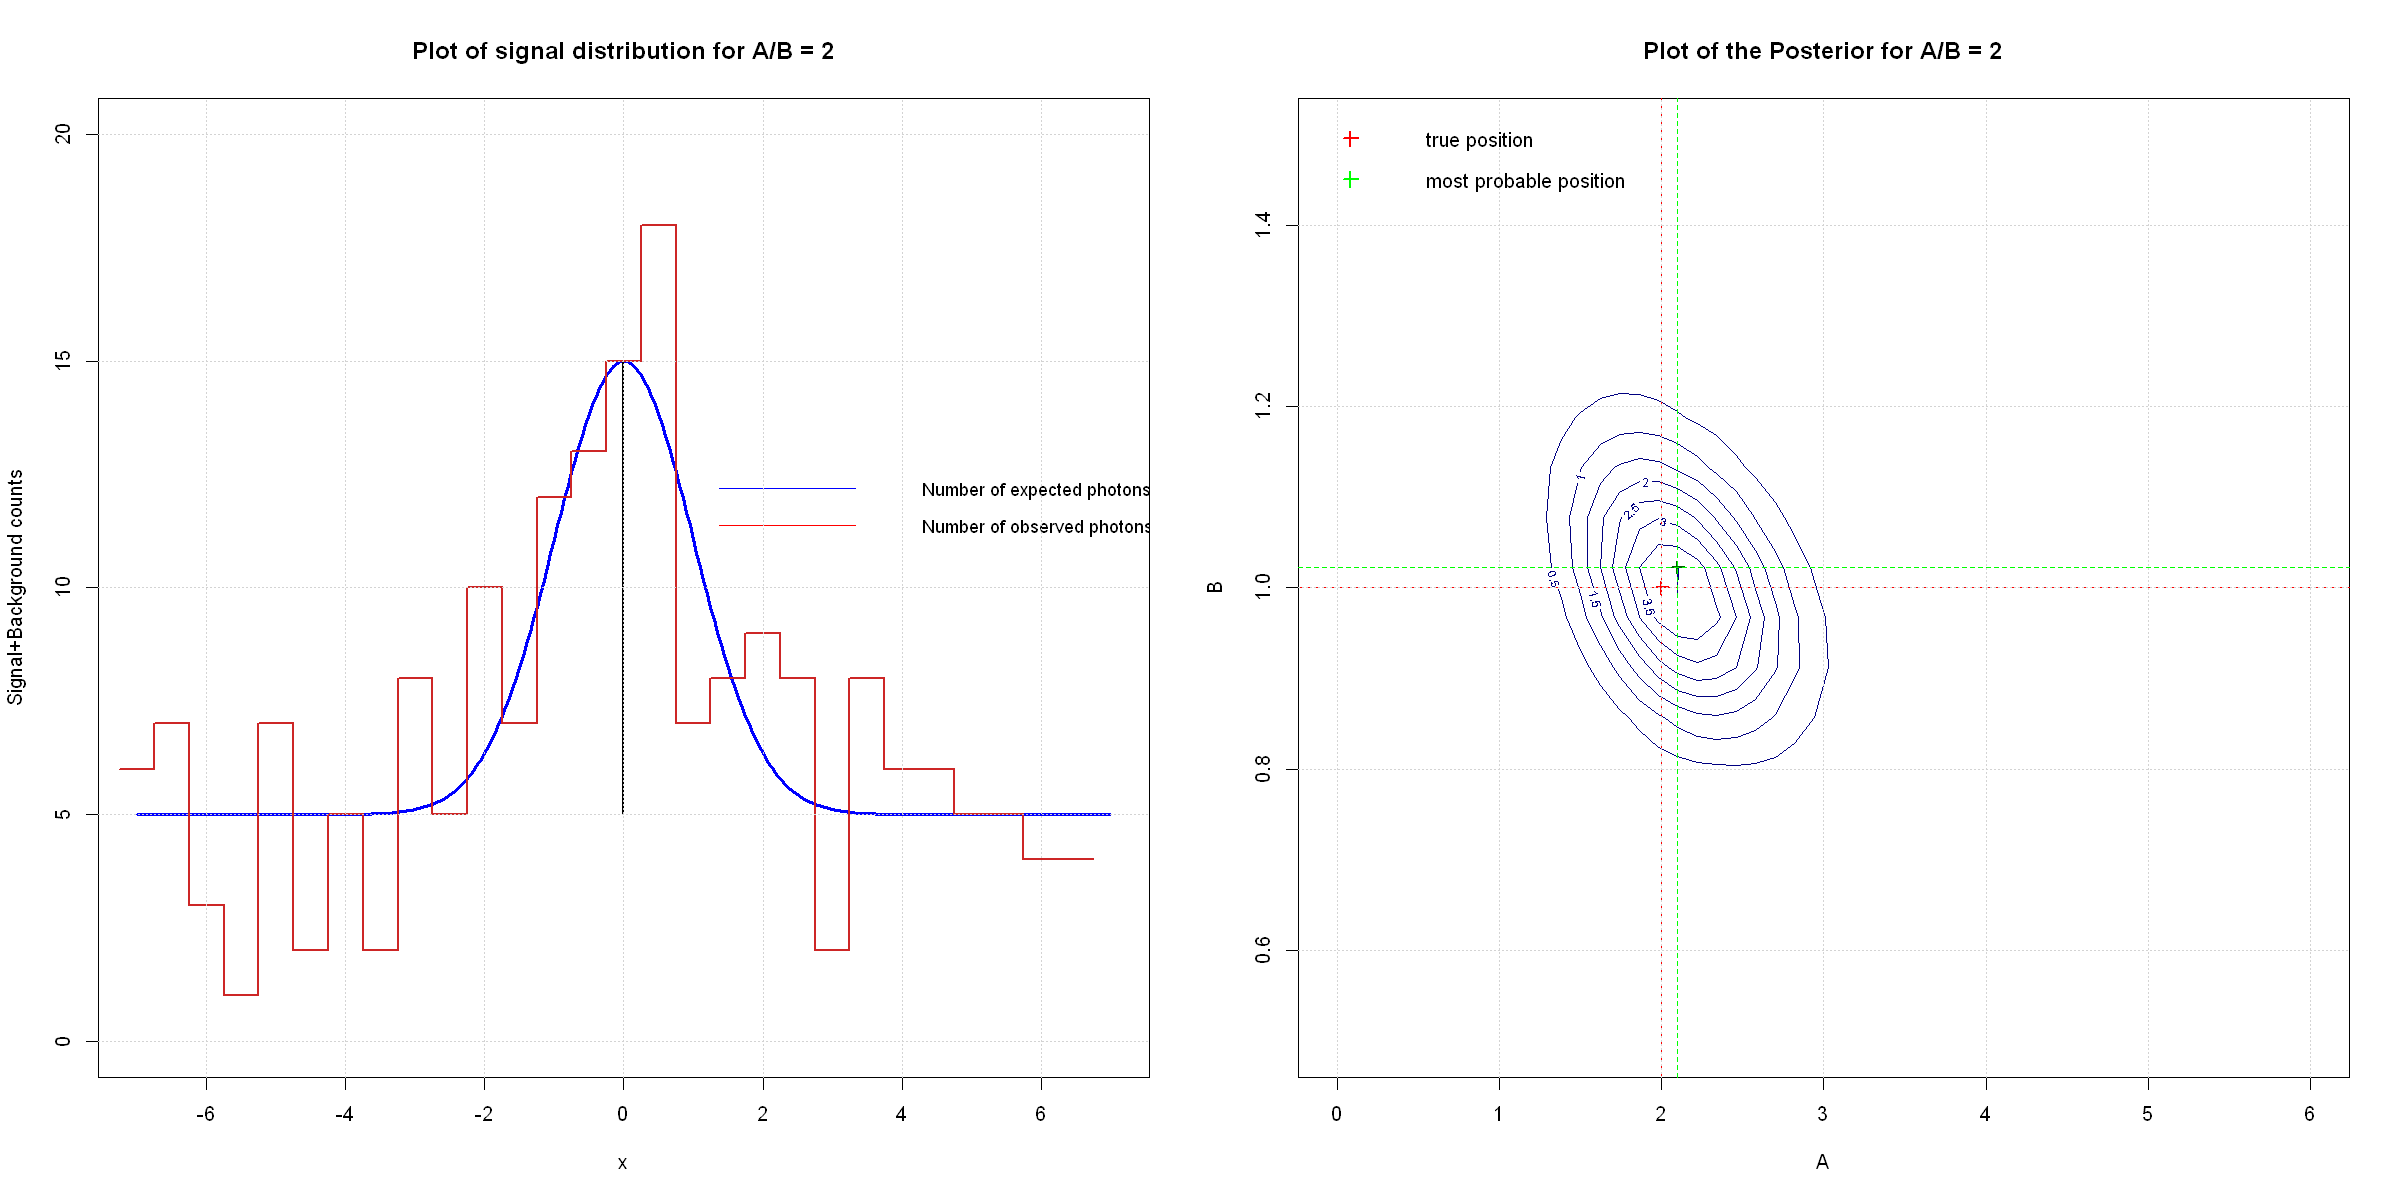

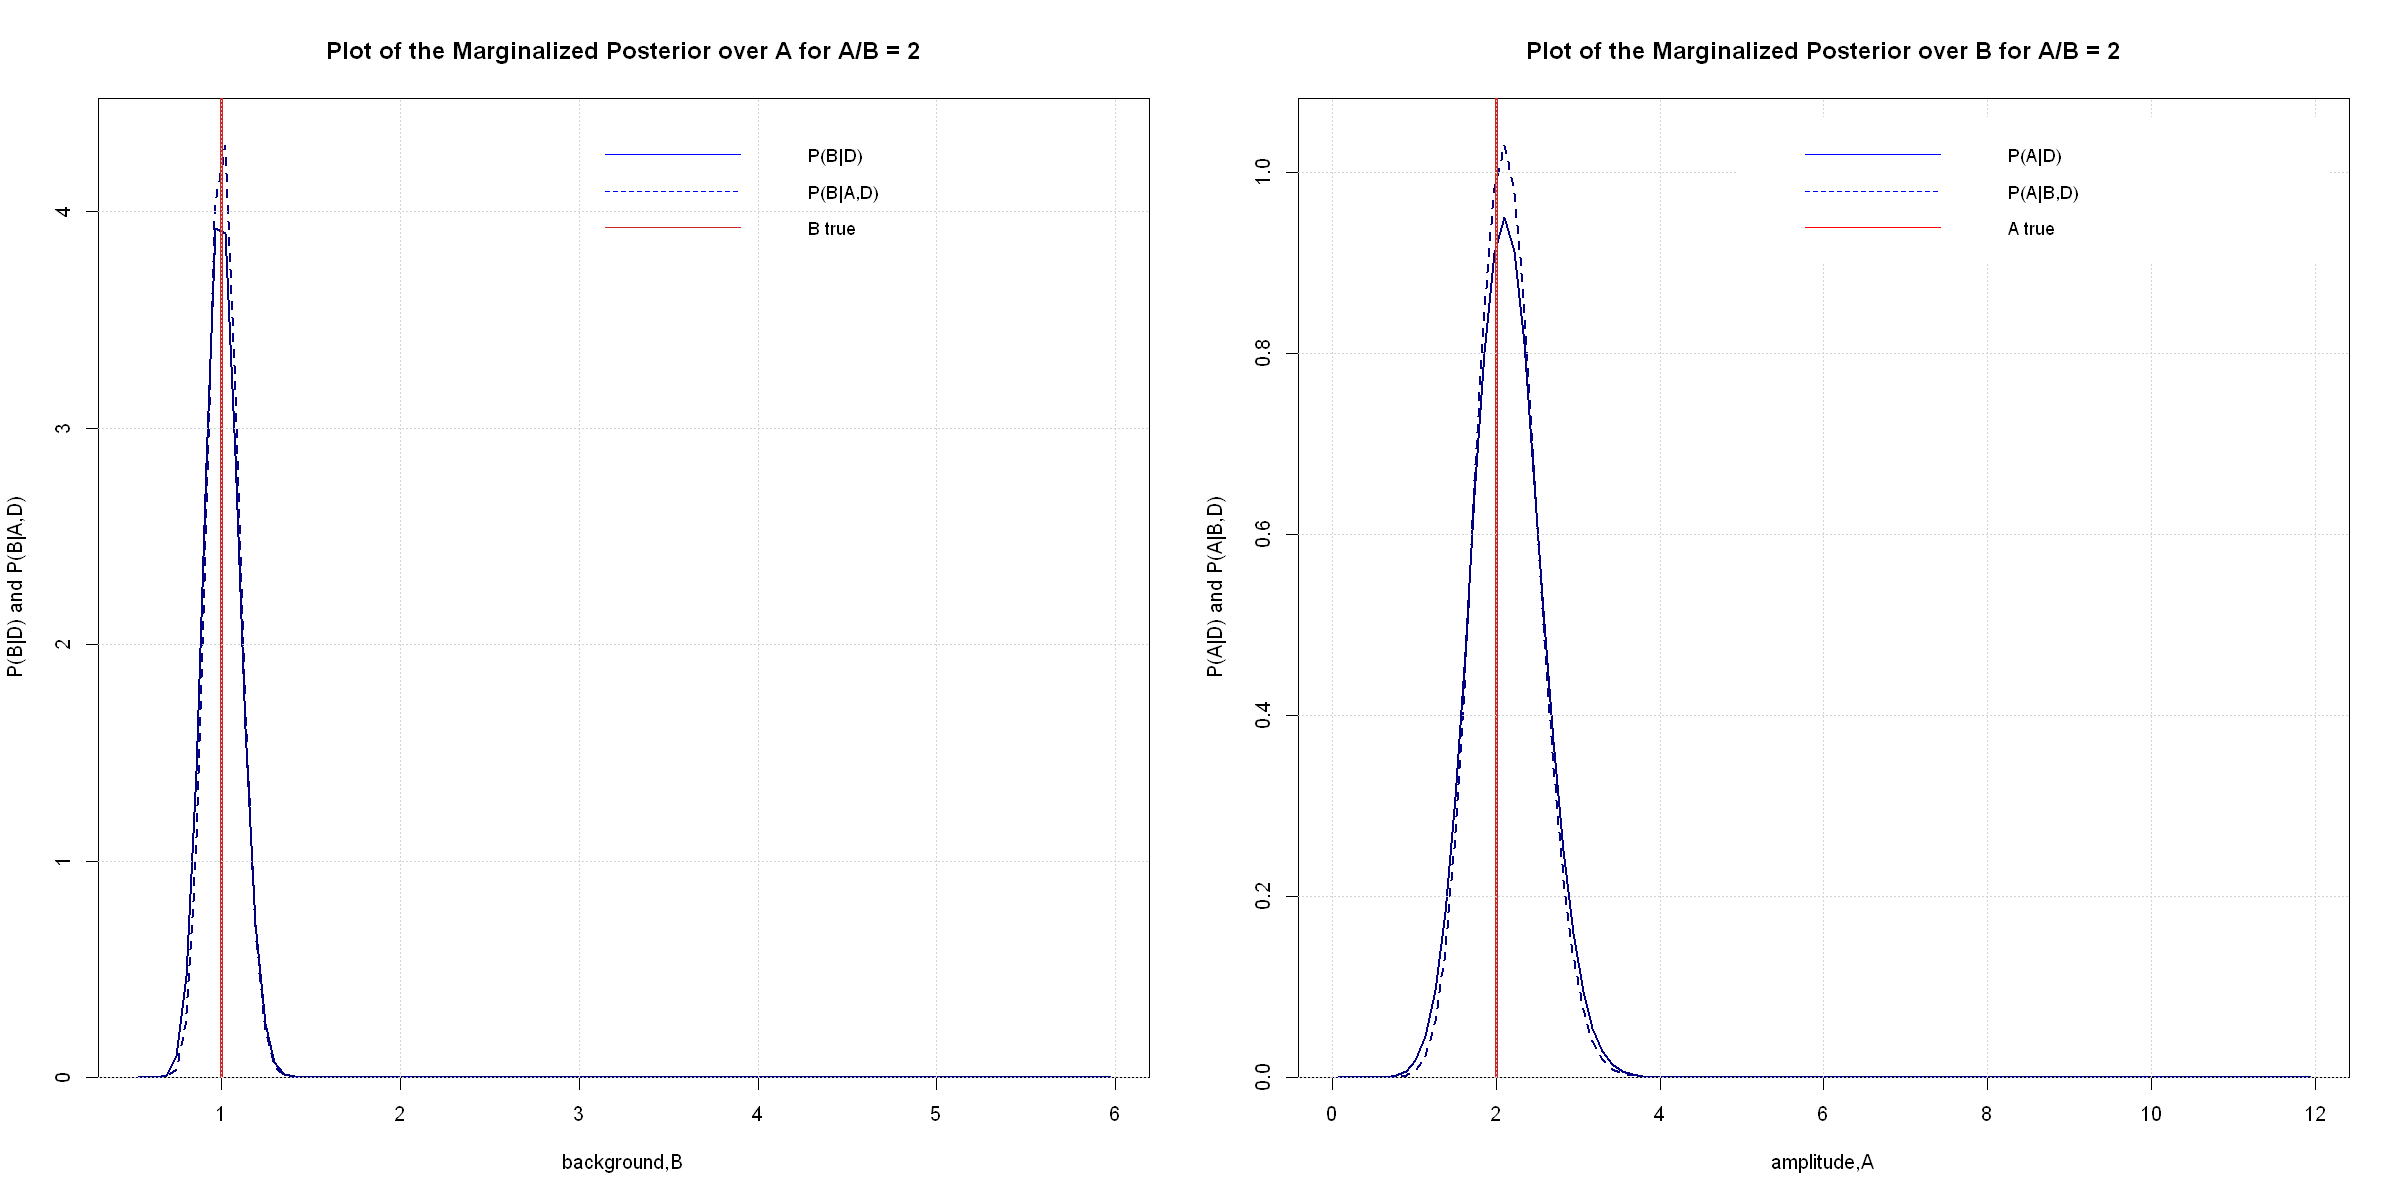

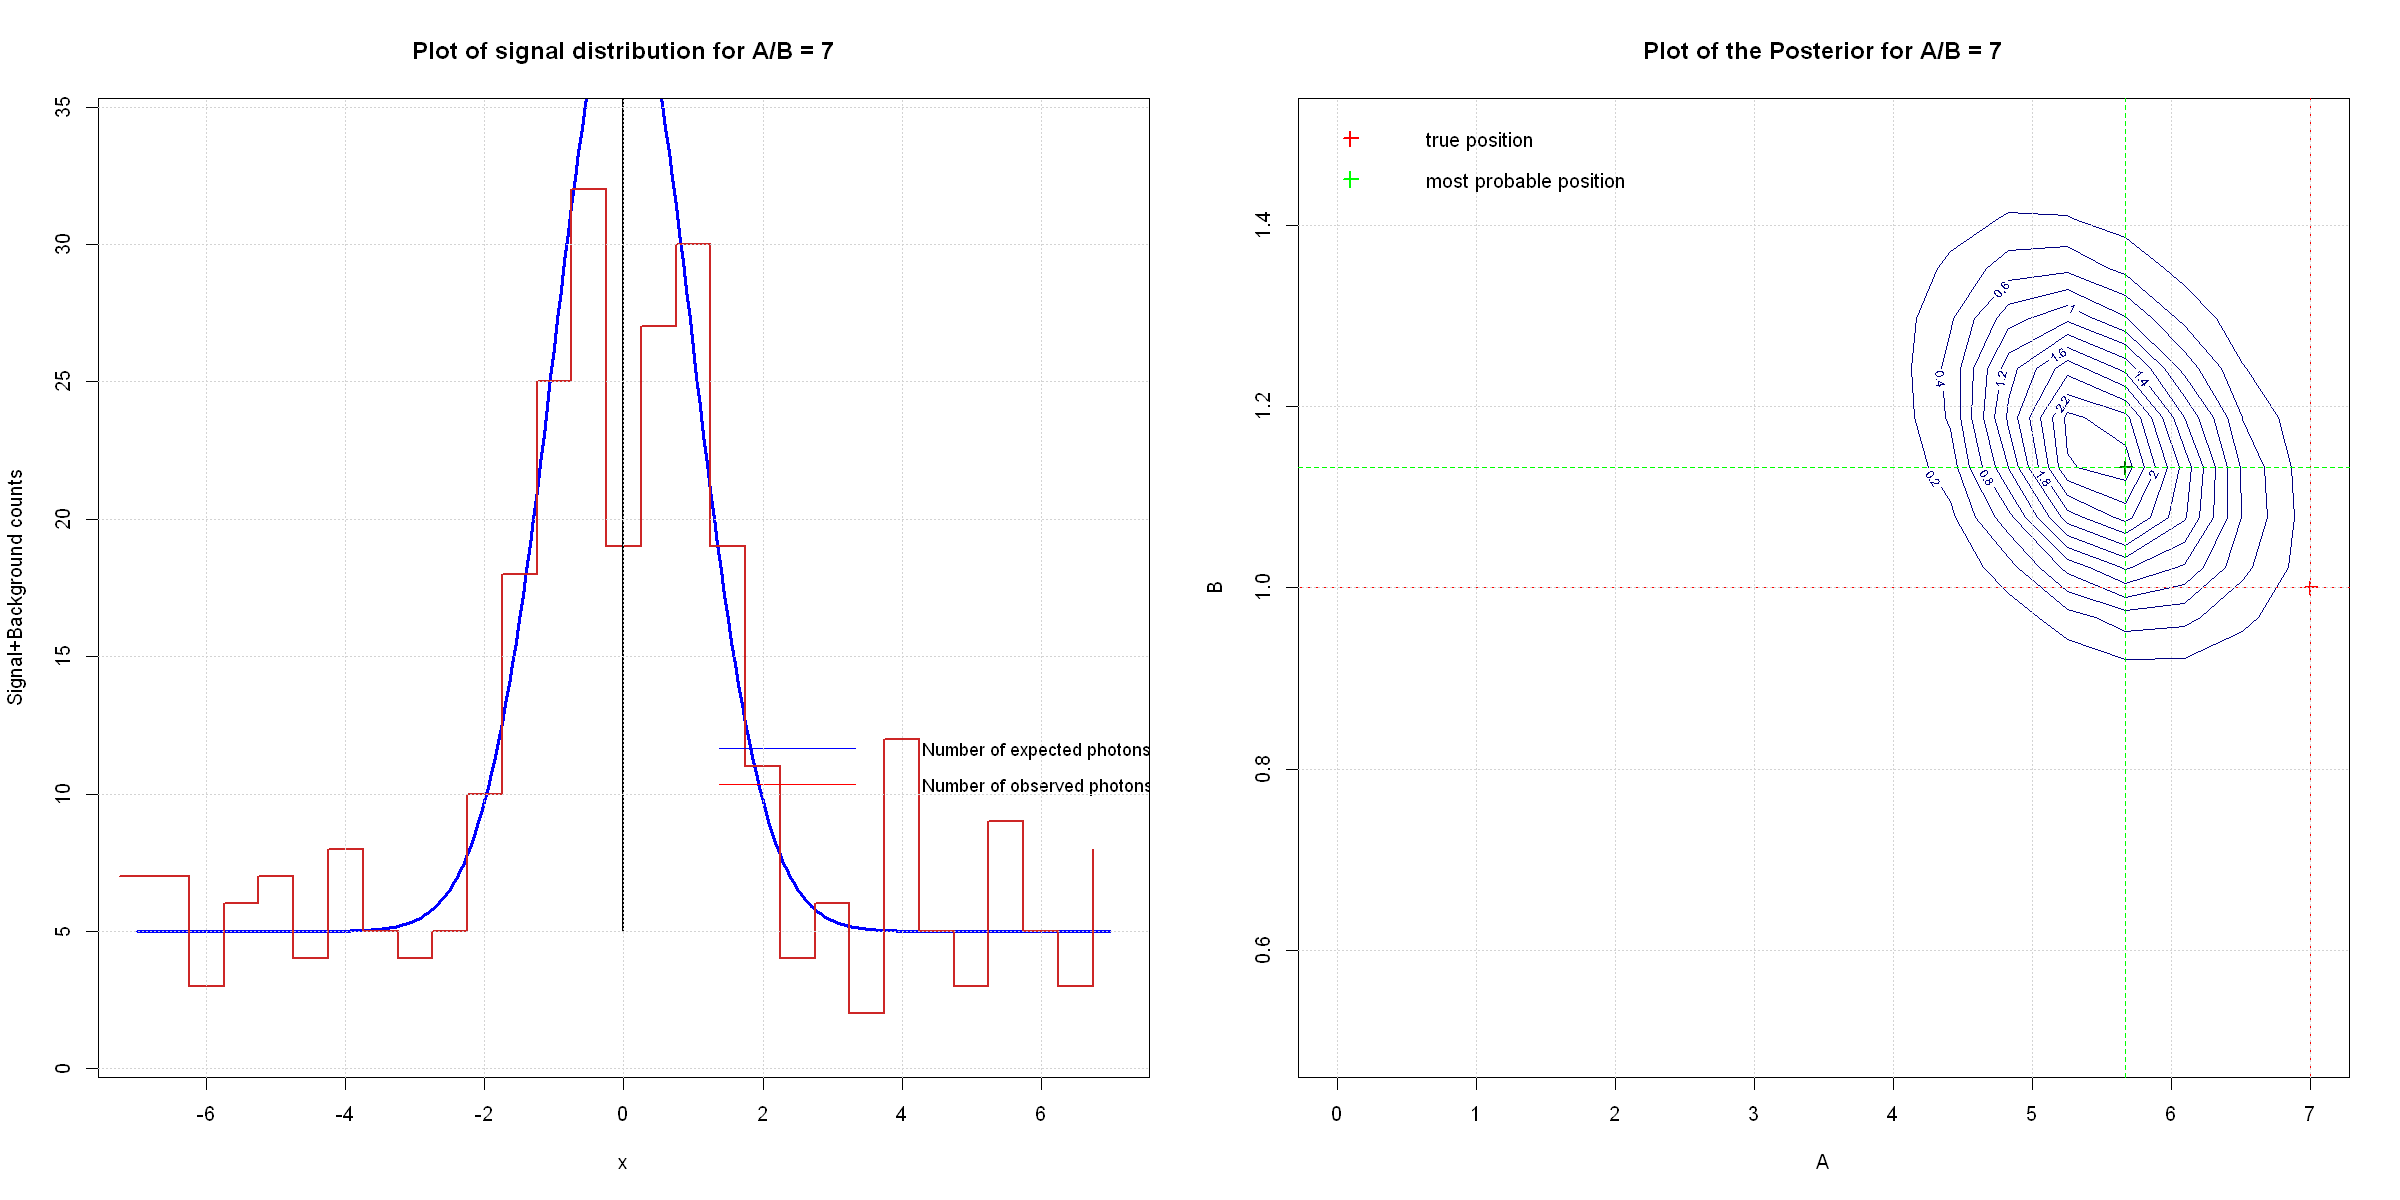

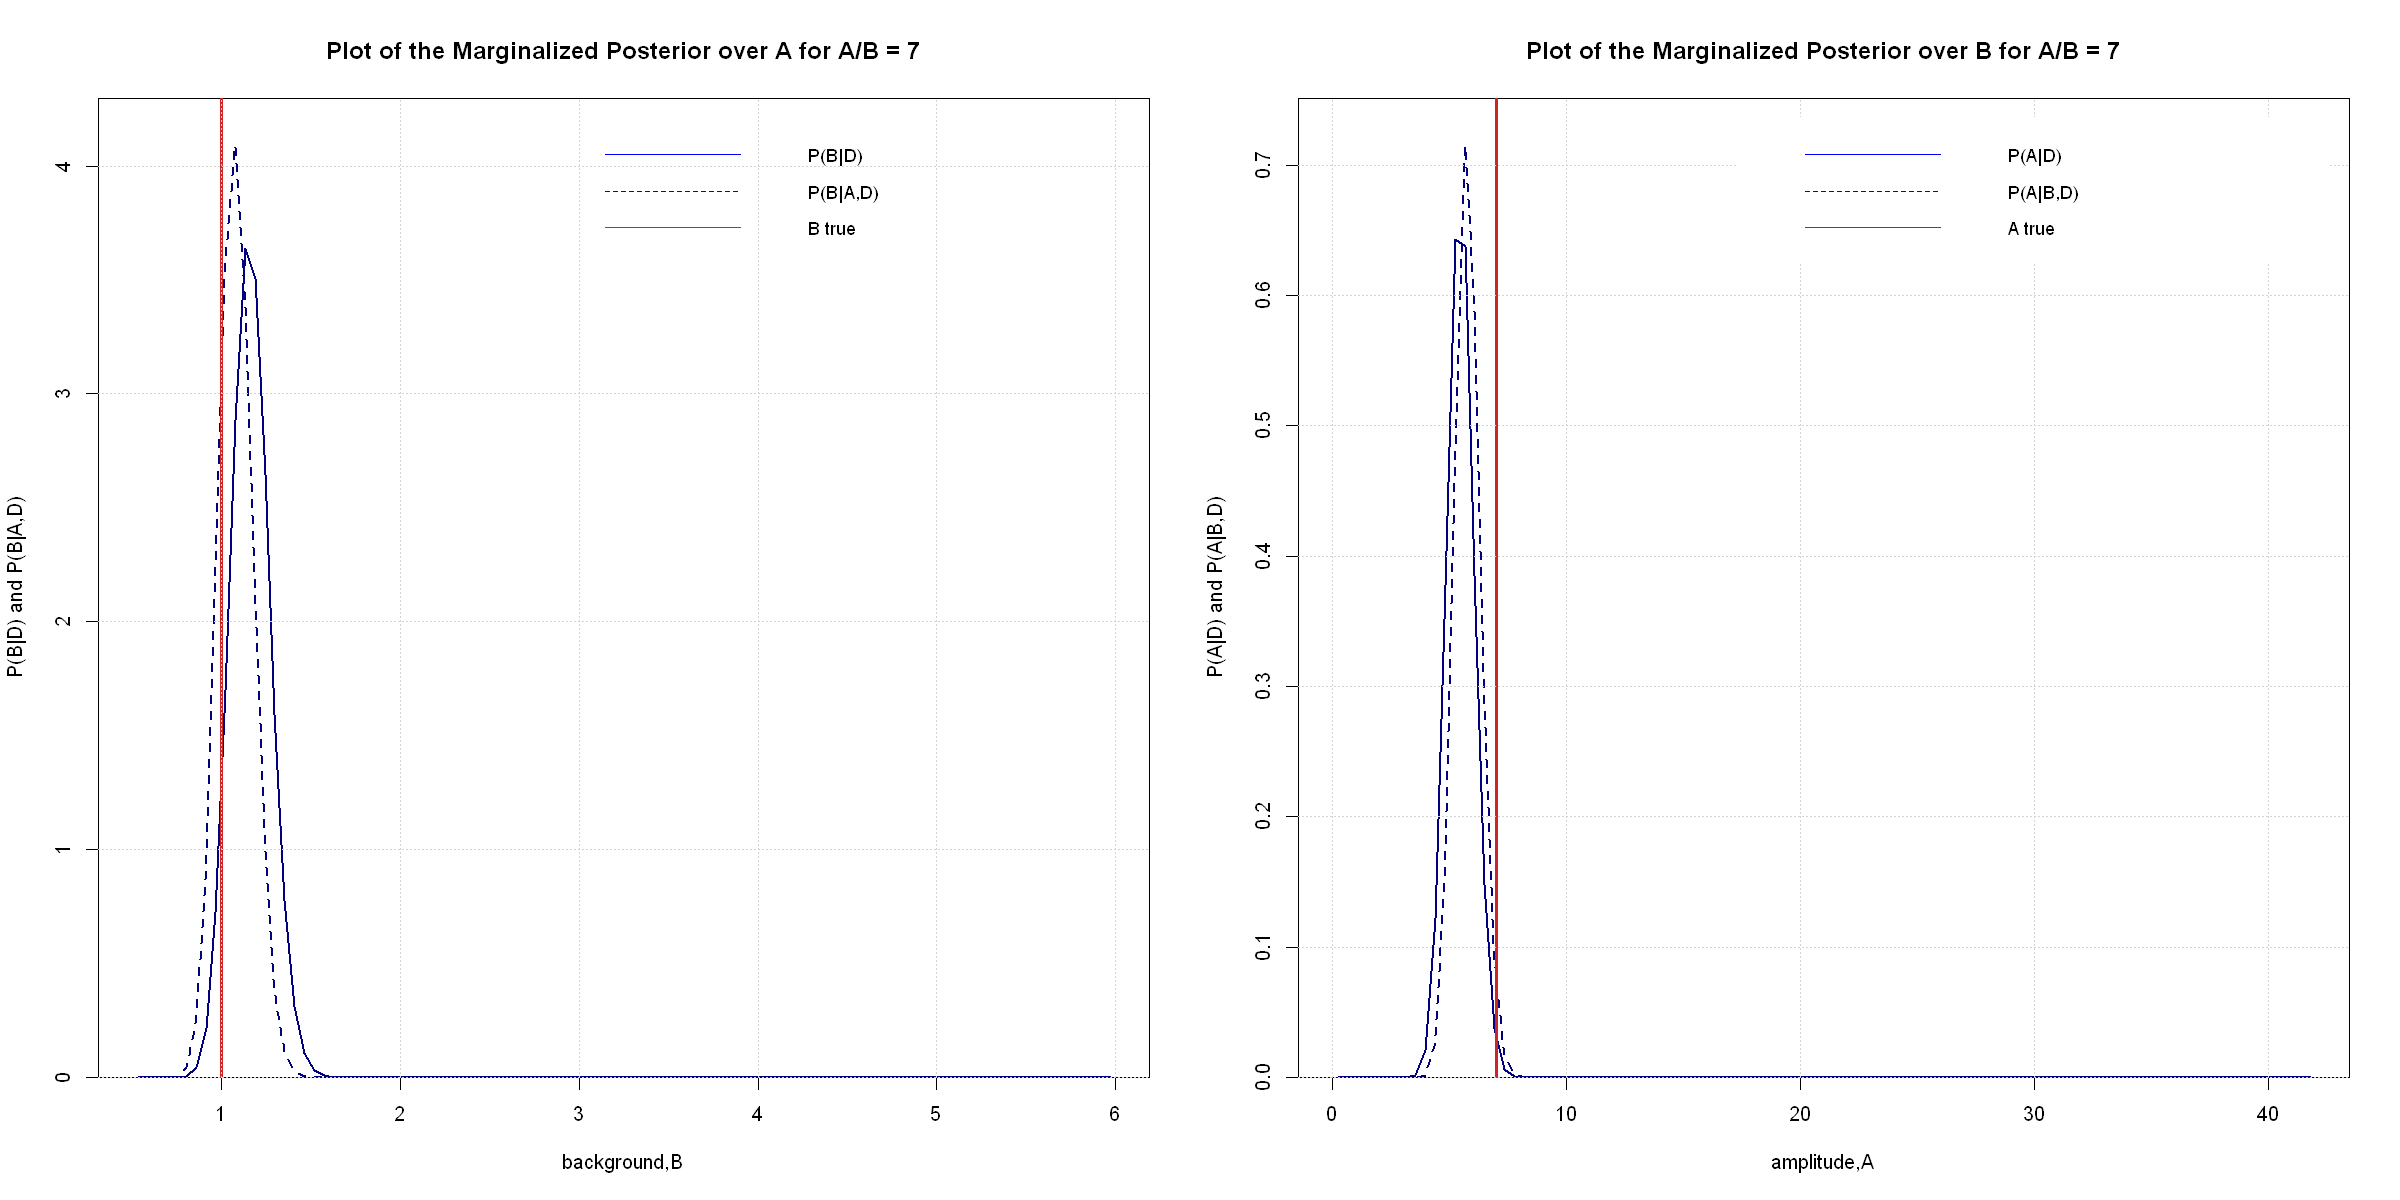

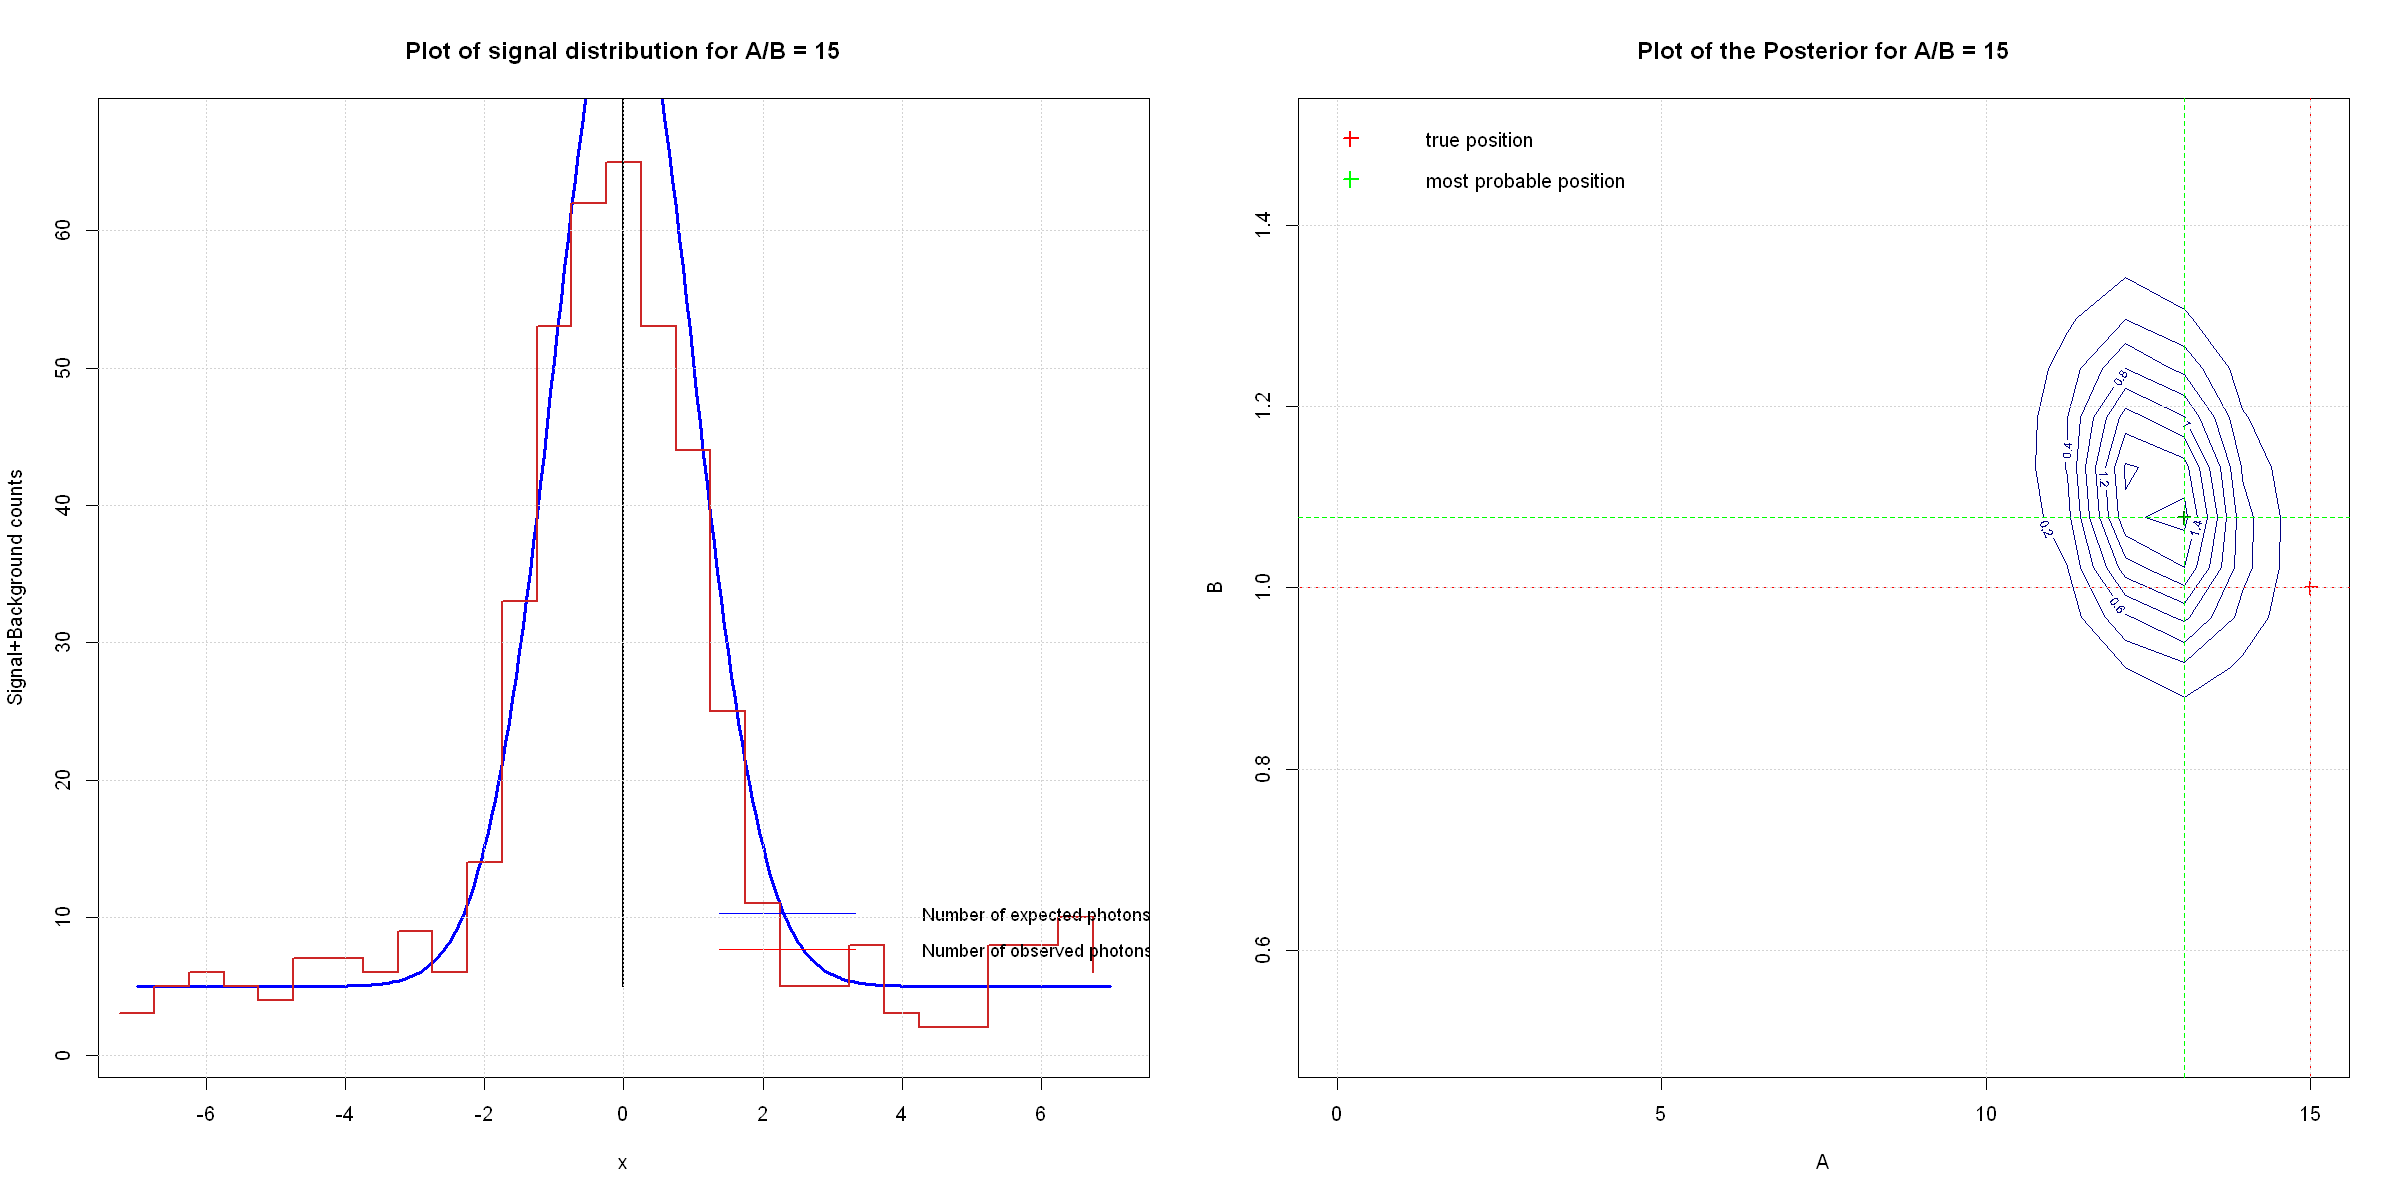

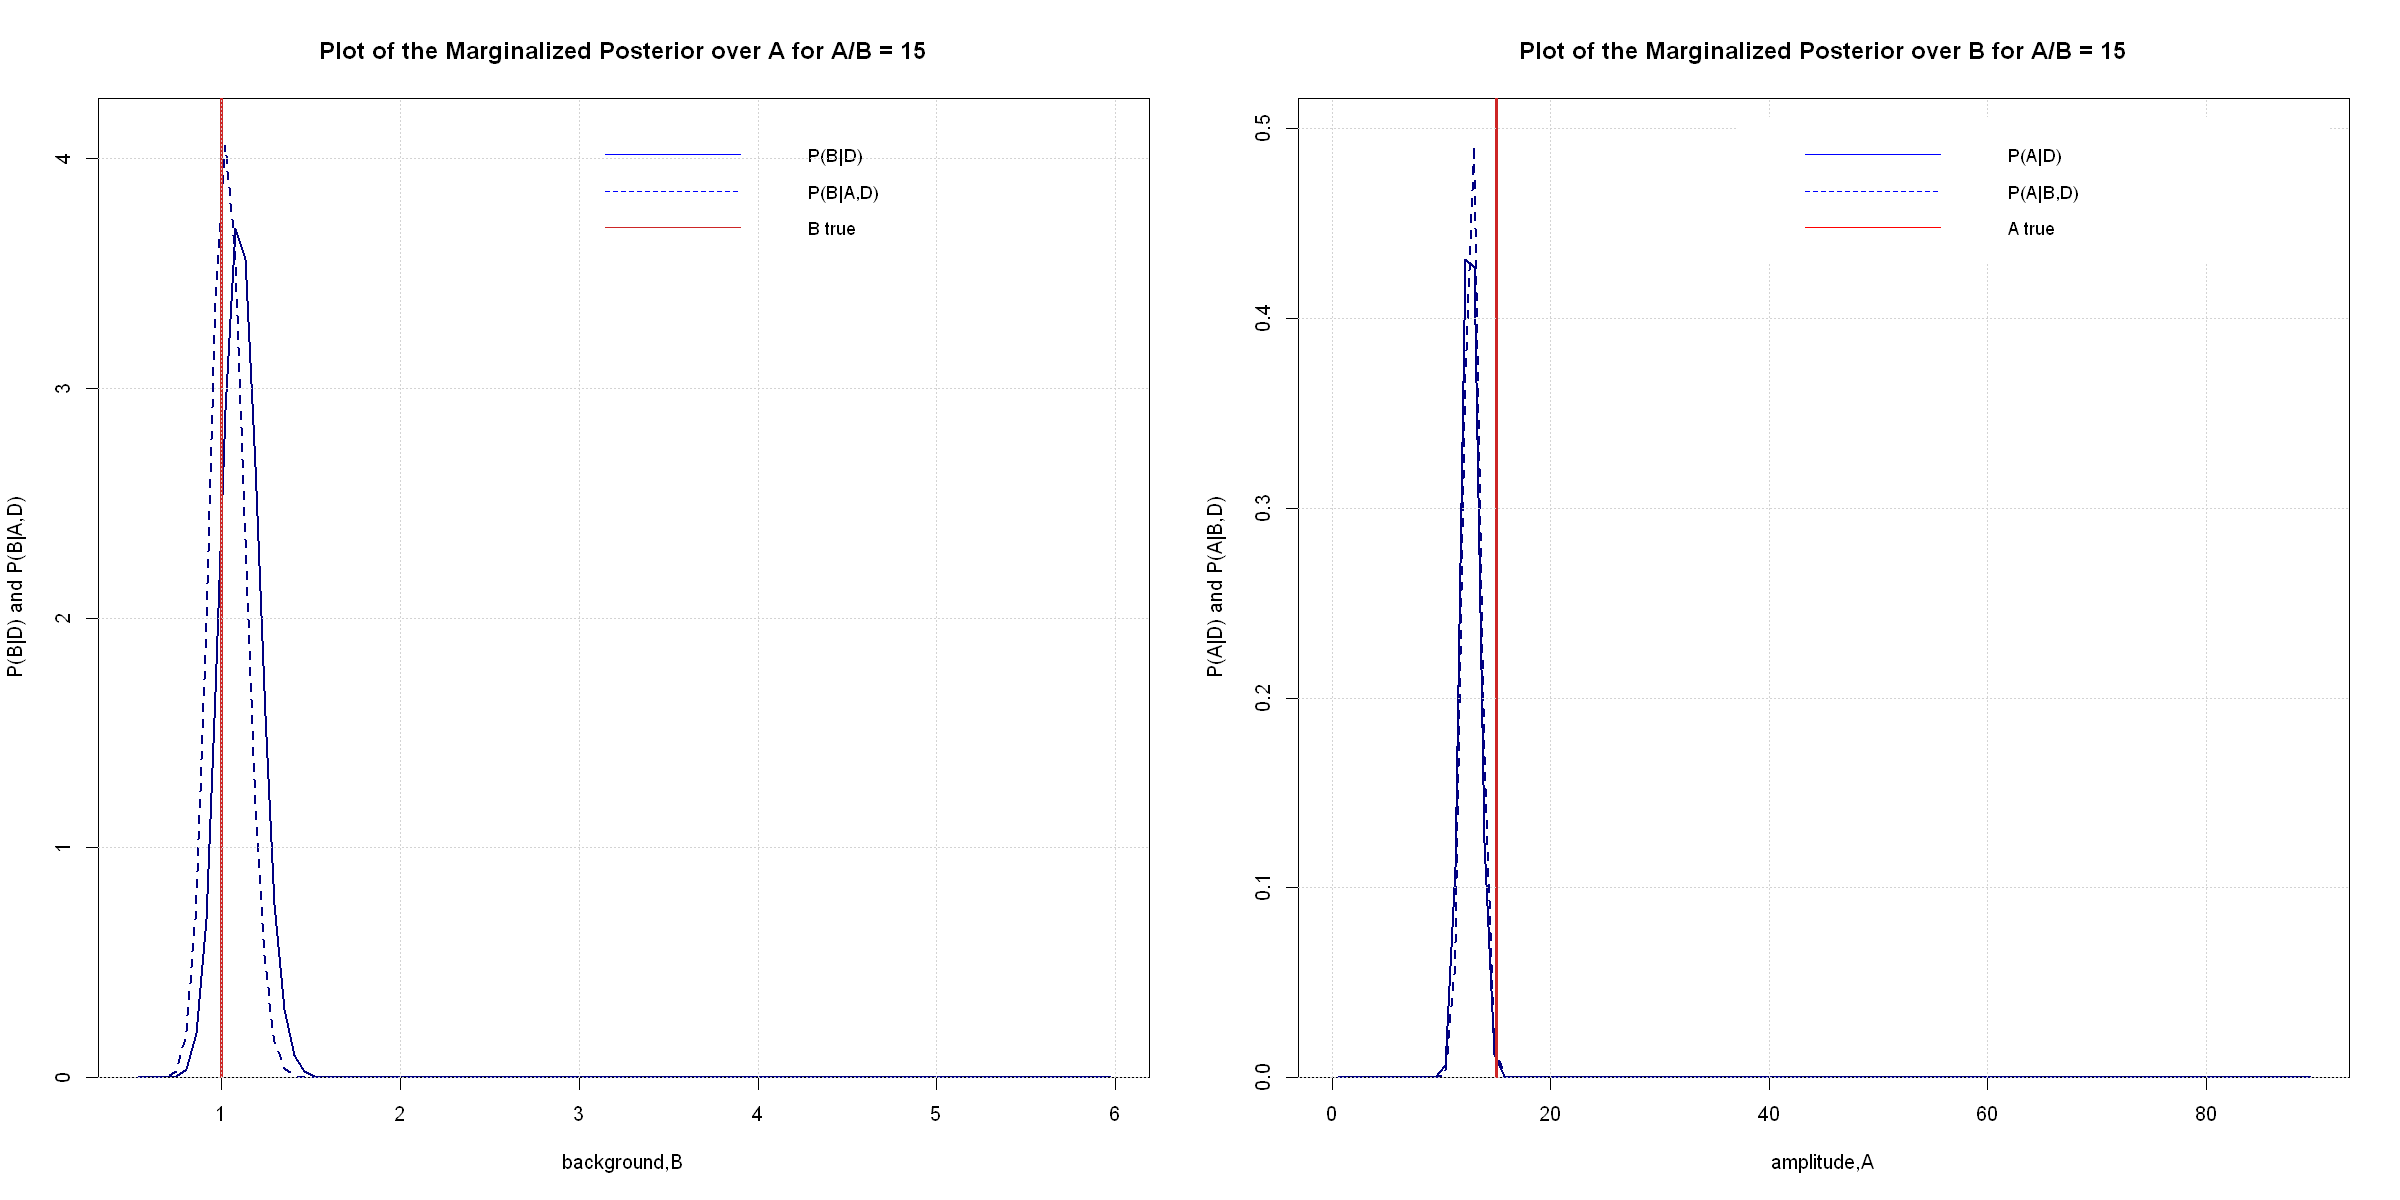

In [28]:
#(b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)





par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)
# Generative model 
signal <- Vectorize( function(x, A, B, x0, w, t) { 
            dt * (A*exp(-(x-x0)^2/(2*w^2)) + B)
          } )
# Log posterior
log.post <- function(data, x, A, B, x0, w, dt) {
            if(A<0 || B <0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, A, B, x0, w, dt), log=TRUE))
            }
# Vary the ratio A/B
ratio.set <- c(0.6,1.2,2,7,15)

A.list <- c(NULL)
B.list <- c(NULL)
A.true.list <- c(NULL)
B.true.list <- c(NULL)

for(r in ratio.set){

    # Define the model parameters
    B.true <- 1        # Background amplitude (unkown)
    A.true <- r*B.true # Signal amplitude (unkown)
    dt <- 5            # Exposure time 
    x0 <- 0            # Signal peak
    w <- 1             # Signal width
    
    A.true.list <- c(A.true.list,A.true)
    B.true.list <- c(B.true.list,B.true)
    
    # Generate the number of observed photons
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
    ddat <- rpois(length(s.true), s.true)
    
    # Plot the number of expected photons (not integer)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, dt) 
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
         type='l',lty=1, lwd=3, col='blue', ylim=c(min(ddat)-1,max(ddat)+2),
         main=paste("Plot of signal distribution for A/B =",r))
    # Plot the number of observed photons (integer) 
    xdat.off <- xdat - 0.25 # Remove offset of the bin width
    lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
    legend(0.4,13,inset=0.01,c("Number of expected photons","Number of observed photons"), 
          col=c("blue","red"), lty=1, cex=0.9,box.lty=0,bty="n")     
    # Plot amplitude
    xp <- c(0,0)
    yp <- c(min(splot),max(splot))
    polygon(x = xp, y = yp, col = 'red',lwd=2)
    grid()

    
    # Sampling grid for computing Posterior
    alim <- c(0.0, A.true + (500/100)*A.true)
    blim <- c(0.5, B.true + (500/100)*B.true)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    A <- alim[1] + diff(alim)*uniGrid 
    B <- blim[1] + diff(blim)*uniGrid
    
    # Compute the Normalized Posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B)) 
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
    } }   
    # Normalize the Posterior
    z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
        # Plot Normalized 2D posterior as contours(a, b, exp(z))
    contour(A, B, z.norm, main=paste("Plot of the Posterior for A/B =",r),
            xlim=c(min(0,A.true),max(6,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="navy",
            nlevels=10)  
        
        # Plot of the true value of alpha and beta
    points(A.true, B.true, pch=3, col="red", lwd=2) 
    abline(h=B.true, lty=2,col='red')
    abline(v=A.true, lty=2,col='red')
    grid()
    
    
    # Compute most probable values of the Posterior
    index <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- A[index[1]]
    max.B <- B[index[2]]

    # Append most probable values to the list A.list, B.list
    A.list <- c(A.list,max.A)
    B.list <- c(B.list,max.B)
    

        # Plot the most probable values of the Posterior
    points(max.A, max.B, pch=3, col="darkgreen", lwd=2) 
    abline(h=max.B, lty=2,col='green')
    abline(v=max.A, lty=2,col='green')     
    legend("topright",c("true position","most probable position"), 
               col=c("red","green"), pch=3, pt.cex=1.2, pt.lwd=2,bty = "n") 
    
    
                
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D) 
    # by summing over other parameter. Normalize by gridding.
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
        
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D) 
    # using true values of conditioned parameters.  
    # Vectorize(func, par) makes a vectorized function out of func in the parameter par.
        
    p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
        
    plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='navy',
             ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
             type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over A for A/B =",r))
    lines(B, p_b_aD, lwd=2, lty=2, col='navy') 
    abline(v=B.true, col="firebrick3",lty=1,lwd=3)
    legend("topright",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), 
               col=c("blue","blue","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2,
               cex=0.9,box.lty=0)
    grid()
        

    plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='navy',
             ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
             type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over B for A/B =",r))
    lines(A, p_a_bD, lwd=2, lty=2,col='navy') 
    abline(v=A.true, col="firebrick3",lty=1,lwd=3)
    grid()
    legend("topright",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), 
               col=c("blue","blue","red"), lty=1:2, pt.cex=1.2, pt.lwd=2,
               cex=0.9,box.lty=0)
        
    }



